In [46]:
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares
import re
%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}
base_colors = {"sdssg":"green", "sdssi":"blue", "sdssr":"red", "sdssz":"magenta"}

import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools

In [52]:
from scipy.stats import sigmaclip

def normalize_light_curve(lc1, lc2, filter):
   
    l1 = lc1[lc1['bandpass']==filter]
    l2 = lc2[lc2['bandpass']==filter]
    norm = []
    for row1 in l1:
        for row2 in l2:
            if int(row1["mjd"]) == int(row2["mjd"]):
                norm.append(row1["flux"]/row2["flux"])
                
    c_array = sigmaclip(norm, low=1.5, high=1.5)
    return c_array.clipped.mean()

In [55]:
def show_multi_filter_light_curve(t, colors, n_factor = None, conv='.'):
   
    t_by_filter = t.group_by("bandpass")

    indices = t_by_filter.groups.indices
    
    #print indices
    for i in range(0, len(indices)-1):
        
        data = t_by_filter[indices[i]:indices[i+1]]
        
        if n_factor is not None:
            value = n_factor[data[0]["bandpass"]]
            f = value if np.isnan(value) == False else 1
            plt.errorbar(data["mjd"], data["flux"]*f,yerr=data["flux_error"]*f, fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])            
        else:
            plt.errorbar(data["mjd"], data["flux"],yerr=data["flux_error"], fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])
    plt.legend()
    #plt.show()

In [11]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(.*?D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
f.close()

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()
f.close()


03D3af 215.3119875 52.5375805556
[ 0 13 22]


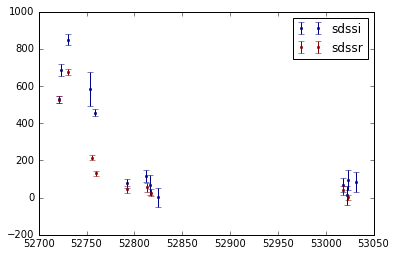

03D3aw 215.22305 52.605625
[ 0  6 18 26 28]


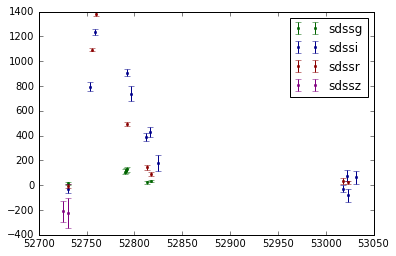

03D3ay 214.493579167 52.4826138889
[ 0  6 19 27 28]


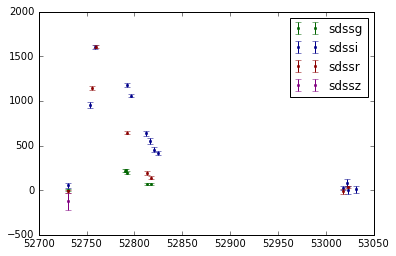

03D3ba 214.139295833 52.3421888889
[ 0  8 19 26 28]


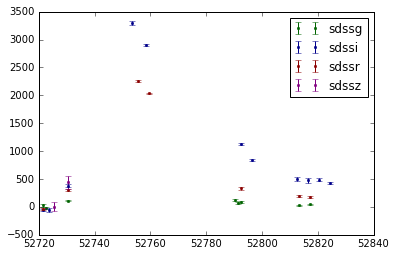

03D3bb 214.07885 52.2482444444
[ 0  6 15 21 23]


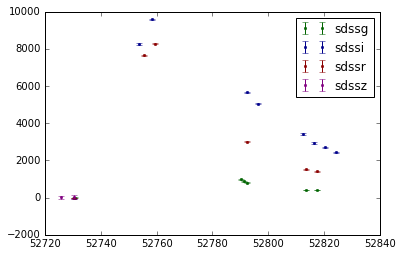

03D3bl 214.9825 53.0974
[ 0  6 16 22]


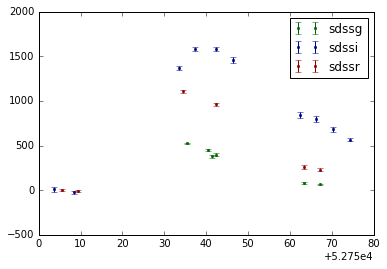

03D3cc 214.938354167 52.5403777778
[ 0  5 16 23]


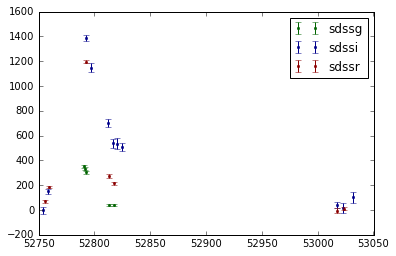

03D3cd 214.6663625 52.6120777778
[ 0  6 19 27 28]


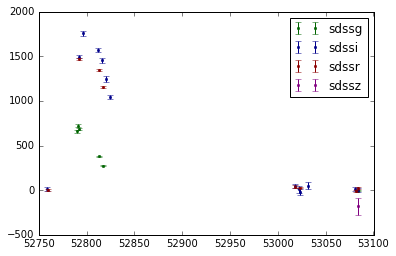

04D3bf 214.437779167 52.4677916667
[ 0 13 35 57 66]


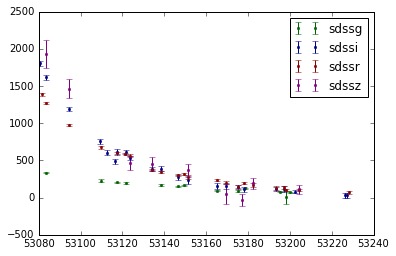

04D3co 214.458245833 52.9636111111
[ 0 14 43 70 80]


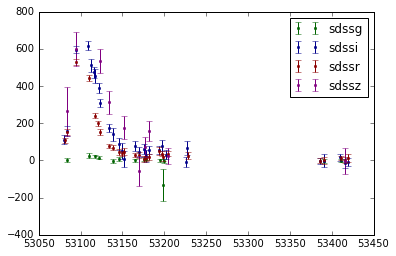

04D3cp 215.099658333 52.8209333333
[  0  21  54  87 102]


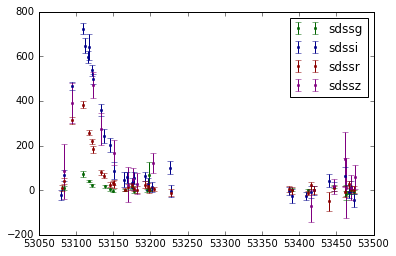

04D3cy 214.551808333 52.6583305556
[ 0 15 42 69 79]


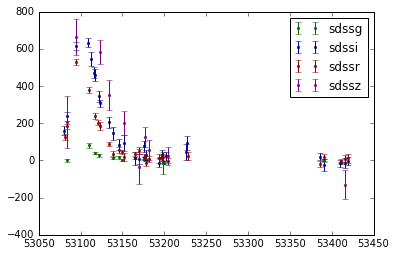

04D3dd 214.4516875 52.4706777778
[  0  25  63 102 121]


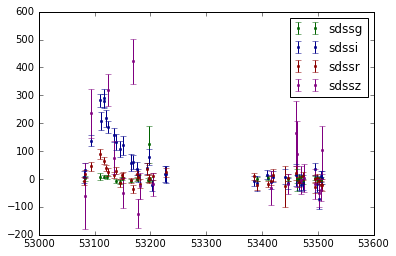

04D3df 214.541670833 52.2776861111
[ 0 15 39 64 73]


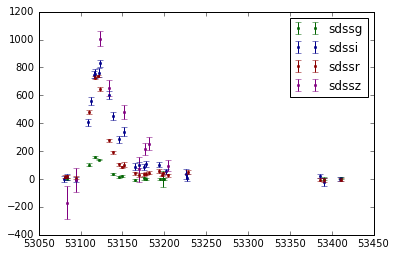

04D3do 214.442008333 52.2675527778
[ 0 15 41 68 78]


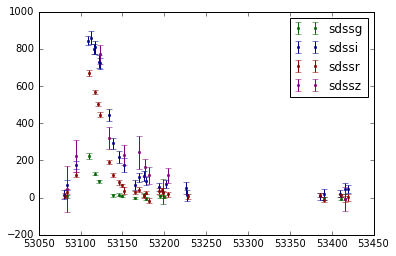

04D3ez 214.782641667 53.0719472222
[ 0 13 37 59 68]


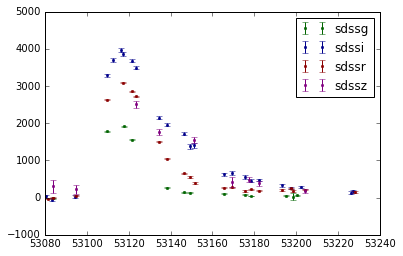

04D3fk 214.6091 52.5284666667
[ 0 13 34 56 64]


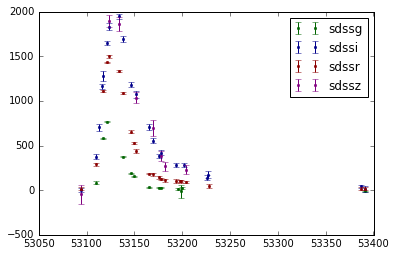

04D3fq 214.2411875 52.3794722222
[ 0 18 49 79 92]


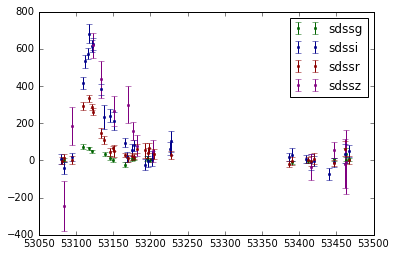

04D3gt 215.635795833 52.6469222222
[ 0 14 39 64 73]


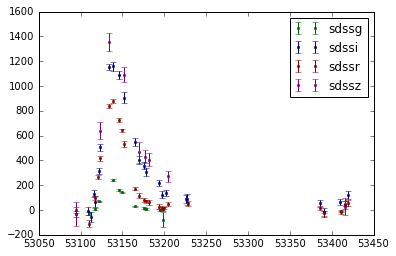

04D3gx 215.05695 52.2827777778
[  0  25  62 100 118]


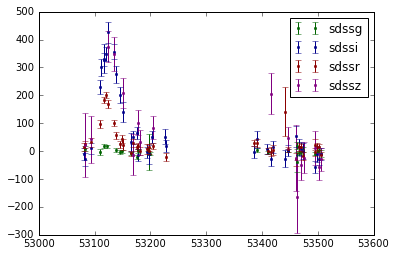

04D3hn 215.528729167 52.2285861111
[ 0 14 42 67 76]


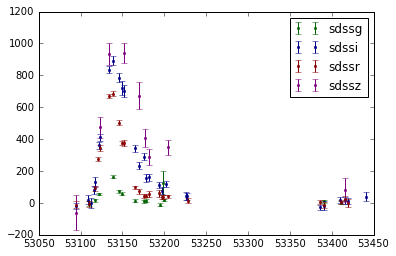

04D3kr 214.149725 52.478875
[ 0 11 31 51 58]


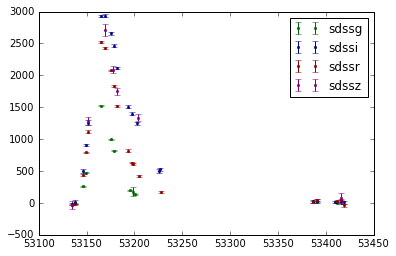

04D3ks 215.639779167 52.1851833333
[  0  23  60  95 112]


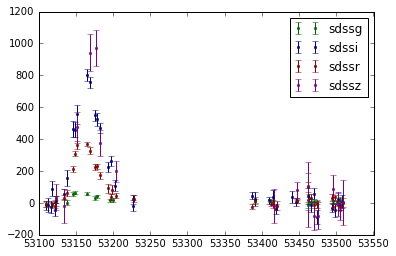

04D3lp 214.962120833 52.5031944444
[  0  29  69 111 132]


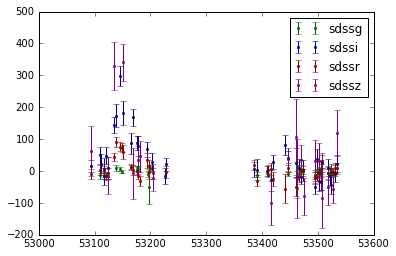

04D3lu 215.283208333 52.9747916667
[  0  28  67 106 125]


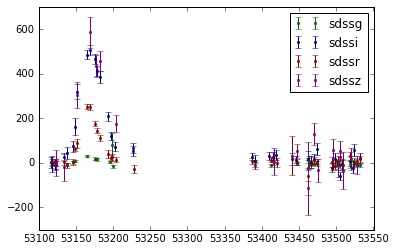

04D3mk 214.85735 53.1636944444
[  0  26  62  99 118]


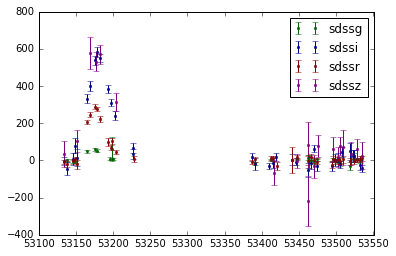

04D3ml 214.162783333 53.0932527778
[  0  30  74 116 140]


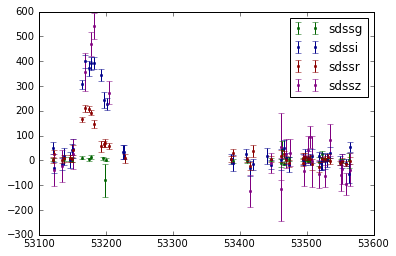

04D3nc 214.0759125 52.2738027778
[  0  26  62  99 119]


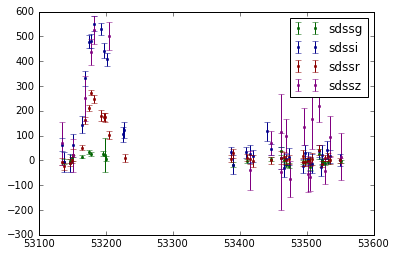

04D3nh 215.611283333 52.3334472222
[ 0 11 32 52 59]


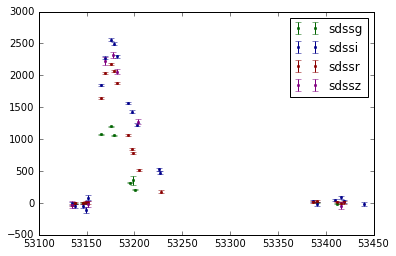

04D3nq 215.079729167 53.1544138889
[ 0  8 23 39 44]


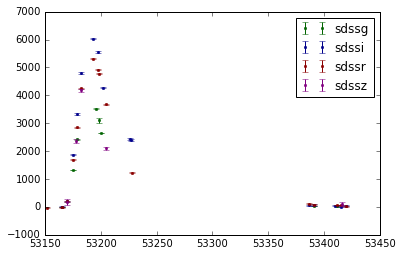

04D3nr 215.66045 52.6486861111
[  0  30  69 111 134]


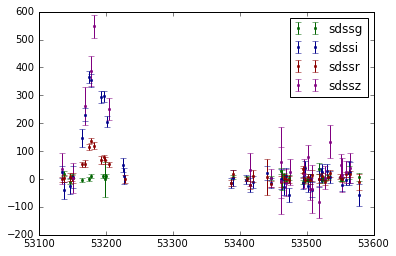

04D3ny 214.734666667 52.1874638889
[  0  27  58  95 115]


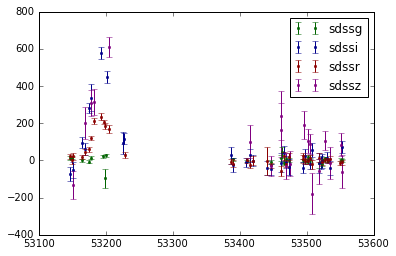

04D3oe 214.9141 52.5538472222
[  0  25  60  95 113]


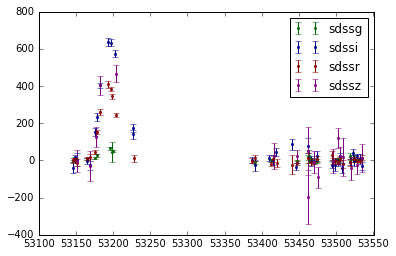

05D3ax 214.8232625 52.6875194444
[ 0 23 48 77 94]


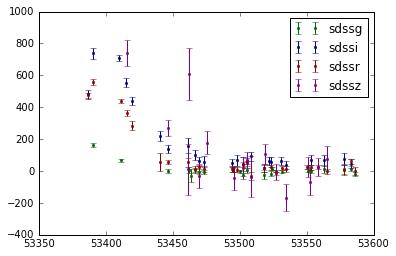

05D3cf 214.2224625 52.3450527778
[ 0 22 50 78 95]


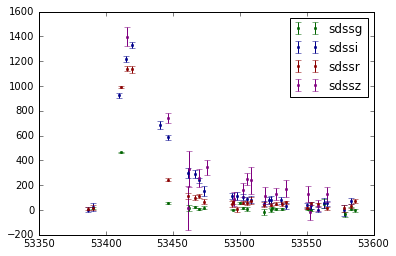

05D3ci 215.450441667 52.4452805556
[ 0 23 49 77 94]


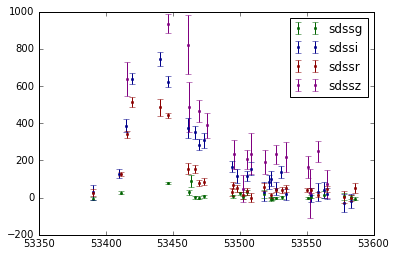

05D3cq 214.692345833 53.1321388889
[  0  27  61  95 113]


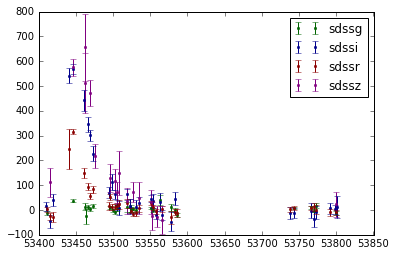

05D3cx 215.277258333 52.7505083333
[  0  27  58  92 110]


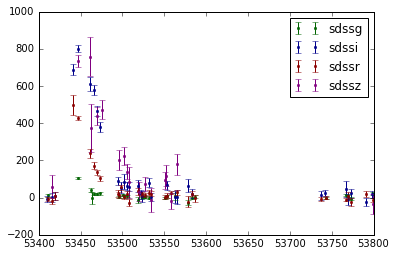

05D3dd 215.626866667 52.6067944444
[ 0 23 49 78 95]


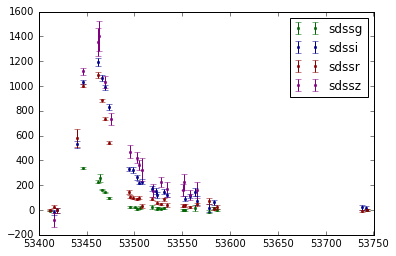

05D3dh 215.2100125 52.6627194444
[  0  28  64  99 117]


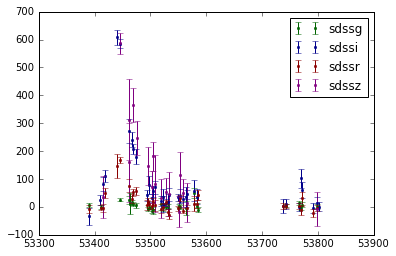

05D3gp 215.676316667 52.7246888889
[ 0 23 48 78 94]


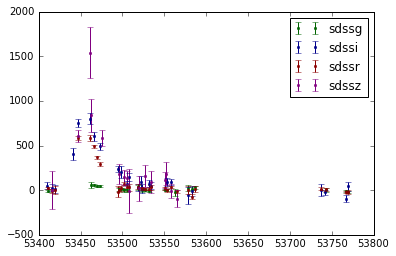

05D3gv 215.246895833 53.1788777778
[  0  26  57  90 108]


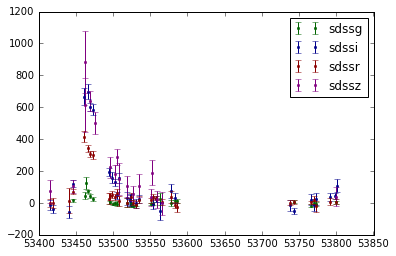

05D3gy 214.116204167 52.2291083333
[  0  25  58  90 108]


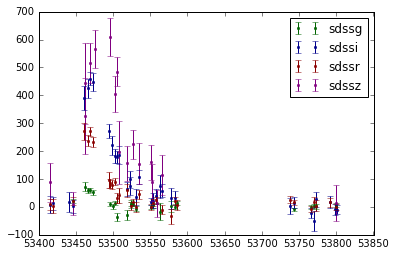

05D3ha 215.210133333 52.8340361111
[  0  26  54  85 102]


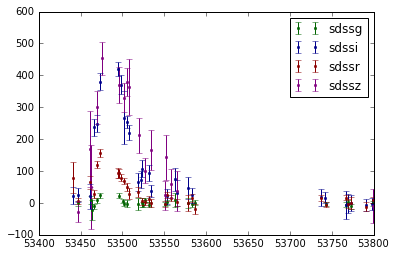

05D3hh 214.792304167 52.9593333333
[  0  26  56  87 104]


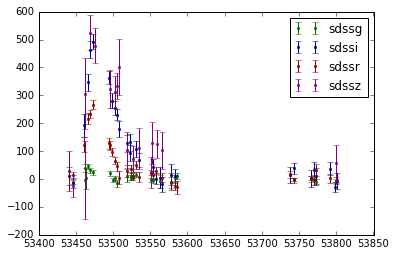

05D3hq 214.429554167 52.1895138889
[ 0 20 41 65 80]


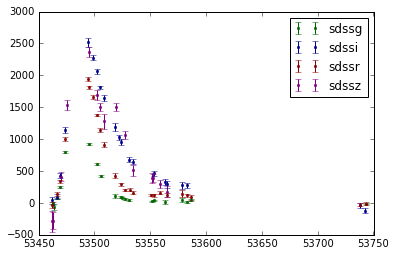

05D3hs 215.306504167 52.9038083333
[ 0 26 52 82 99]


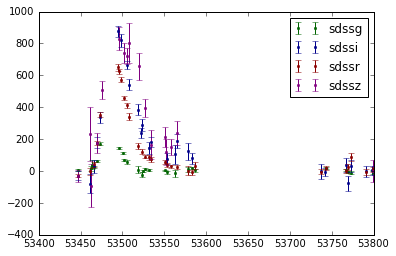

05D3ht 214.477920833 53.1675833333
[  0  31  67 102 122]


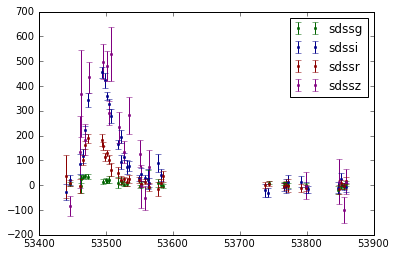

05D3jb 215.541654167 52.8781305556
[  0  29  57  89 106]


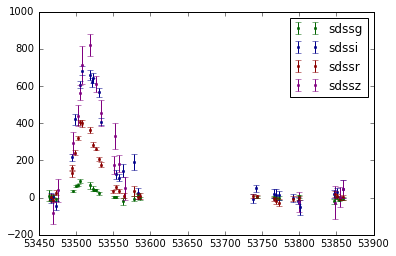

05D3jh 214.355766667 52.6187638889
[  0  26  54  84 101]


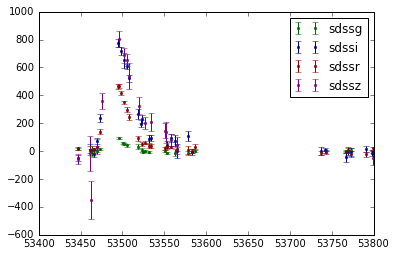

05D3jk 214.197729167 52.5924888889
[  0  28  59  90 107]


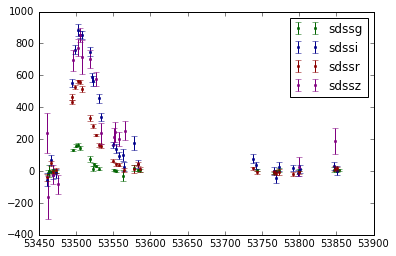

05D3jq 215.4393375 53.0299194444
[ 0 25 52 81 97]


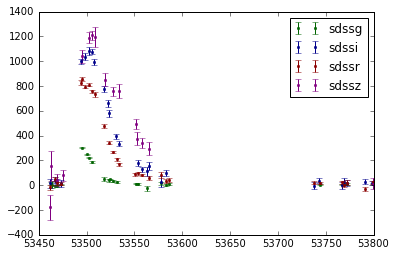

05D3jr 214.869783333 52.8648472222
[ 0 22 43 68 83]


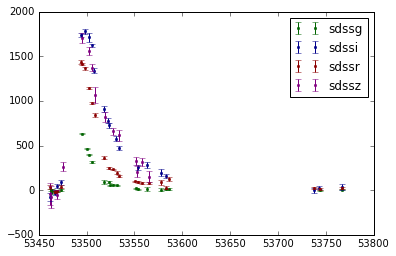

05D3km 215.659479167 53.067
[  0  35  74 113 134]


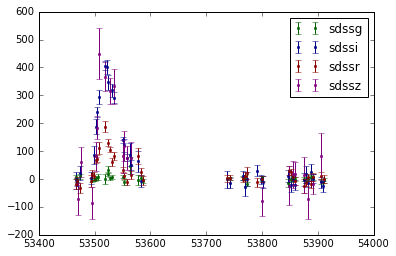

05D3kp 215.012266667 52.2708277778
[  0  30  63  97 116]


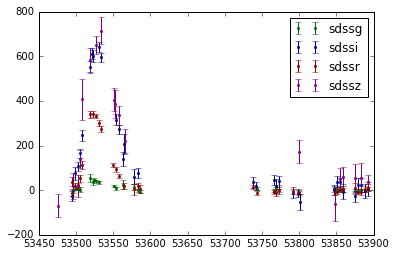

05D3kt 214.973833333 52.7429861111
[ 0 25 52 81 96]


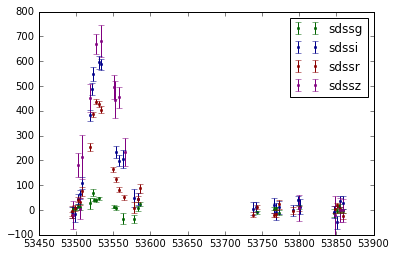

05D3kx 215.4584125 53.1371194444
[ 0 18 36 57 67]


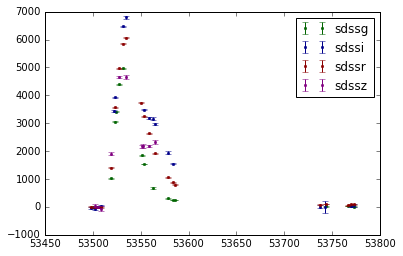

05D3la 215.355908333 52.3579722222
[  0  33  70 108 129]


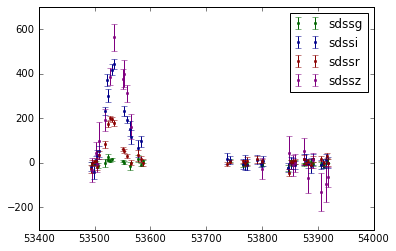

05D3lb 214.382325 53.1679277778
[ 0 24 53 81 95]


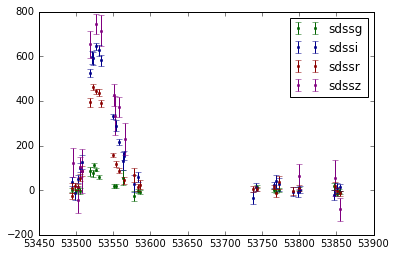

05D3lc 215.5955 52.4788666667
[ 0 20 44 69 81]


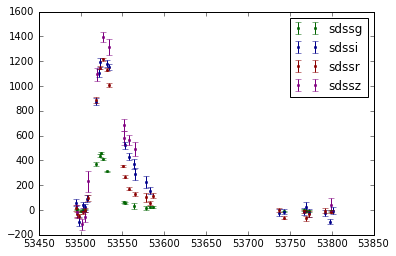

05D3lr 215.550591667 53.184275
[ 0 24 52 79 94]


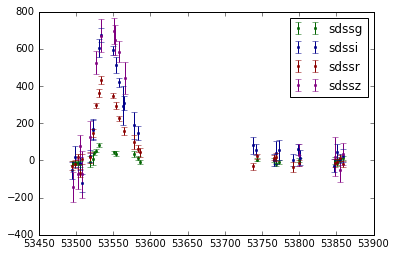

05D3mh 214.749304167 52.6675583333
[ 0 26 50 78 92]


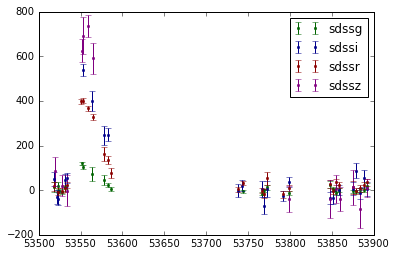

05D3mn 214.688508333 52.3231444444
[  0  28  61  92 108]


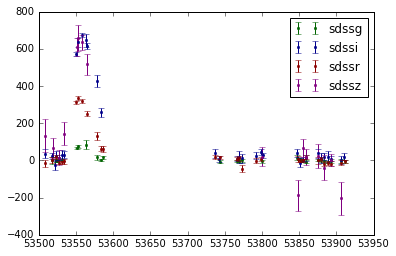

05D3mq 214.751783333 52.3851194444
[ 0 11 22 36 41]


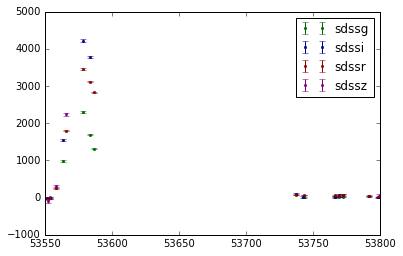

05D3mx 215.537920833 52.2191805556
[ 0 18 38 59 69]


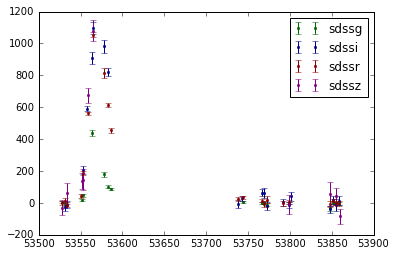

05D3ne 215.262445833 52.4954388889
[ 0 11 25 39 44]


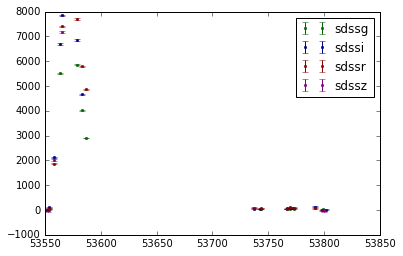

06D3bz 214.291841667 53.024825
[ 0 21 43 66 76]


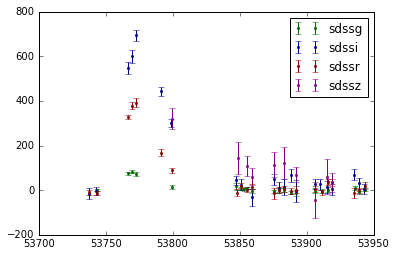

06D3cb 215.181558333 52.1910638889
[ 0 21 44 67 77]


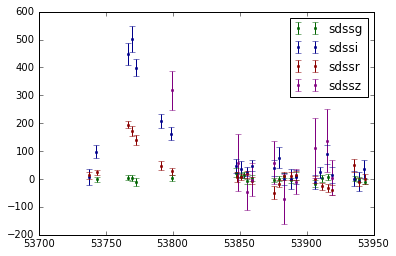

06D3cc 214.381666667 52.9124722222
[ 0 21 44 67 77]


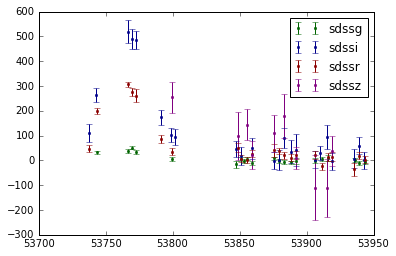

06D3cn 214.8577 52.6409833333
[ 0 18 36 55 65]


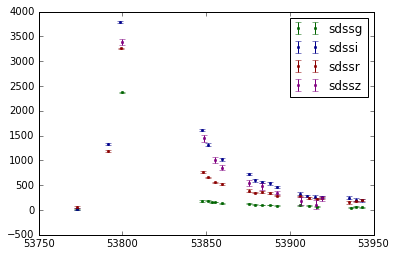

06D3df 215.571704167 52.9576805556
[ 0 16 32 48 57]


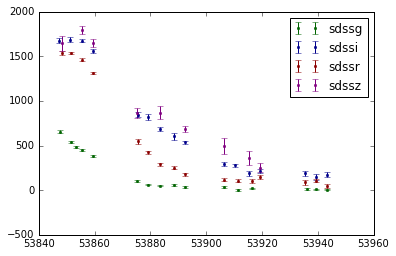

06D3dl 215.552404167 52.6408472222
[ 0 16 33 49 58]


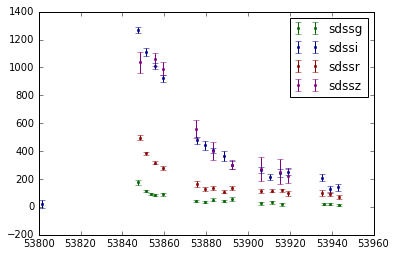

06D3do 214.247466667 52.8825444444
[ 0 16 31 47 56]


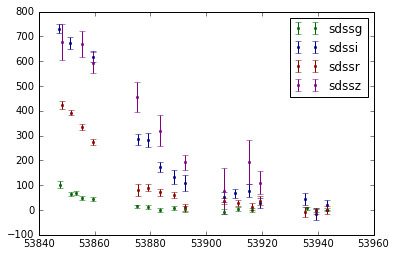

06D3dt 214.340266667 52.4528166667
[ 0 16 32 48 57]


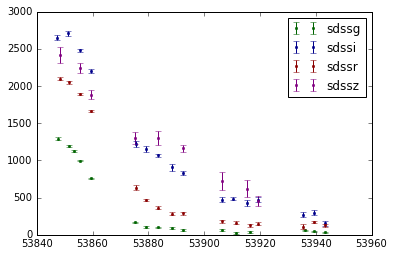

06D3ed 214.699175 52.7565583333
[ 0 16 31 47 56]


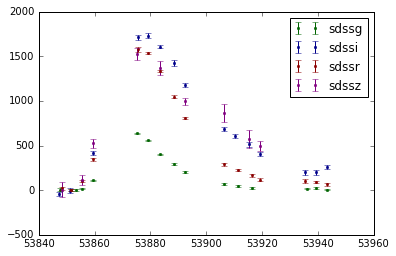

06D3el 214.254529167 52.2324
[ 0 15 30 46 55]


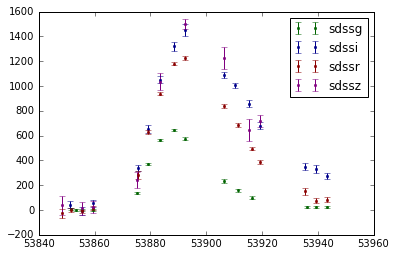

06D3em 214.847579167 53.0230138889
[ 0 16 32 48 57]


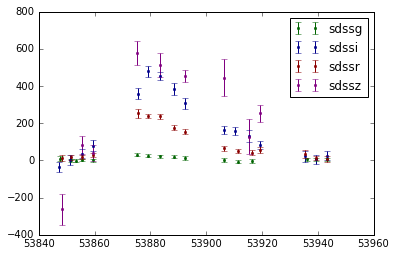

06D3en 215.305566667 52.4560777778
[ 0 16 32 48 57]


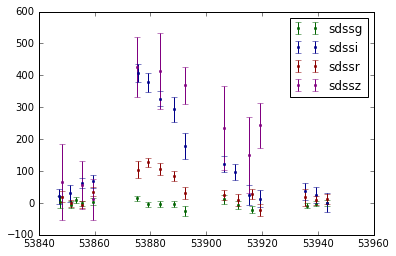

06D3et 215.519875 52.3383666667
[ 0 15 30 46 55]


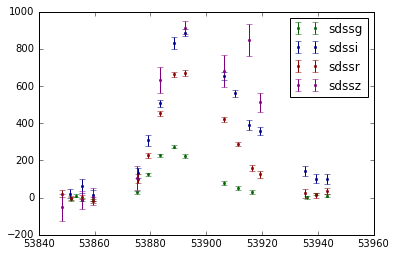

06D3fp 215.077520833 52.8971638889
[ 0 11 23 35 41]


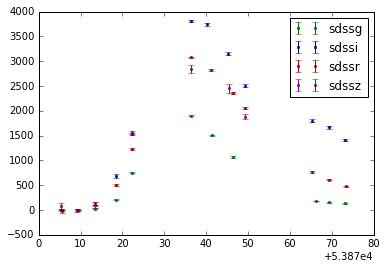

06D3gh 214.6309125 52.4429083333
[ 0 11 23 35 41]


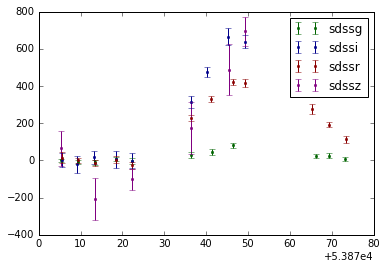

06D3gn 214.435958333 52.3611805556
[ 0  8 17 26 30]


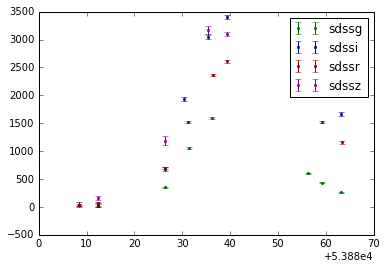

06D3gx 214.263475 52.9362527778
[ 0  9 18 28 33]


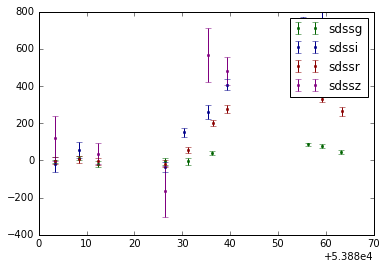

total of sn:83


In [29]:
snls_array = []
for sn in elems:

        c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))

        m = re.findall('^'+str(sn[0])+'\\|(r|g|z|i)\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

        snls_lc = DSTools.build_light_curve_from_snls_file(m, c)

        if len(m)>0:
            #print sn[0], c.ra.deg, c.dec.deg

            #plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
            show_multi_filter_light_curve(snls_lc, snls_colors)
            plt.show()
            snls_array.append(snls_lc)

print("total of sn:" + str(len(snls_array)))


In [93]:
print len(snls_array)
print len(matched)
print matched[0]

83
83
04D3oe


In [2]:
curves = [554000,   20003,  362011,   69015,  393015,  367516,  161020,  275024,
  254525,  488529,  353043,  323044,  275045,  427057,  334559,  237060,
  152584,   96086,  378589,  528591,  530591,  499597,  364100,  205609,
  238624,  171628,  215129,  548130,  508136,  275139,  282642,  489662,
  328663,  300671,  603671,  252672,  162173,  563183,  199187,  320194,
  589709,  181218,  354226,  321730,  375231,  371244,  588754,  169755,
  100761,  102262,  409763,  452764,  491269,  585770,  320271,  391771,
  307774,  452780,  103782,  450288,  159790,  277301,  270321,   84323,
  305823,  560323,  152326,  447832,  146839,  145345,  238345,   69346,
   86347,  231850,   72360,  536862,  201863,  220368,  437374,  157377,
  295384,  606385,  168391,  454891,  150894,  152407,    8910,  527422,
  330434,  532940,  607447,  563958,  550462,  527464,  206968,  275472,
  387472,  541474,  352982,  354483,  538486,  127487,  395488,   51991,
   51997,]
lcs = []
for c in curves:

    lienObj = glob.glob("/datadec/cppm/jpreyes/mpi_tests/multicolour_set/"+str(c)+".dat")


    for oj in lienObj:
        table = ascii.read(oj)
        lcs.append(table)
        break

#show_multi_filter_light_curve(lcs[0], snls_colors)

In [84]:
elems[0]

('03D3af', '14 21 14.877 +52 32 15.290')

============New LC================
0


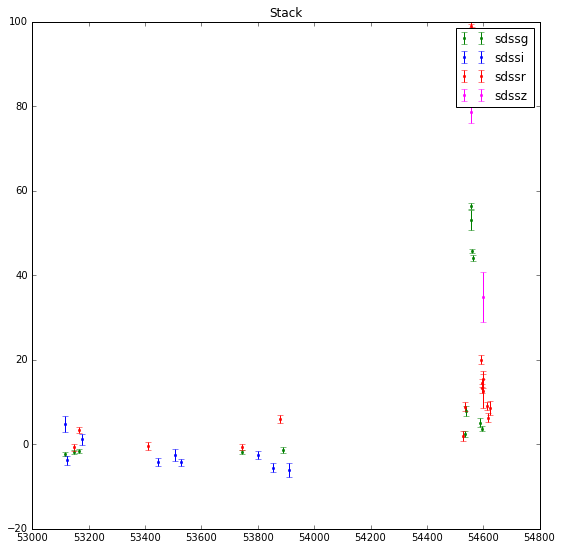

============New LC================
match
04D3oe
{'sdssi': -0.30391202309536386, 'sdssr': 0.043616579671347862, 'sdssz': nan, 'sdssg': 0.50864454694268535}
1


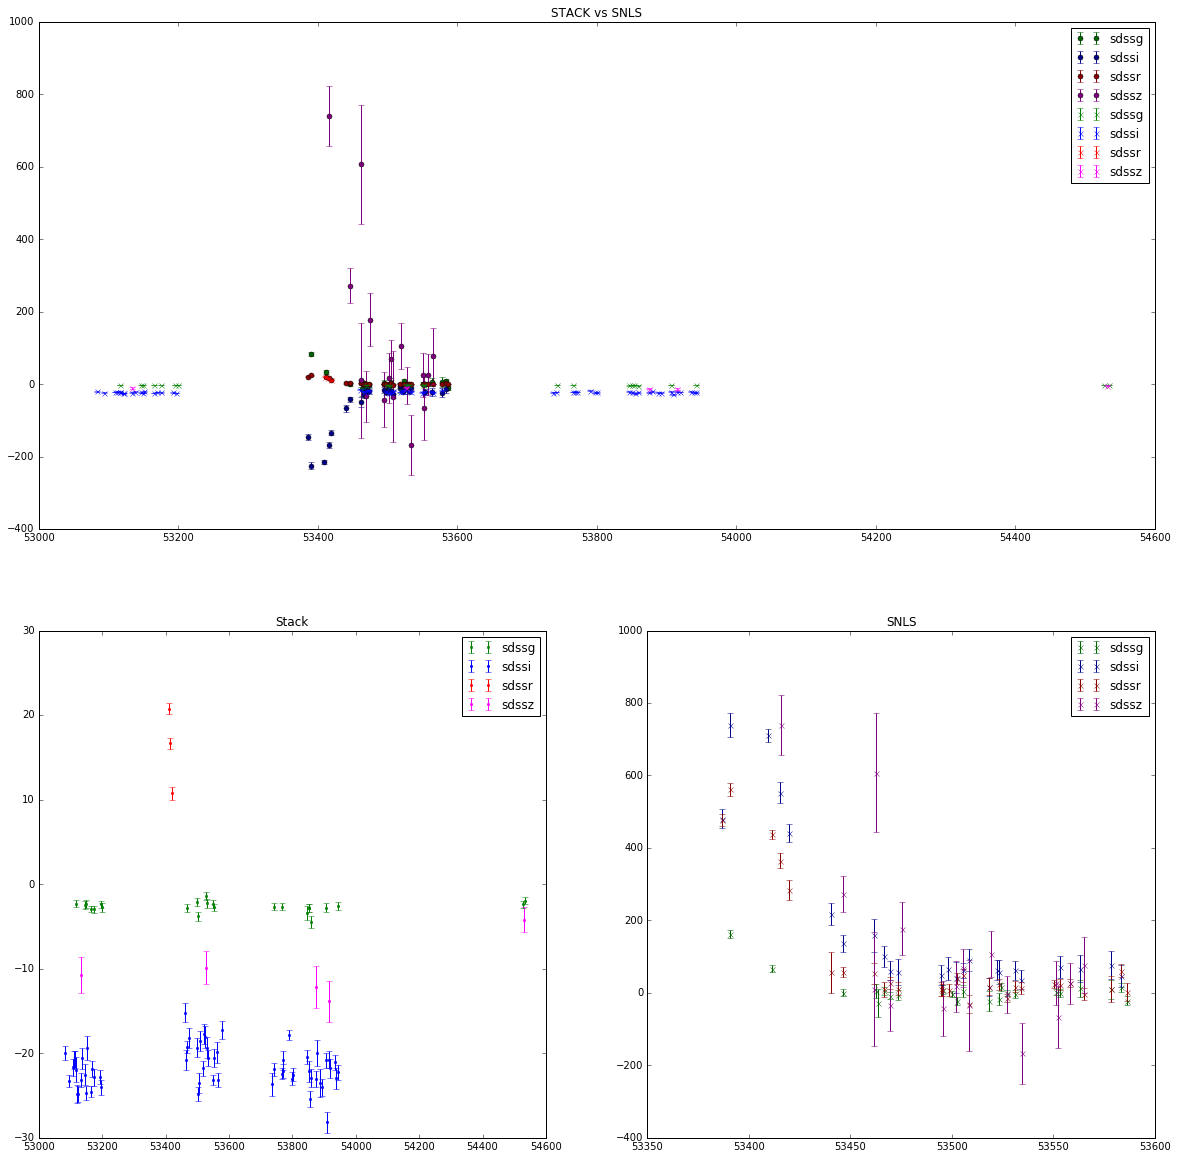

============New LC================
match
05D3lb
{'sdssi': 0.043192278597243117, 'sdssr': 0.045210217145528517, 'sdssz': 0.031604133980815977, 'sdssg': 0.061205338699116908}
2


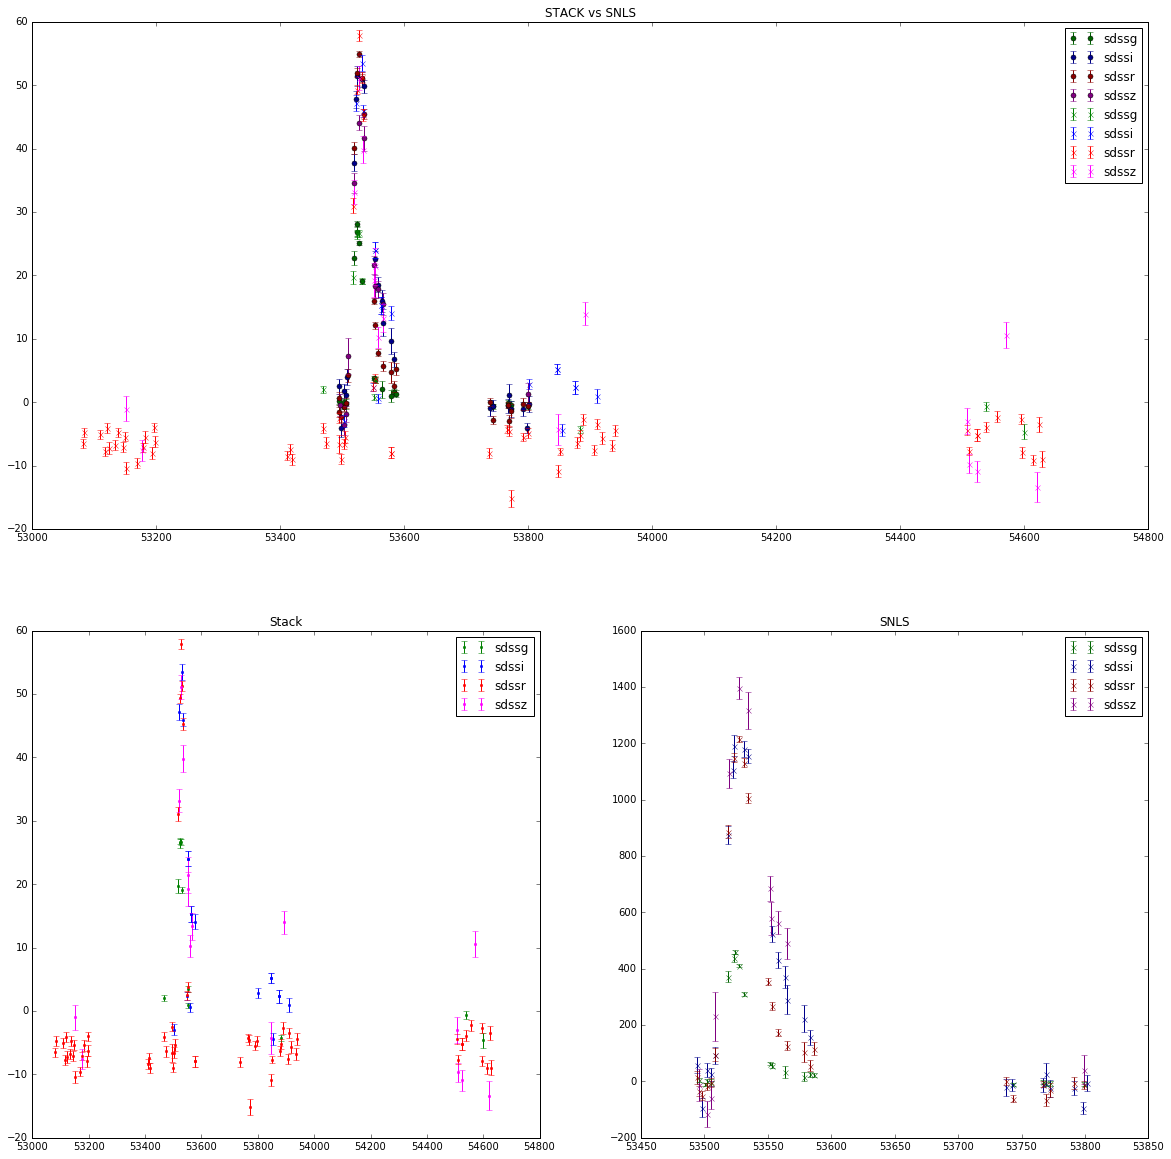

============New LC================
2


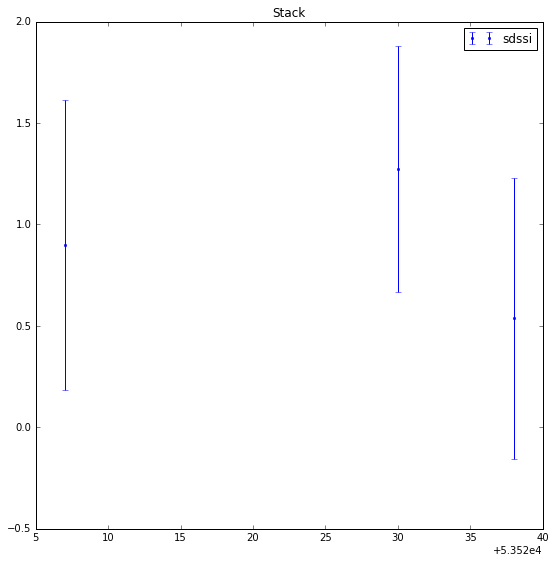

============New LC================
2


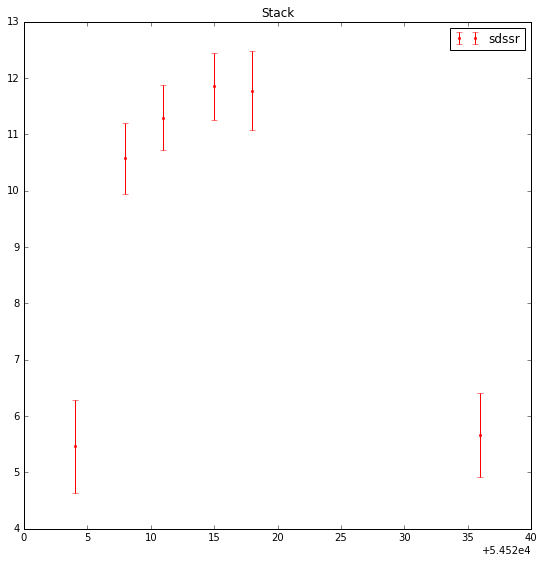

============New LC================
match
05D3cx
{'sdssi': 0.03891091629097513, 'sdssr': 0.048850623571041071, 'sdssz': -0.12500361908711913, 'sdssg': -0.49478377394036294}
3


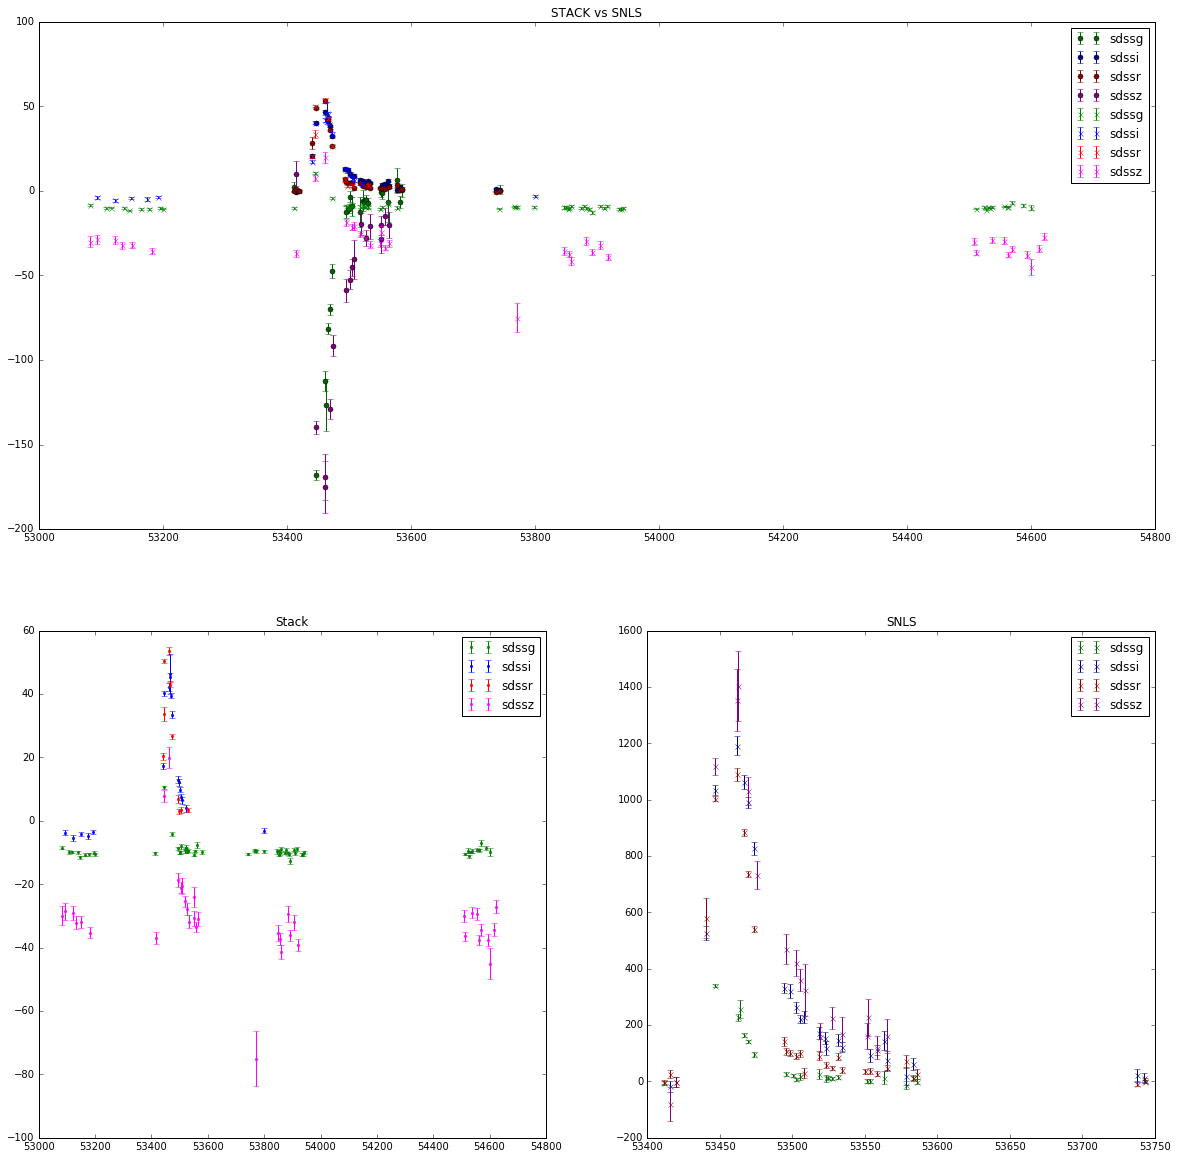

============New LC================
match
06D3gh
{'sdssi': 0.043682585472031042, 'sdssr': 0.050464986086164398, 'sdssz': 0.039354719885027818, 'sdssg': 0.060148224699524931}
4


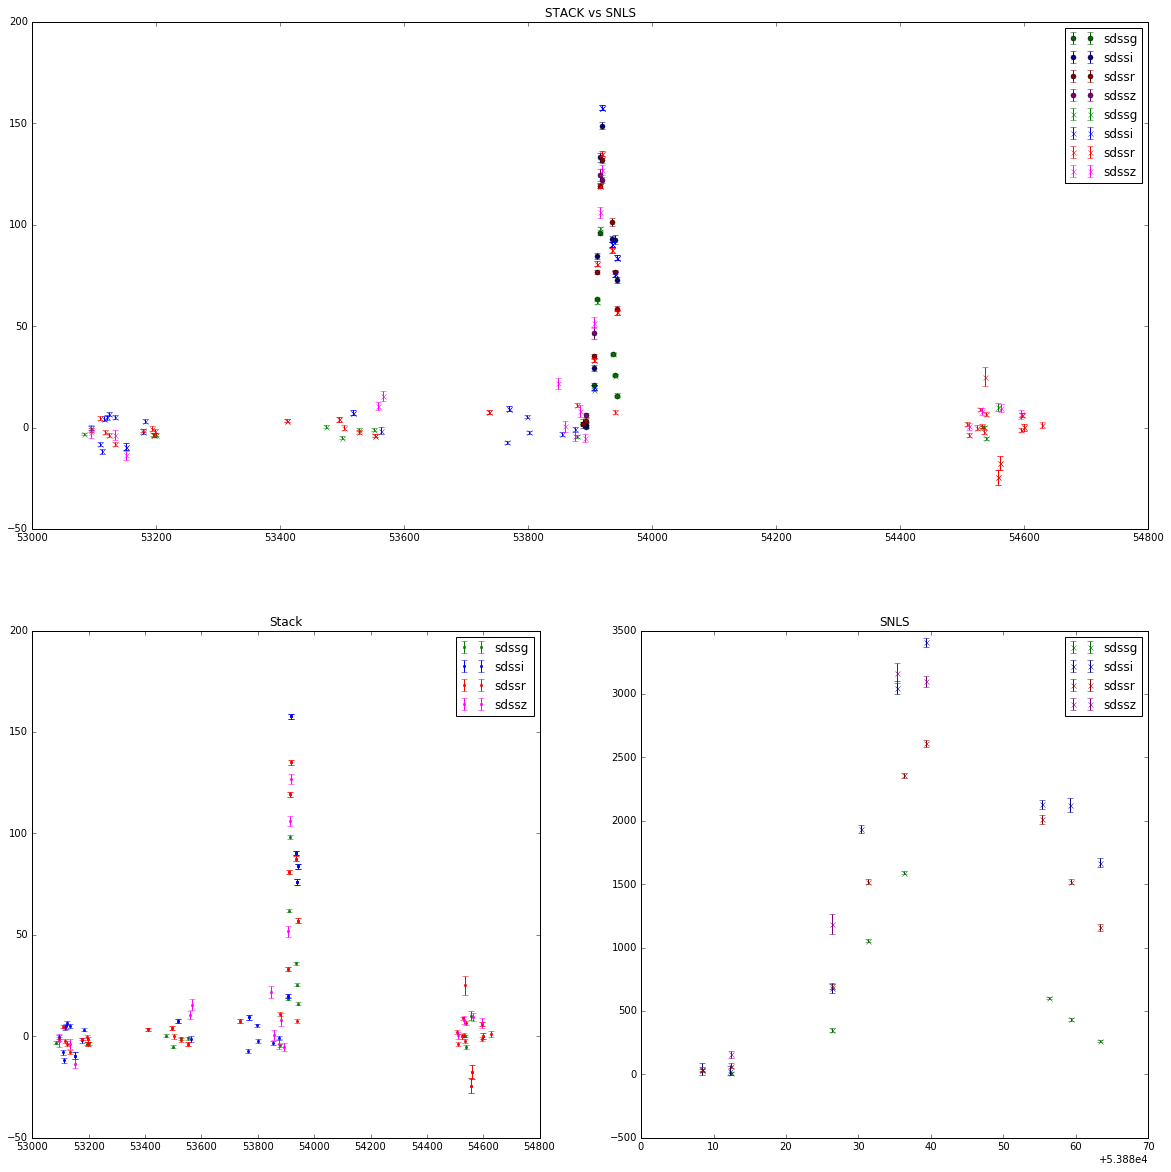

============New LC================
match
05D3kt
{'sdssi': nan, 'sdssr': 0.034847729555126279, 'sdssz': 0.037101881470931262, 'sdssg': 0.059988336507135691}
5


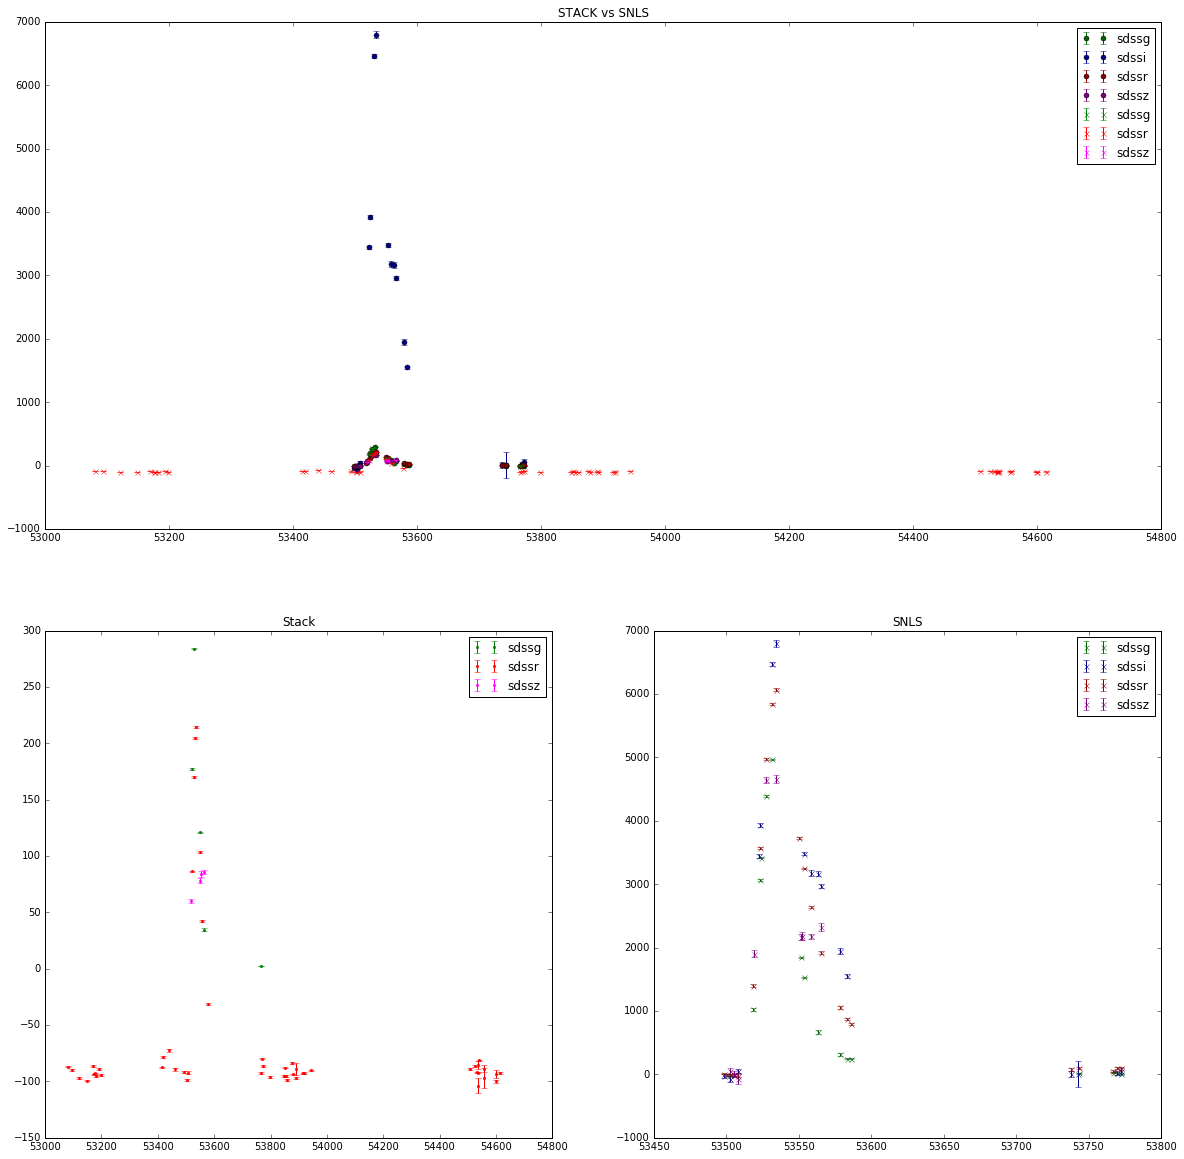

============New LC================
match
06D3ed
{'sdssi': 0.044412335171035086, 'sdssr': 0.054553951382208817, 'sdssz': 0.038095803101187486, 'sdssg': 0.063140730742309331}
6


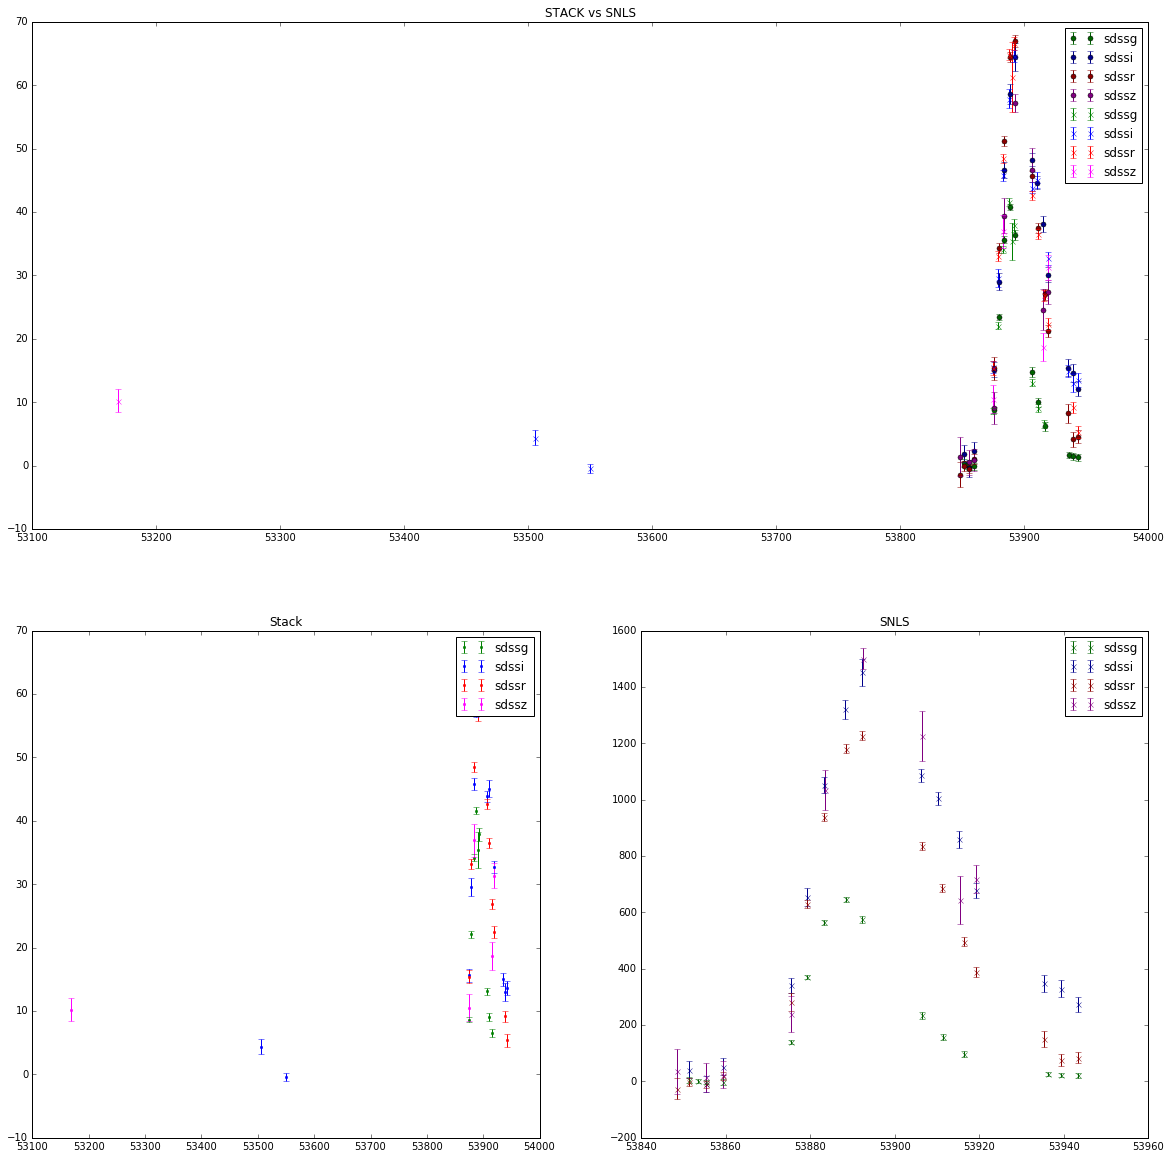

============New LC================
match
05D3ax
{'sdssi': -0.22541515487341357, 'sdssr': 0.04724327648135479, 'sdssz': -0.10807381169692591, 'sdssg': -0.27229298983862404}
7


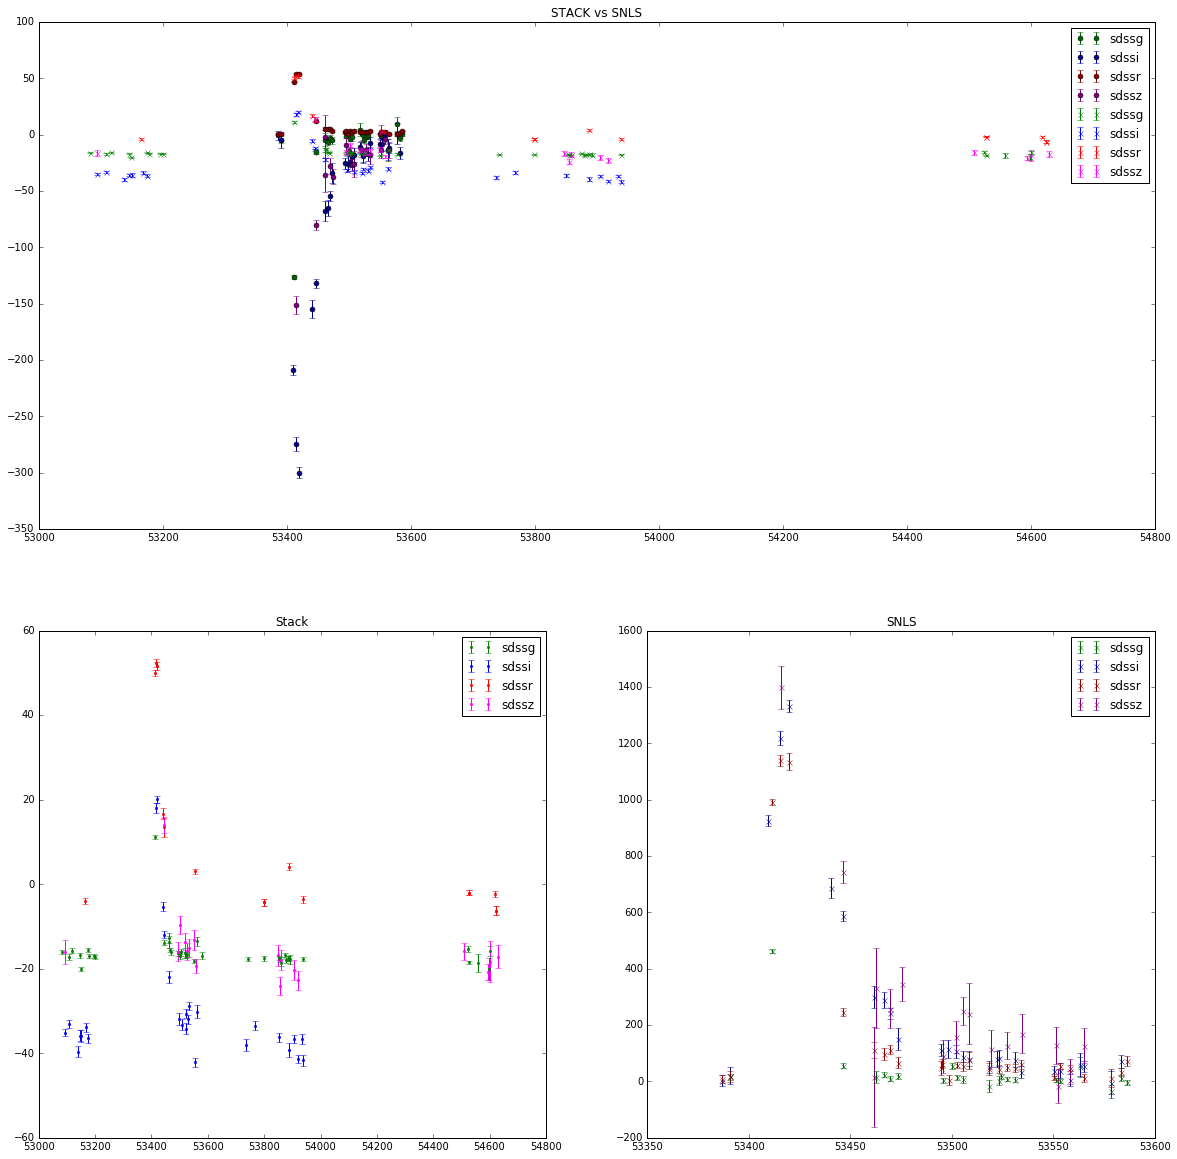

============New LC================
match
04D3nq
{'sdssi': 0.036905663417598294, 'sdssr': 0.052746662341273648, 'sdssz': nan, 'sdssg': nan}
8


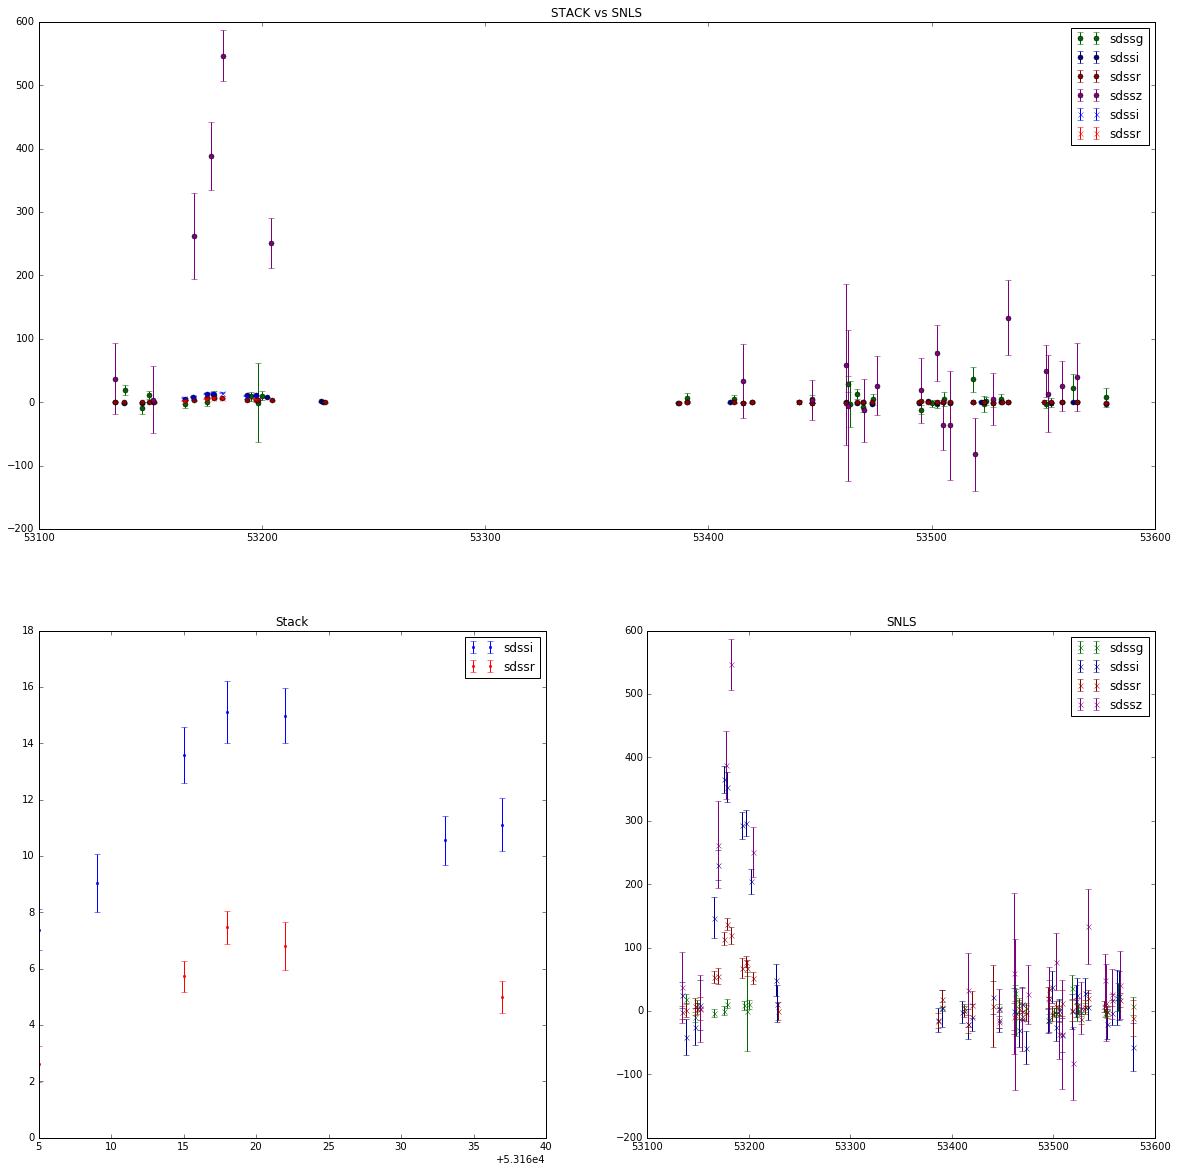

============New LC================
match
05D3mx
{'sdssi': nan, 'sdssr': -1.4968466907641005, 'sdssz': nan, 'sdssg': 0.062468137937886109}
9


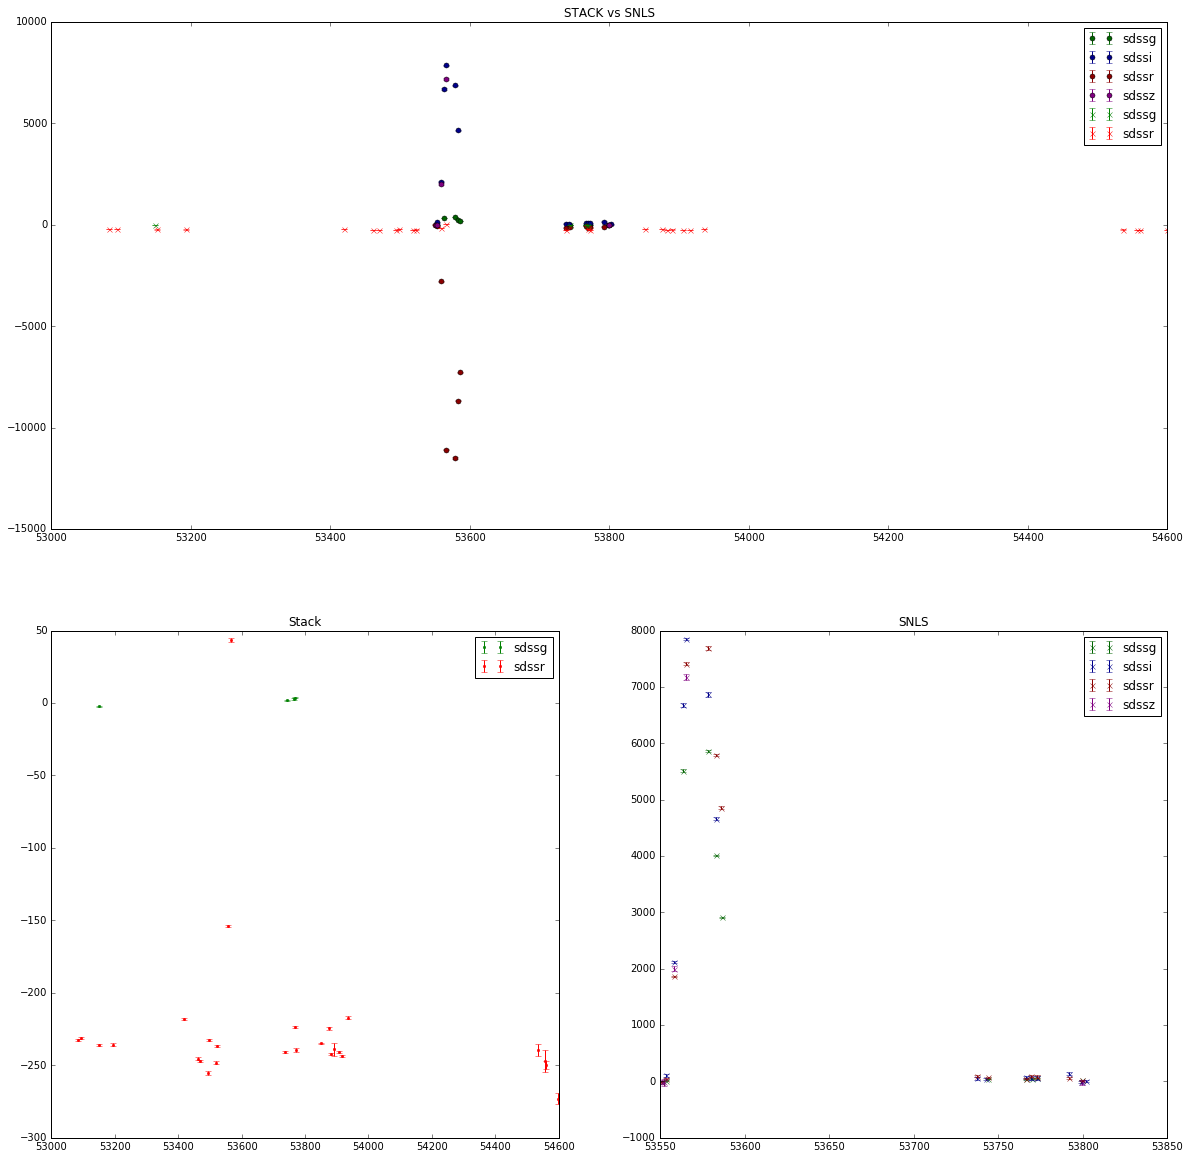

============New LC================
9


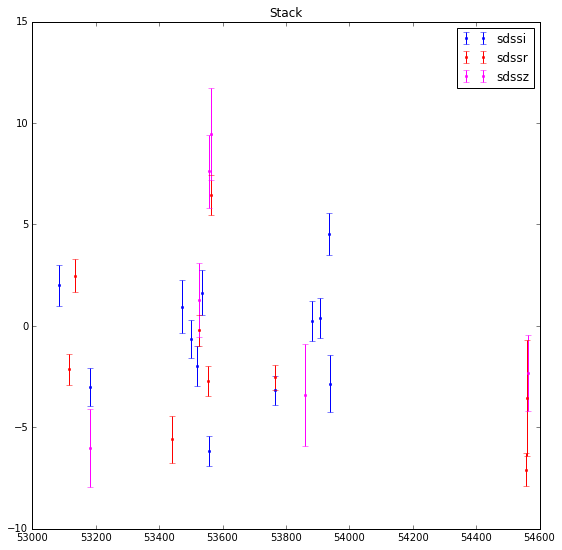

============New LC================
match
05D3cf
{'sdssi': 0.021033167431363645, 'sdssr': 0.042914765887058143, 'sdssz': -0.06858094541972351, 'sdssg': 0.51878821118712337}
10


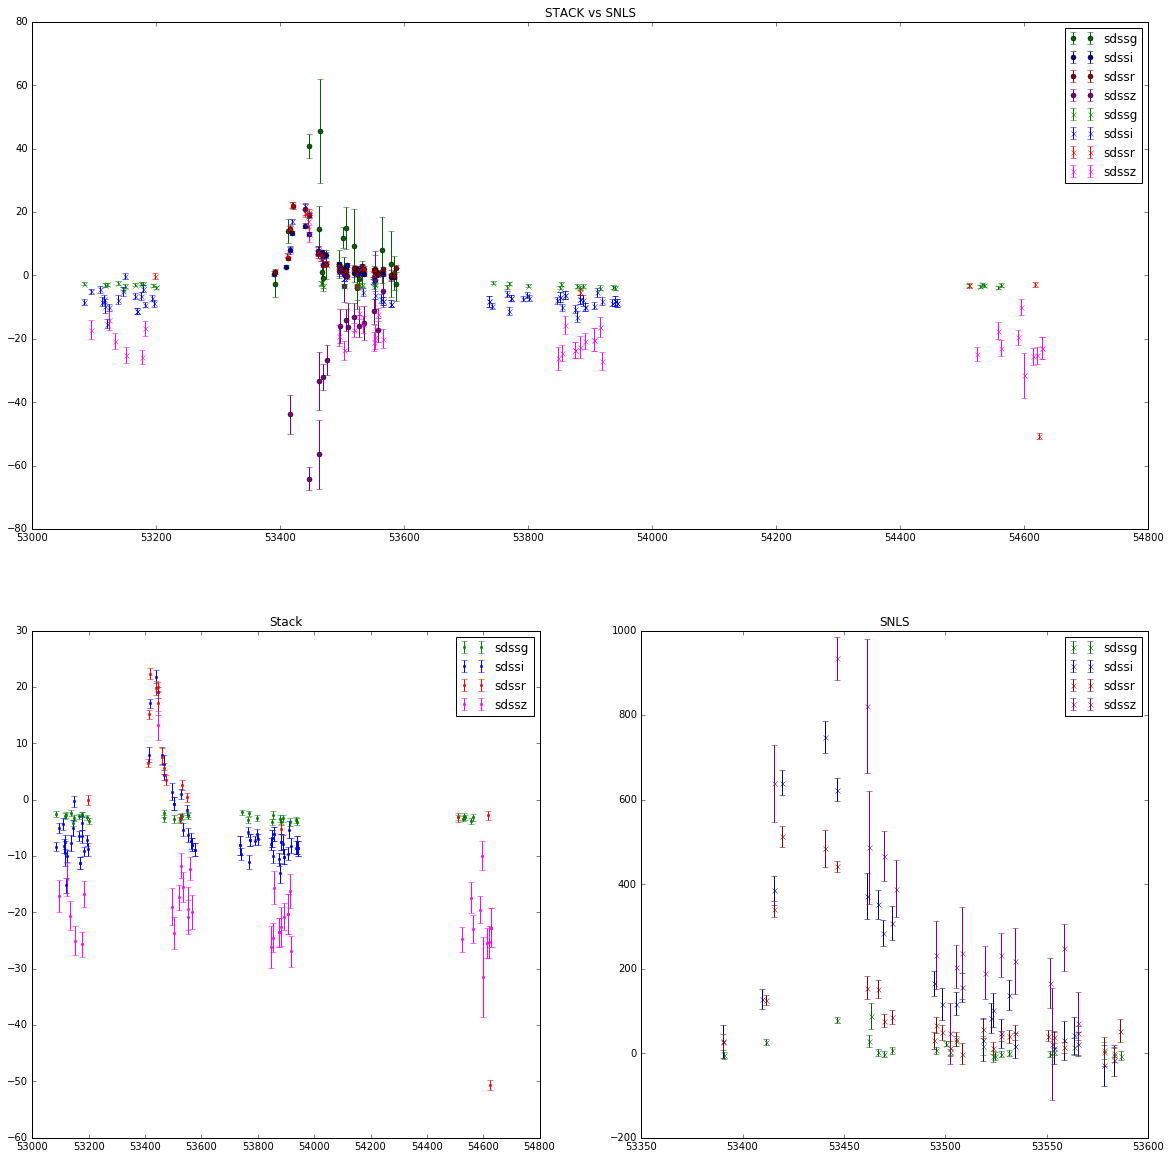

============New LC================
10


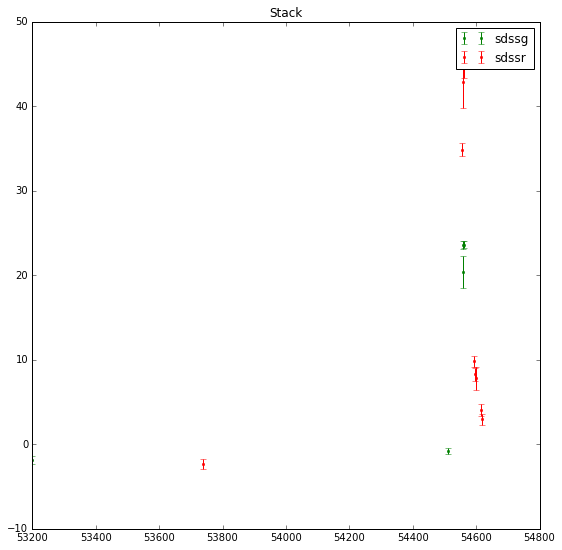

============New LC================
match
06D3gn
{'sdssi': 0.039965147909309724, 'sdssr': 0.048422739872804418, 'sdssz': nan, 'sdssg': 0.057270423770710524}
11


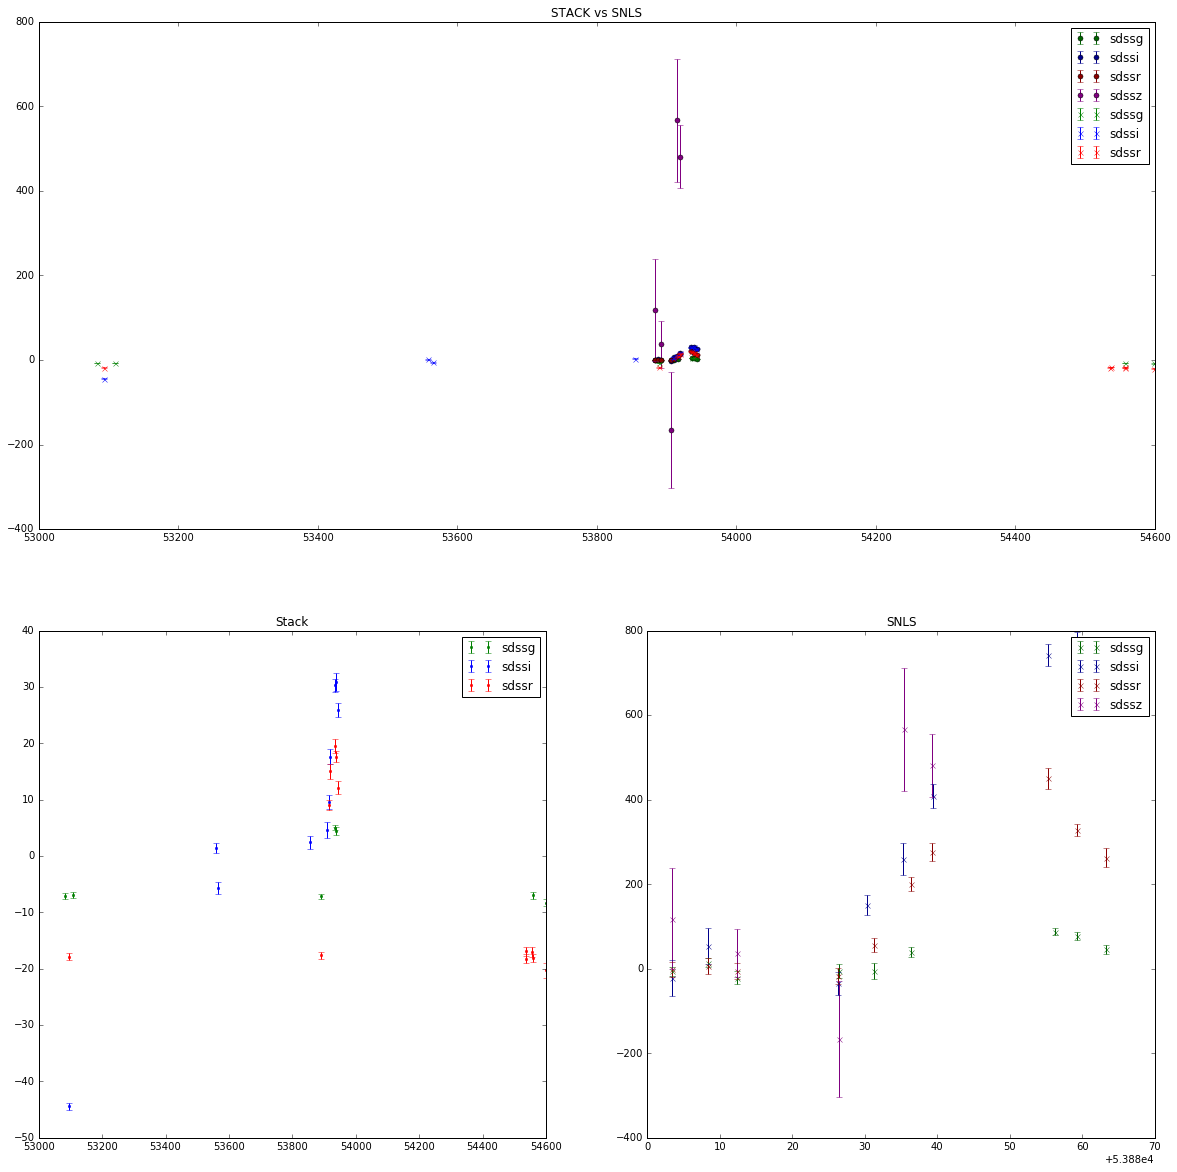

============New LC================
match
06D3cn
{'sdssi': nan, 'sdssr': nan, 'sdssz': nan, 'sdssg': nan}
12


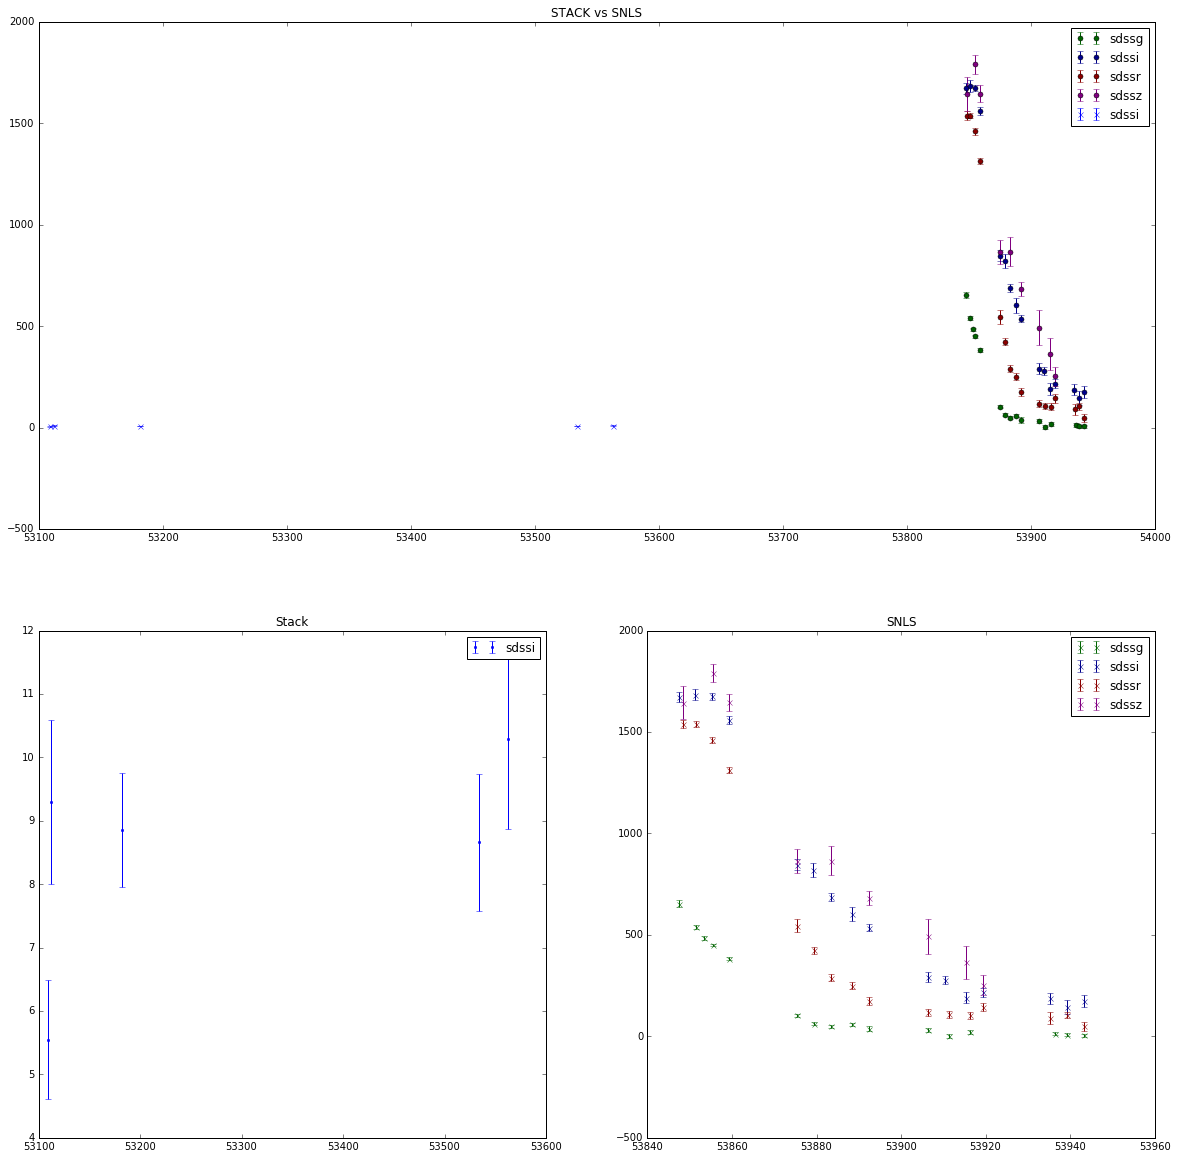

============New LC================
match
05D3ci
{'sdssi': 0.043859179208153153, 'sdssr': 0.051256771868622264, 'sdssz': -0.14631161521889721, 'sdssg': nan}
13


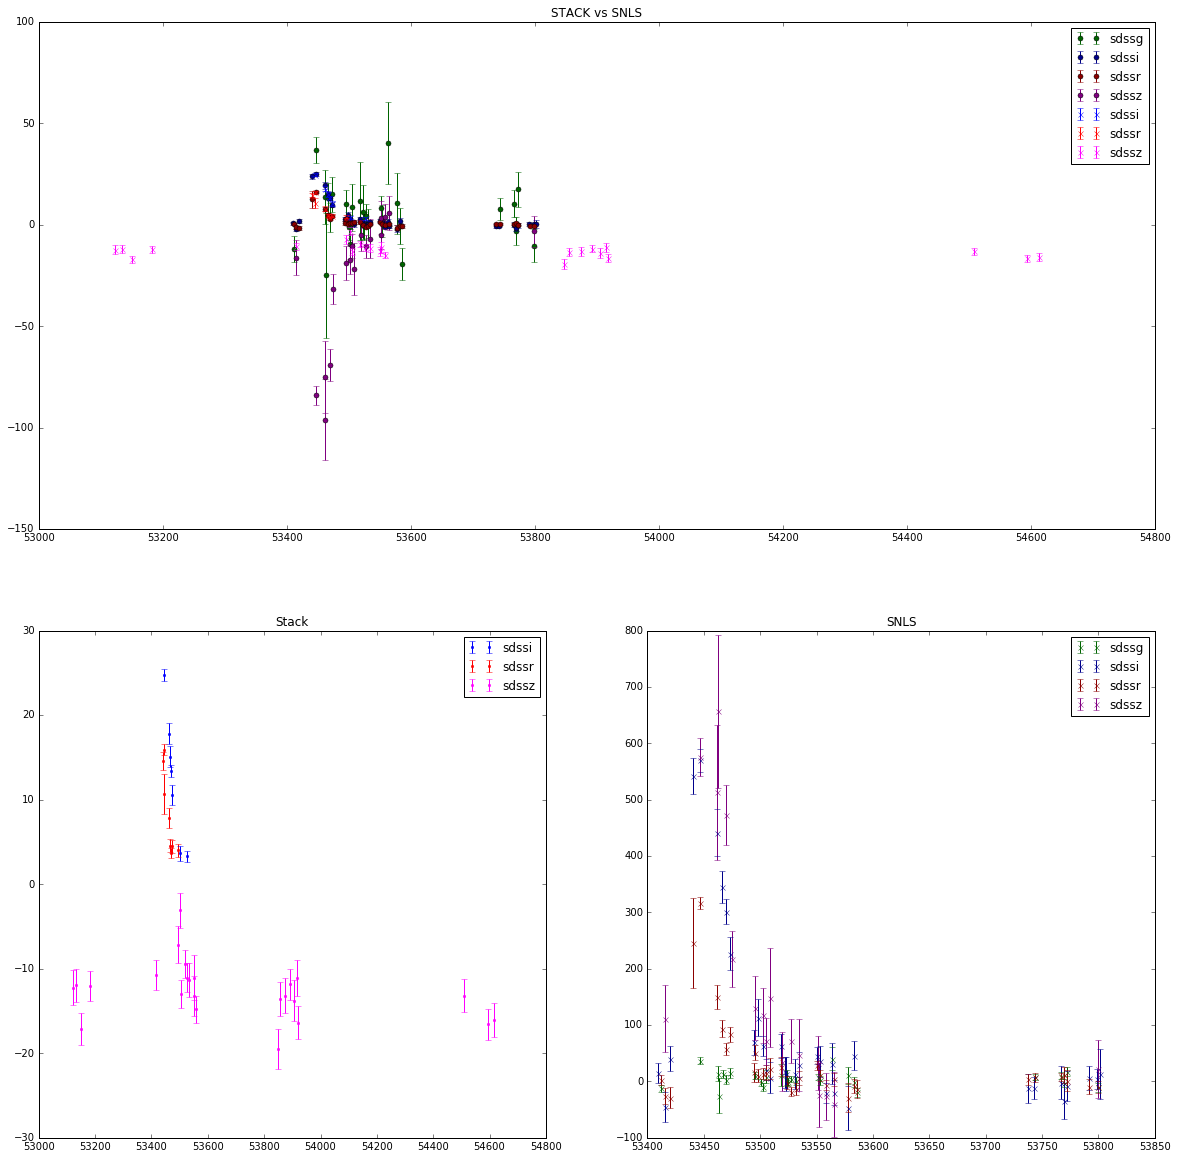

============New LC================
13


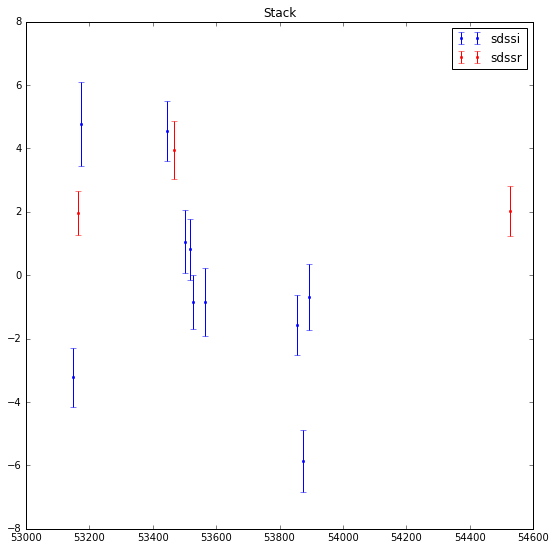

============New LC================
13


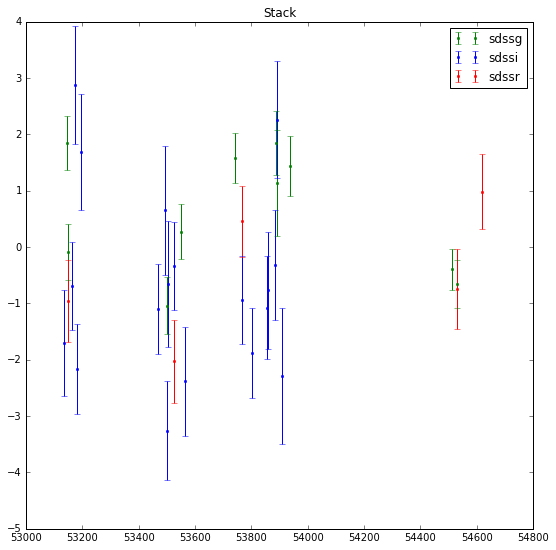

============New LC================
match
05D3jb
{'sdssi': 0.034561517539166225, 'sdssr': 0.048667516593759931, 'sdssz': 0.091826945252789588, 'sdssg': 0.056785752323106536}
14


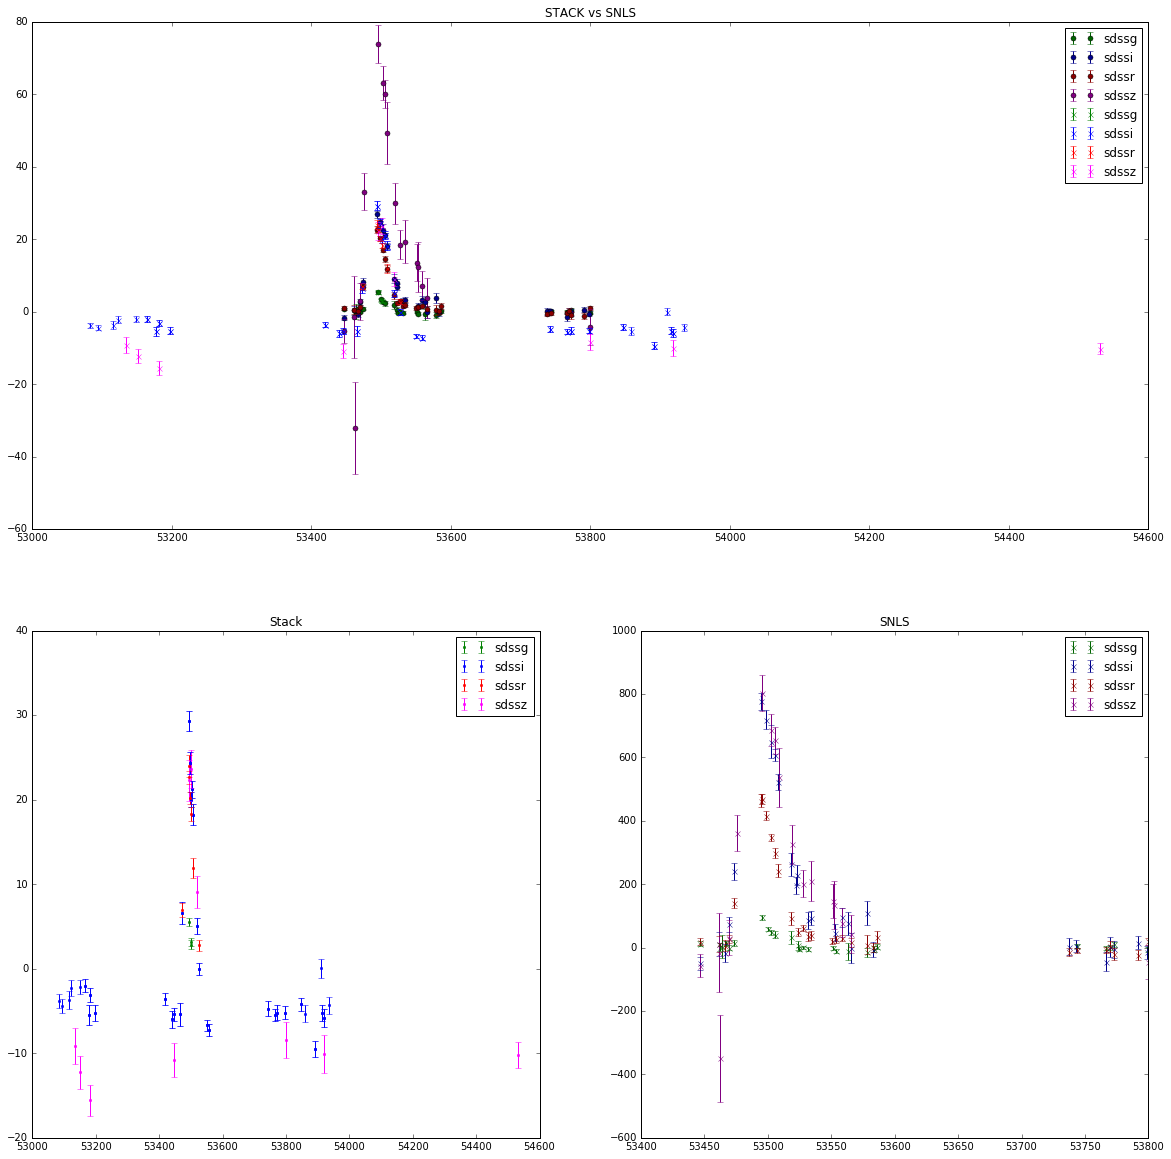

============New LC================
match
04D3kr
{'sdssi': 0.040355010021894192, 'sdssr': 0.047662064379552865, 'sdssz': nan, 'sdssg': nan}
15


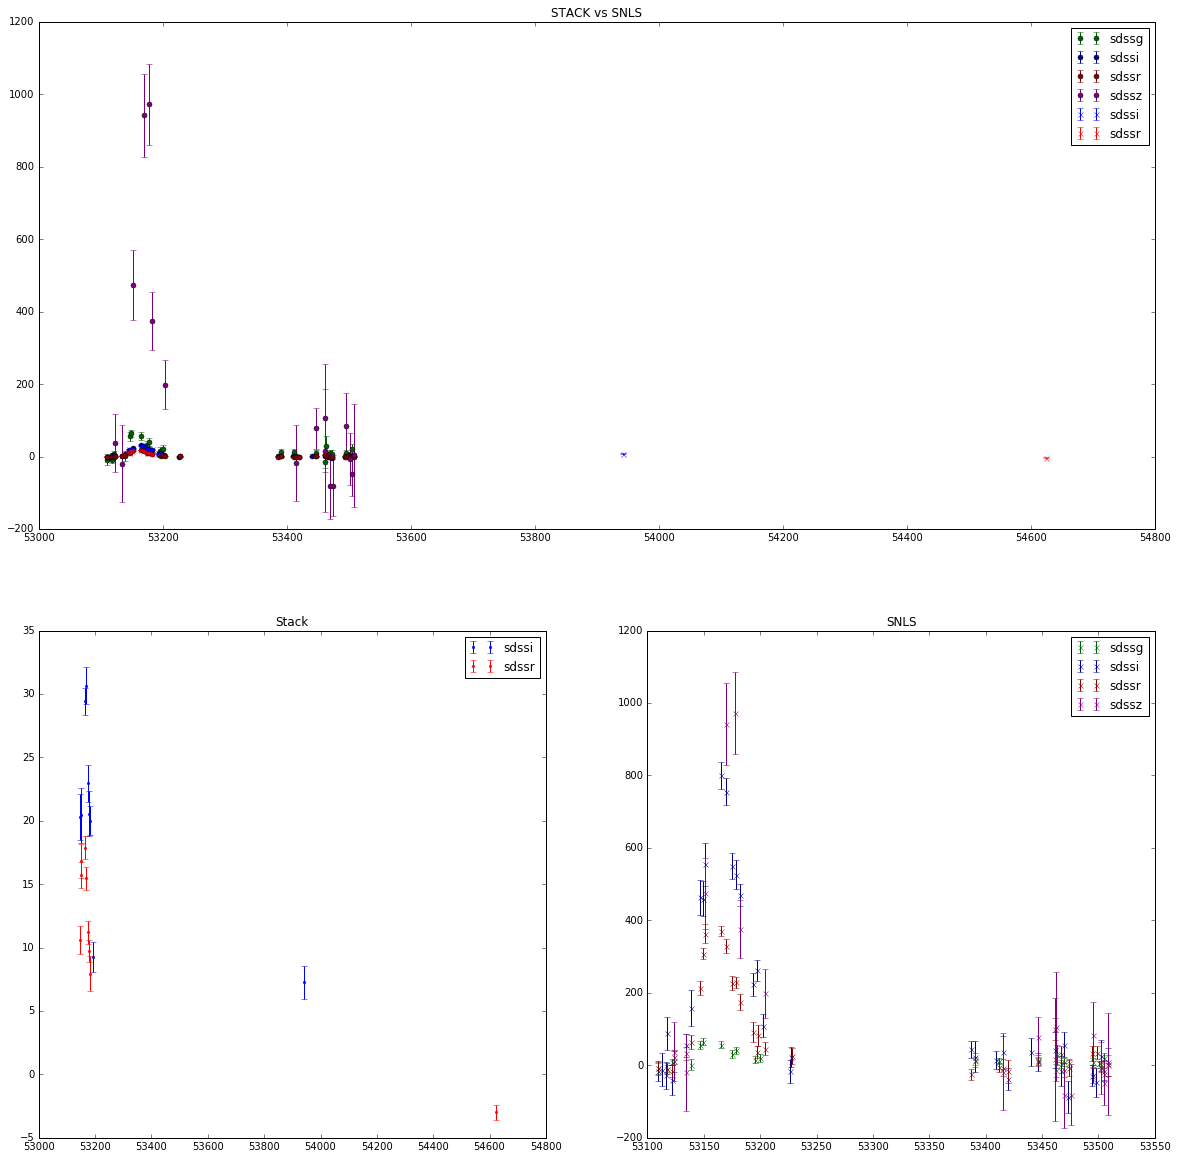

============New LC================
match
05D3lb
{'sdssi': -0.041022822767998998, 'sdssr': 0.18938255540403723, 'sdssz': nan, 'sdssg': nan}
16


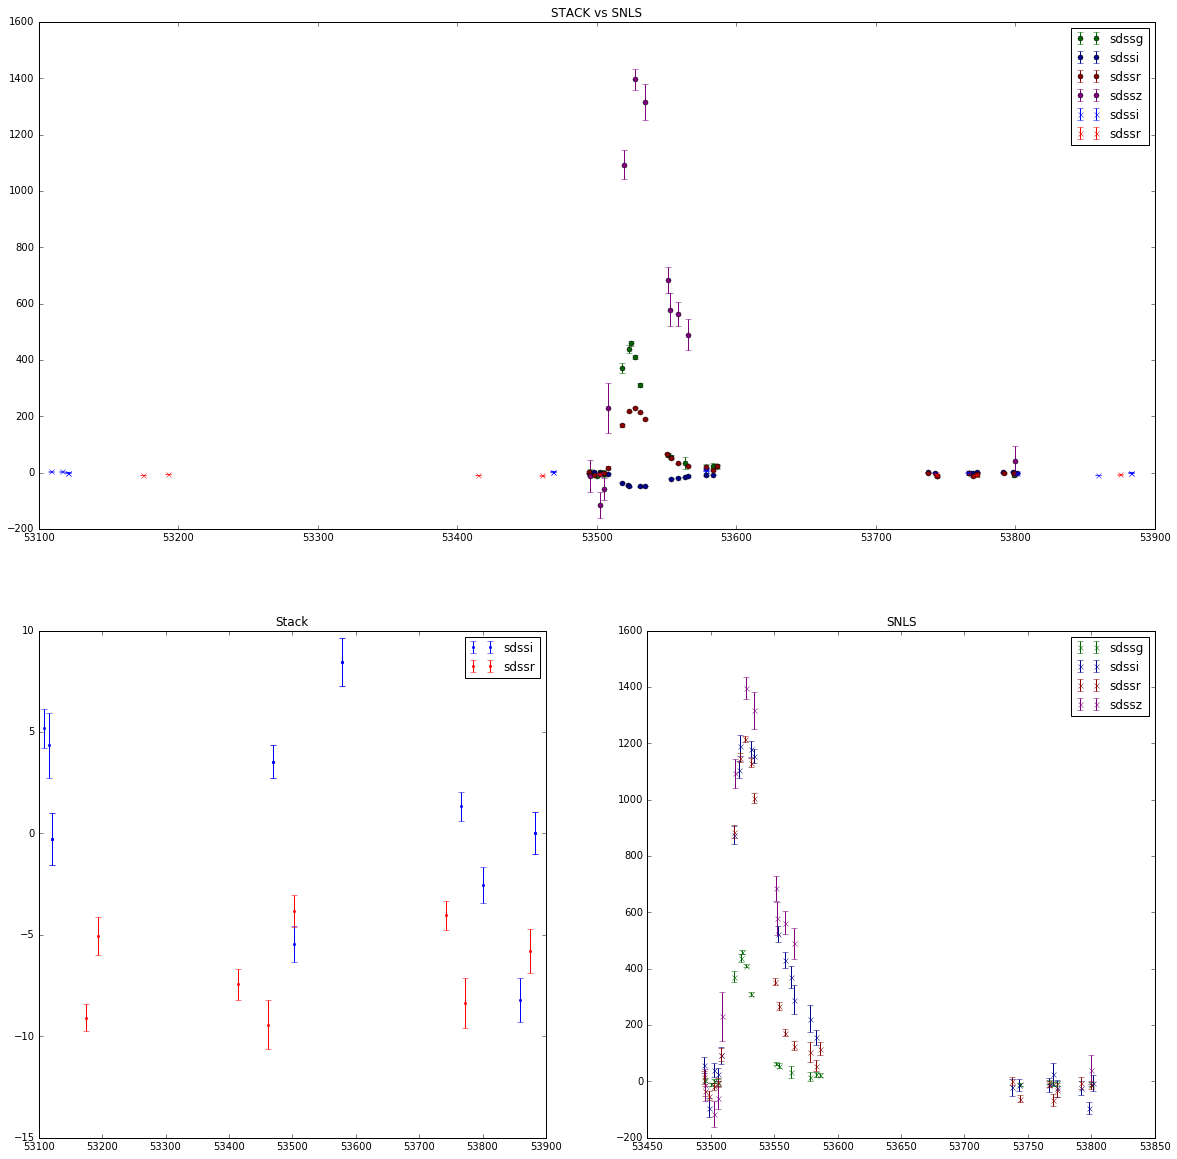

============New LC================
match
04D3ks
{'sdssi': 0.041945662855045633, 'sdssr': 0.057624243286075974, 'sdssz': nan, 'sdssg': nan}
17


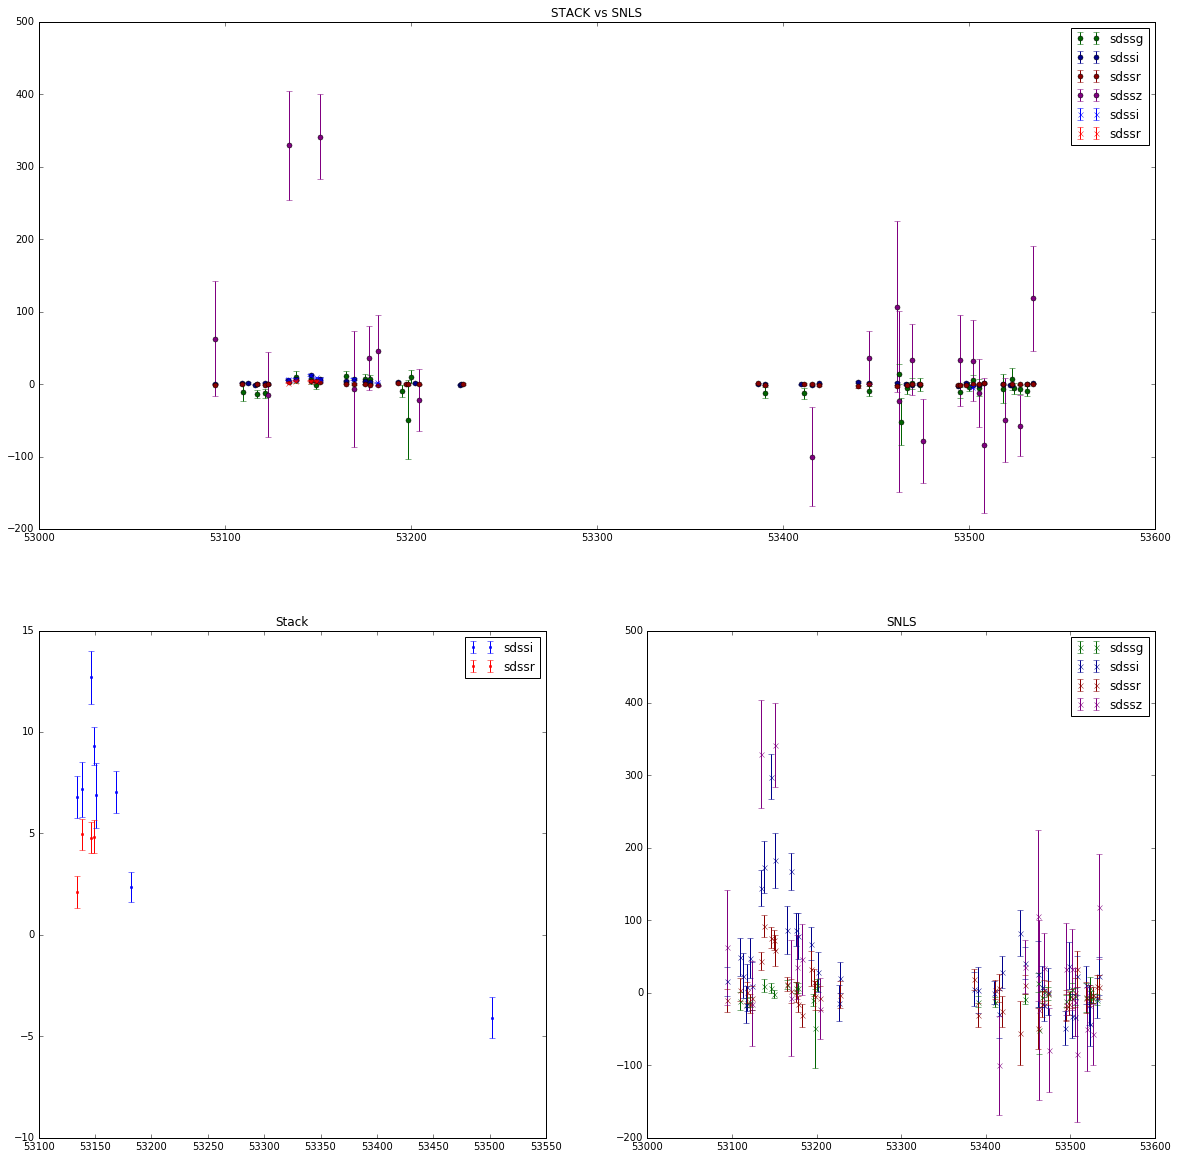

============New LC================
match
06D3dl
{'sdssi': 0.015085545636414566, 'sdssr': nan, 'sdssz': nan, 'sdssg': nan}
18


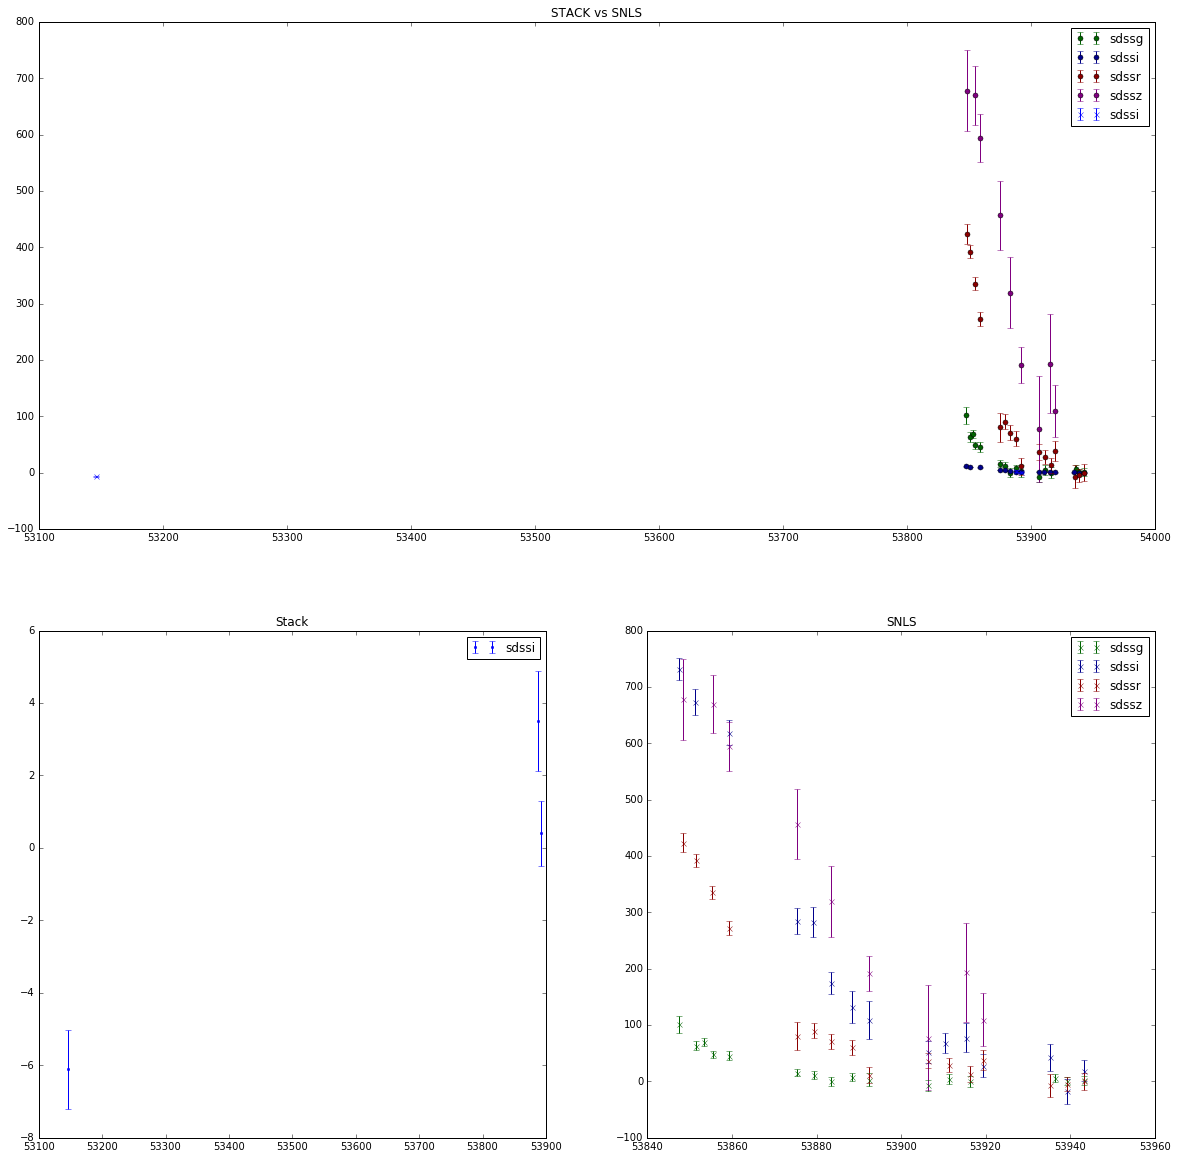

============New LC================
match
06D3dt
{'sdssi': 0.044345255208436518, 'sdssr': 0.051303489968769676, 'sdssz': 0.039559047156587444, 'sdssg': 0.066712329251330083}
19


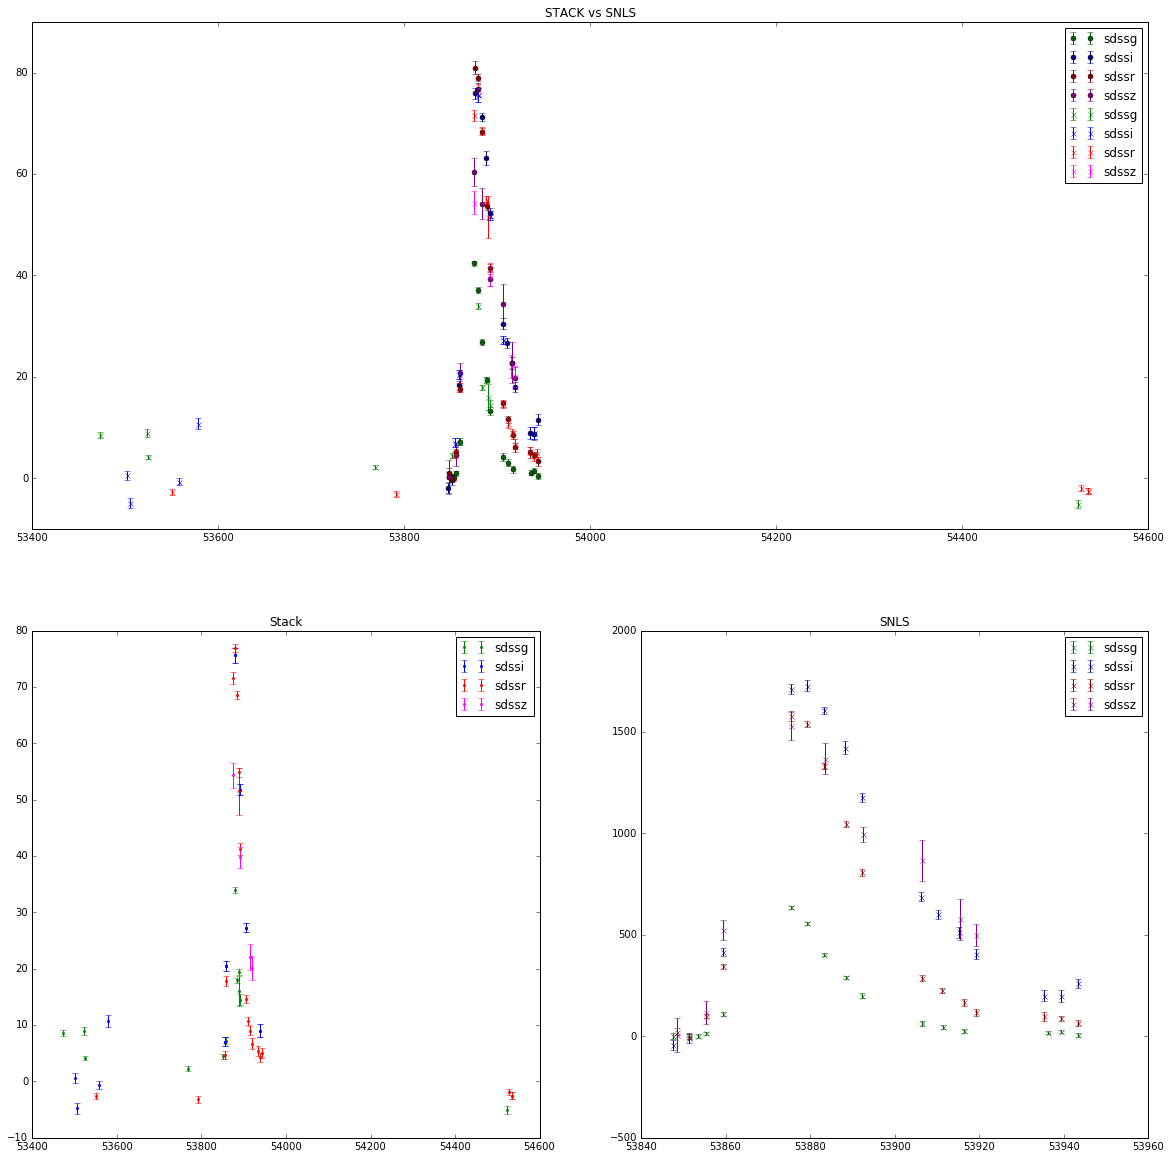

============New LC================
match
04D3mk
{'sdssi': 0.034224347145400638, 'sdssr': 0.054417657657679371, 'sdssz': nan, 'sdssg': nan}
20


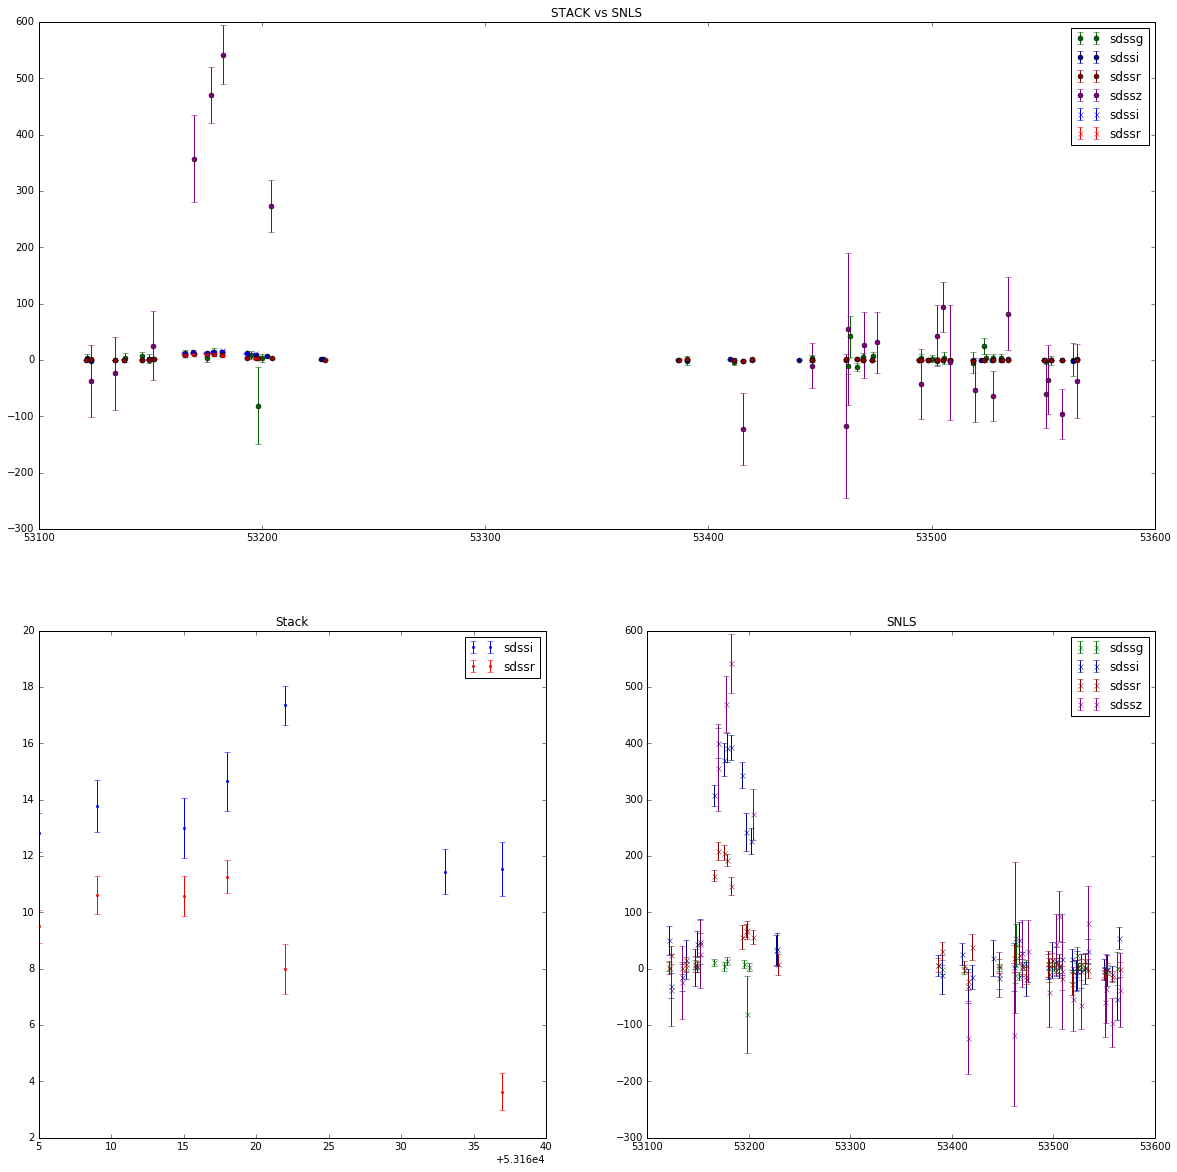

============New LC================
match
04D3nr
{'sdssi': 0.039216173765305076, 'sdssr': 0.05373121899002755, 'sdssz': nan, 'sdssg': nan}
21


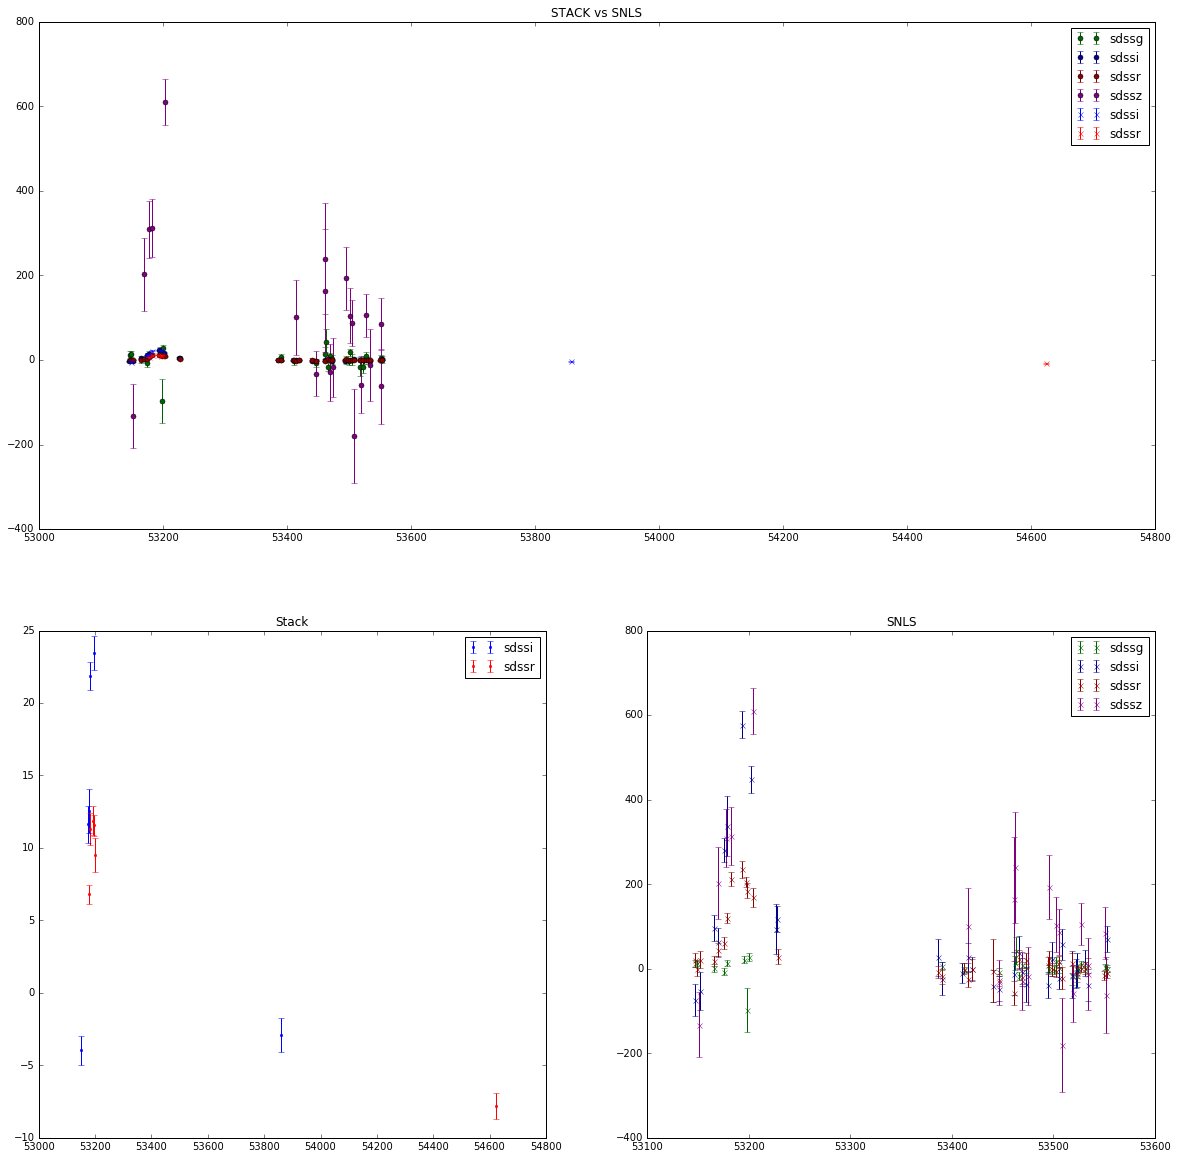

============New LC================
match
04D3cp
{'sdssi': 0.044106256448629914, 'sdssr': 0.041738803456873058, 'sdssz': nan, 'sdssg': 0.10229986877542546}
22


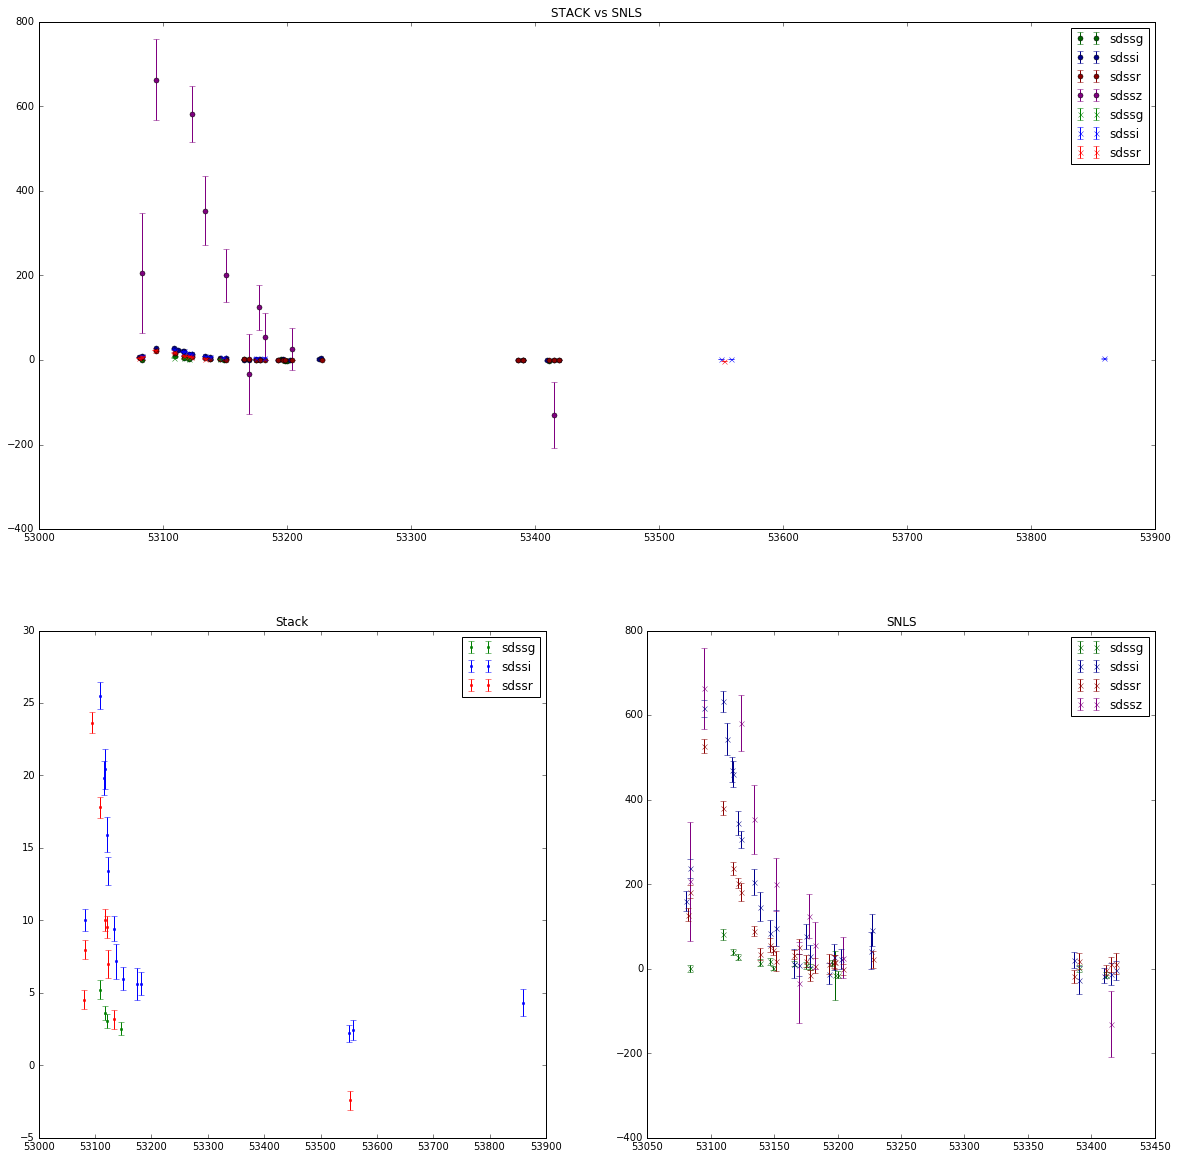

============New LC================
22


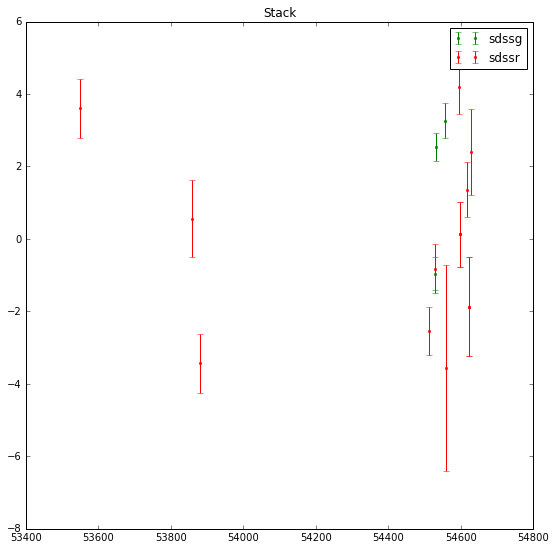

============New LC================
22


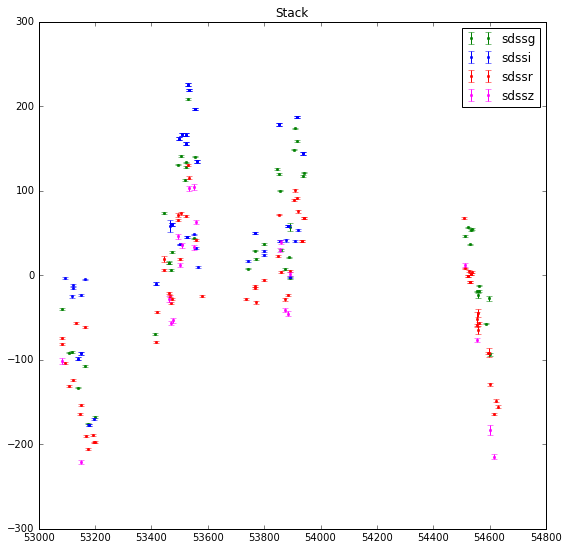

============New LC================
match
04D3fk
{'sdssi': 0.041150901460483481, 'sdssr': 0.05033415265802714, 'sdssz': nan, 'sdssg': nan}
23


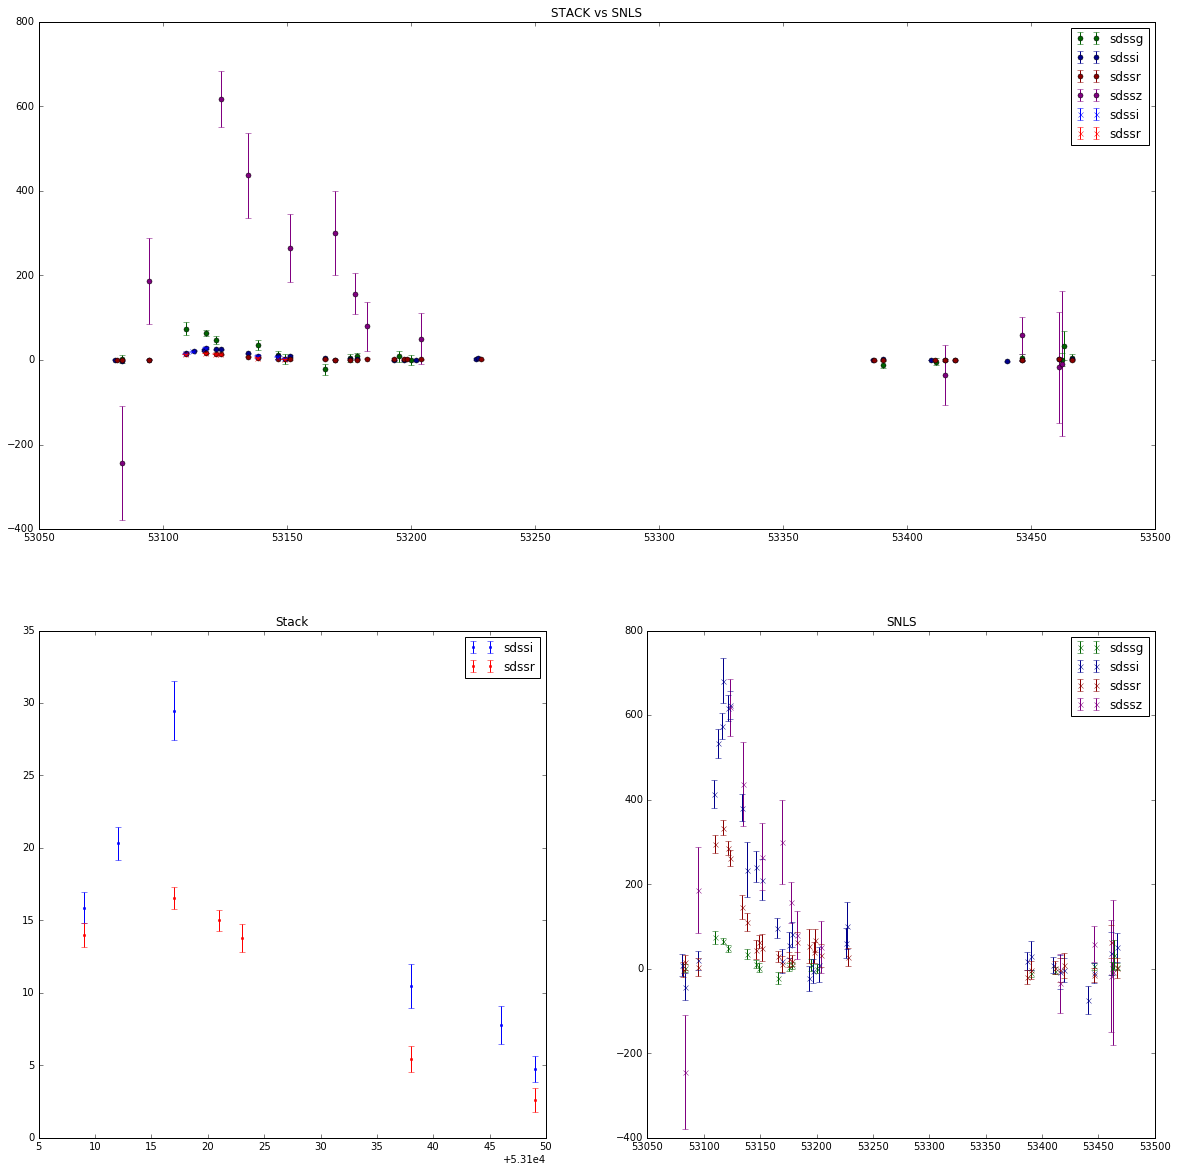

============New LC================
23


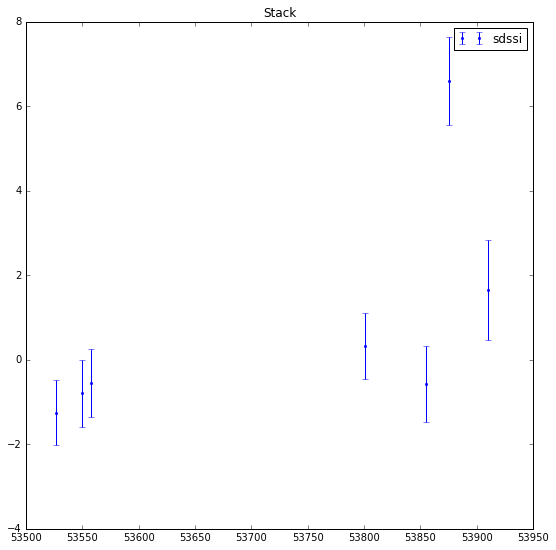

============New LC================
match
05D3jr
{'sdssi': 0.034280771511274233, 'sdssr': 0.042814582885349534, 'sdssz': 0.042479653194272916, 'sdssg': nan}
24


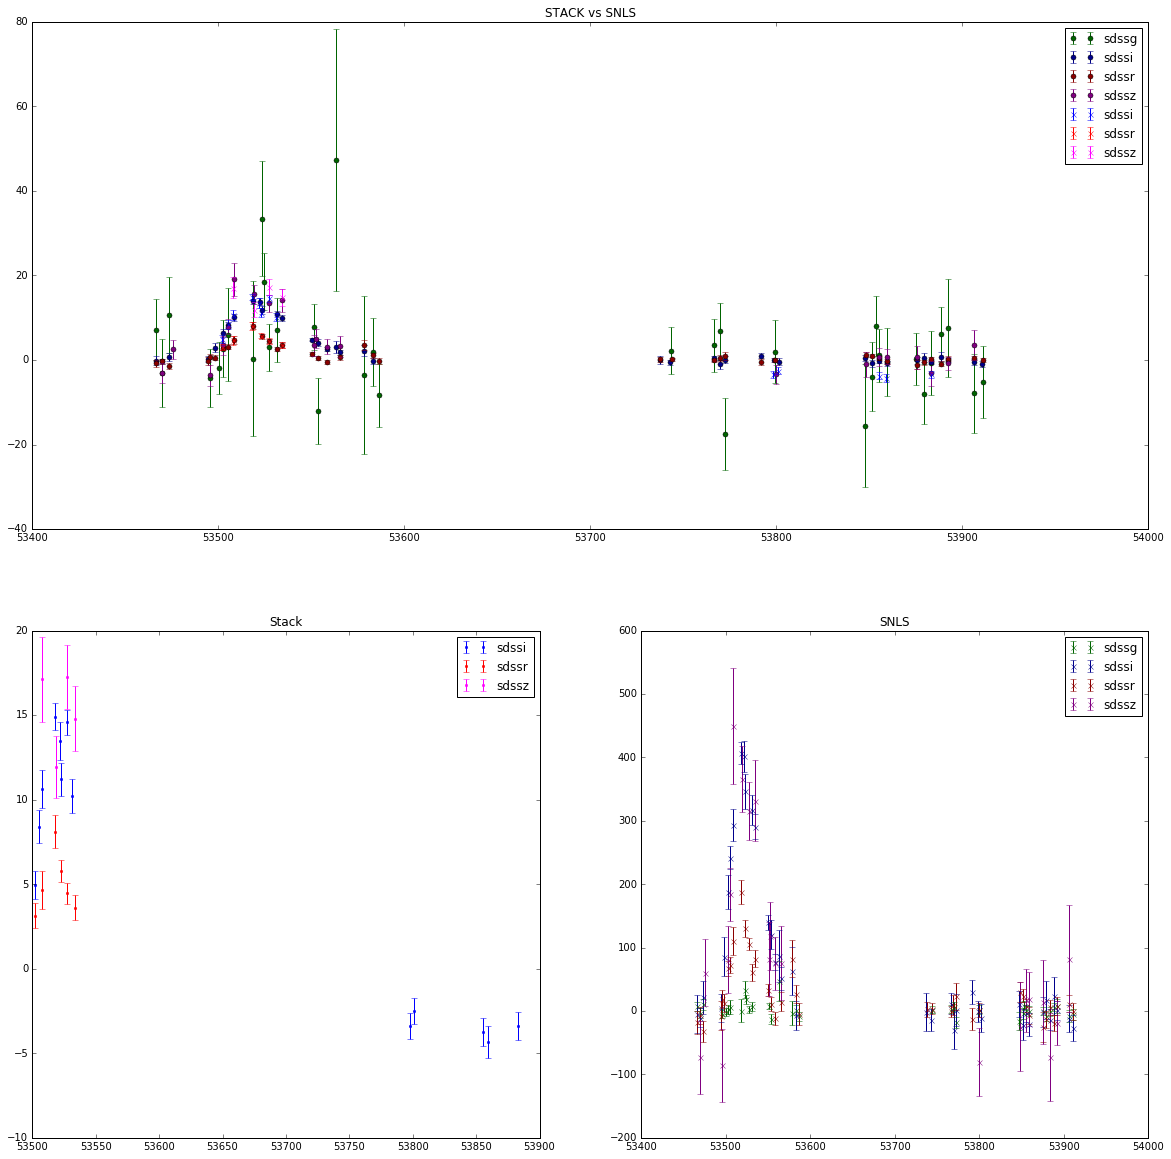

============New LC================
24


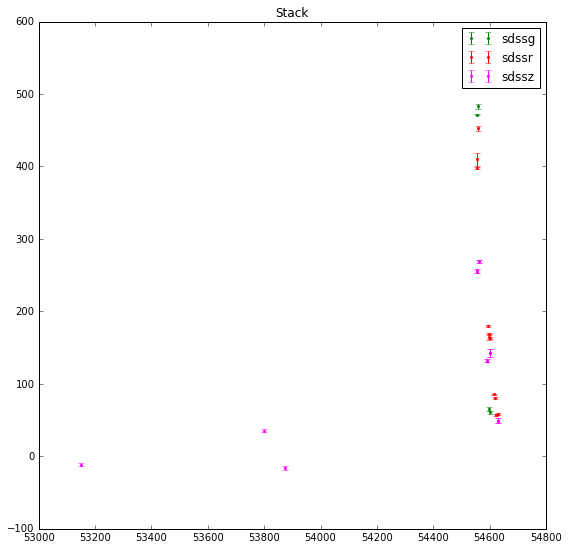

============New LC================
match
04D3fk
{'sdssi': nan, 'sdssr': nan, 'sdssz': nan, 'sdssg': nan}
25


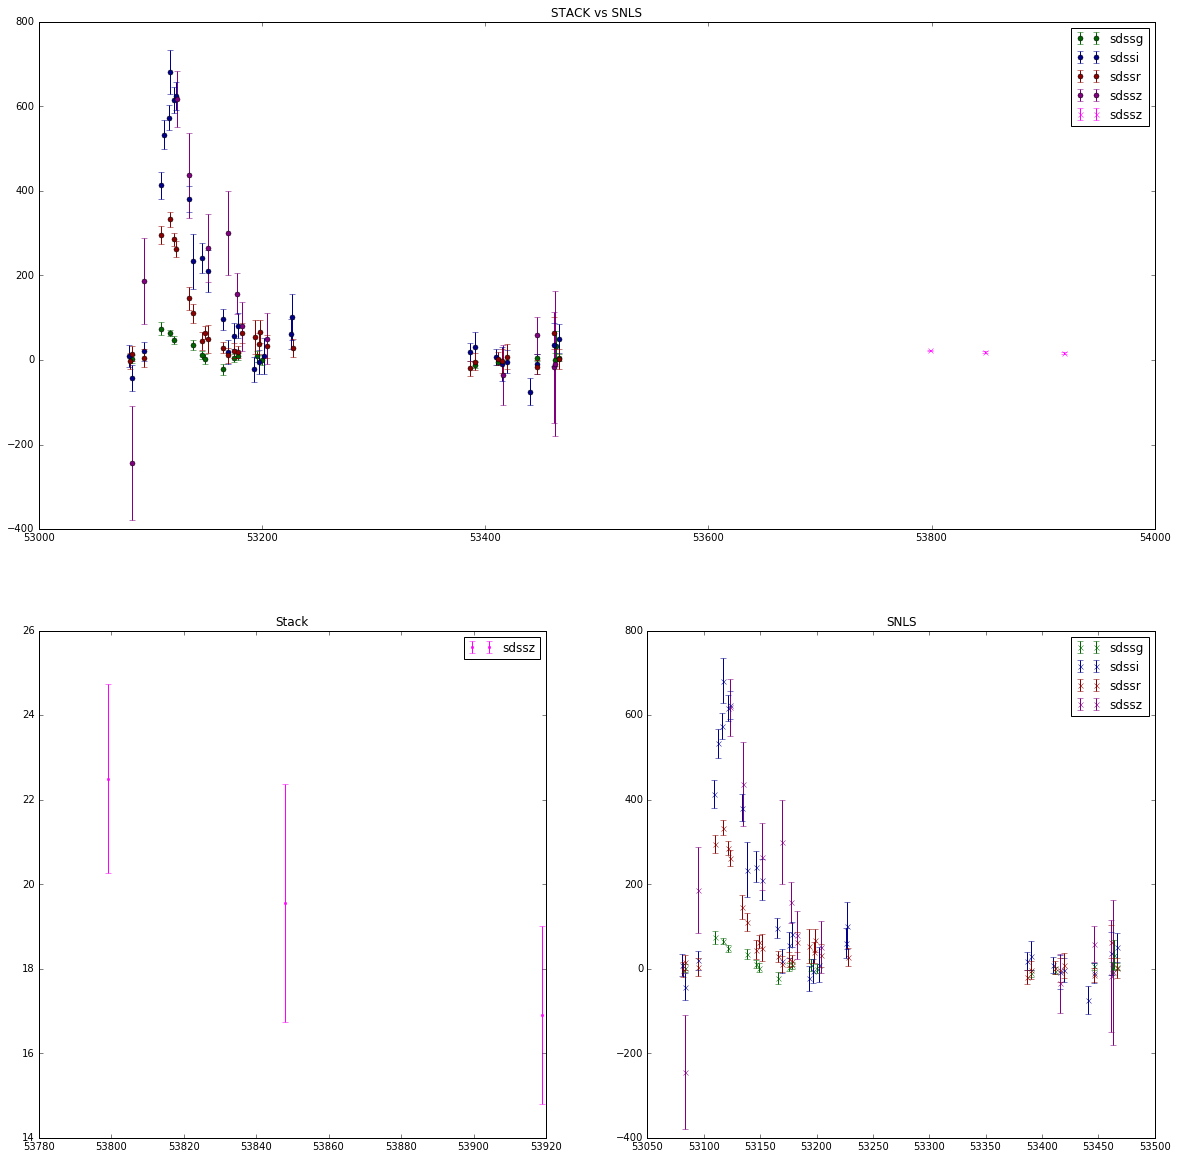

============New LC================
25


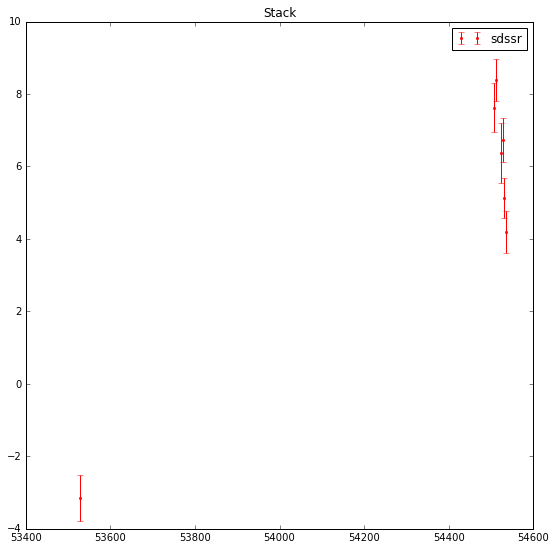

============New LC================
match
04D3dd
{'sdssi': 0.039407804030351615, 'sdssr': 0.052636241544581852, 'sdssz': 0.03936691874351092, 'sdssg': 0.056903652233924538}
26


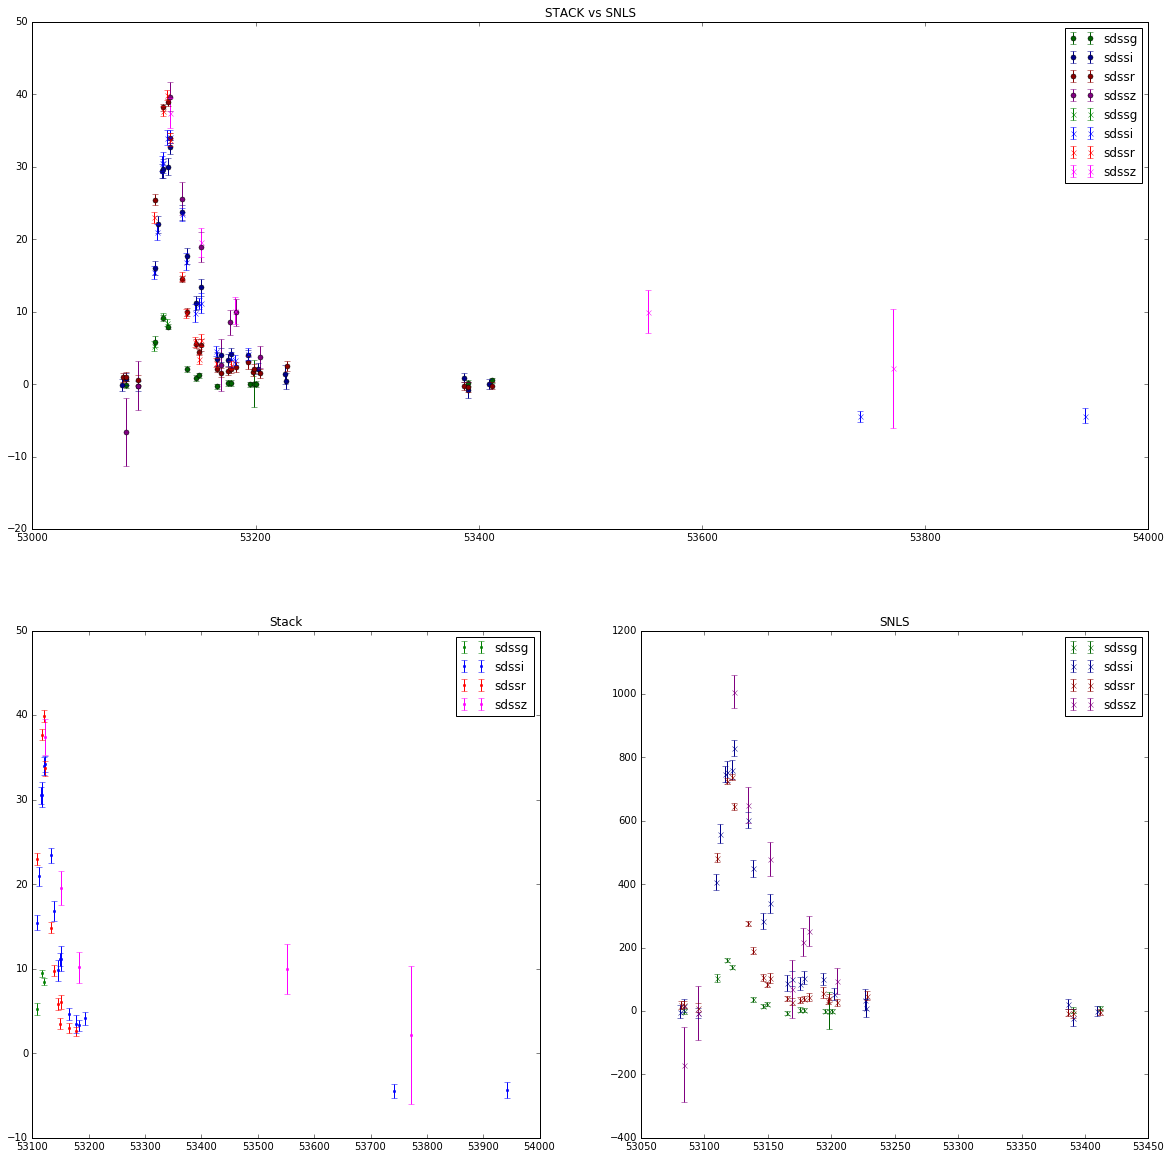

============New LC================
match
05D3gp
{'sdssi': 0.031739910520761916, 'sdssr': 0.046705757724370391, 'sdssz': -0.15709921738234267, 'sdssg': nan}
27


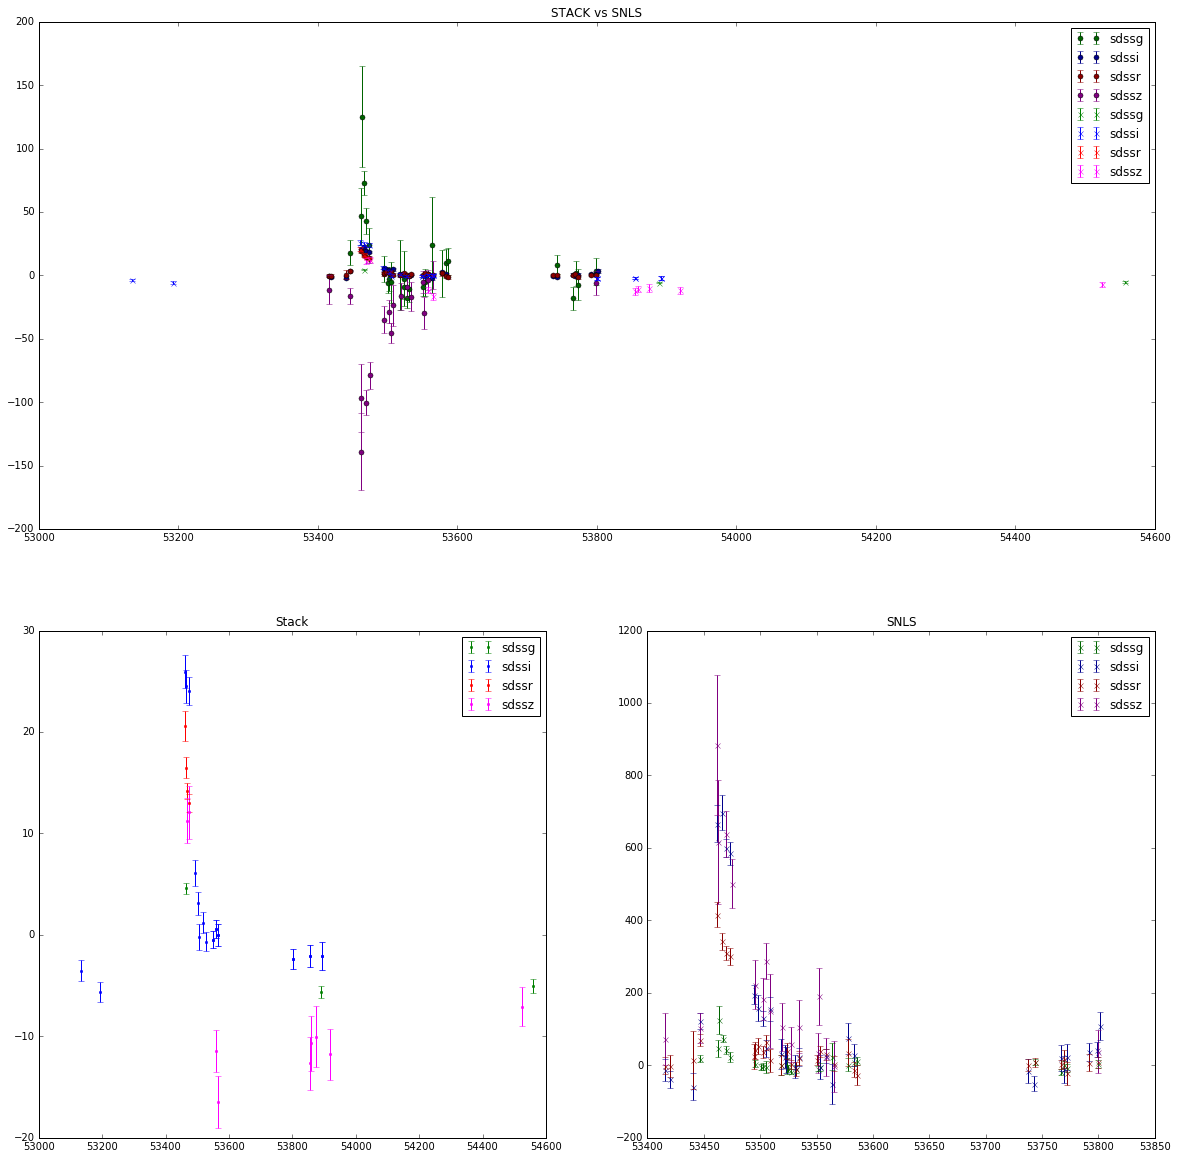

============New LC================
27


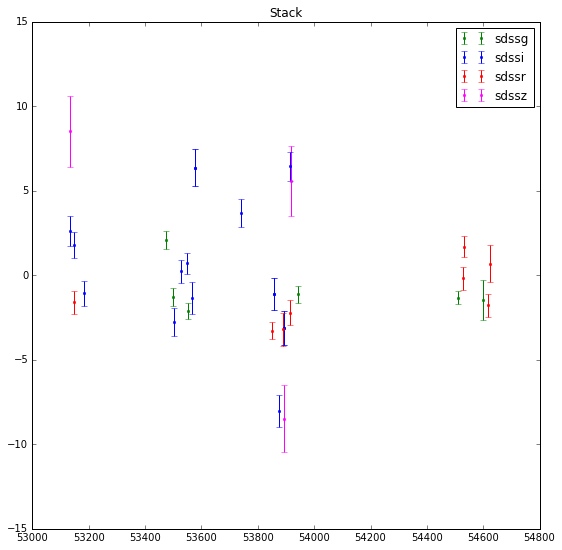

============New LC================
match
05D3la
{'sdssi': 0.041156208247765495, 'sdssr': 0.043915206505324544, 'sdssz': 0.032932532002858485, 'sdssg': 0.071457676952299889}
28


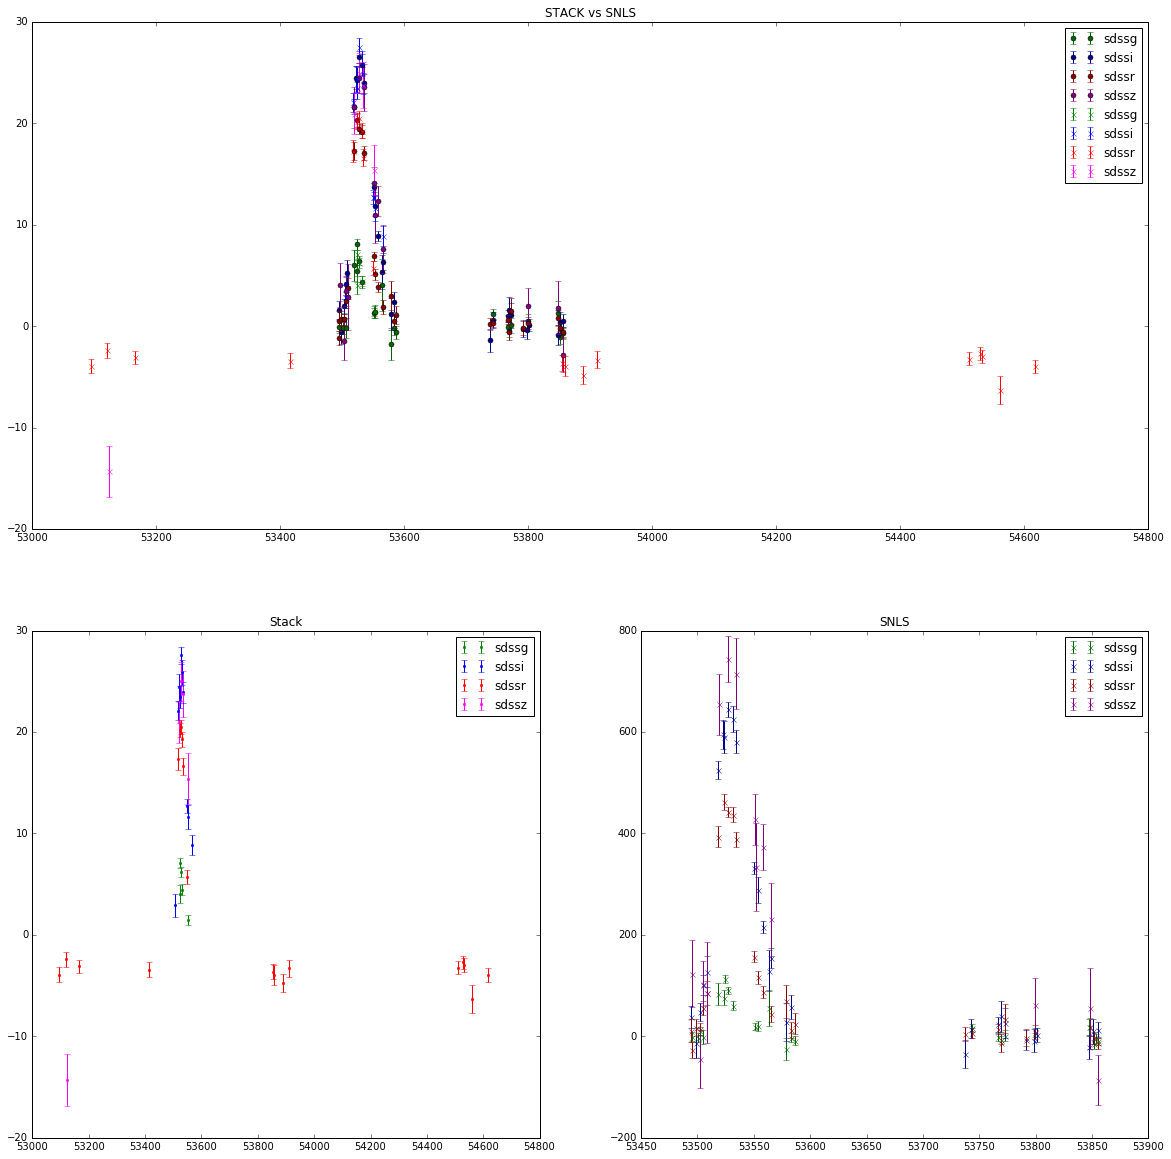

============New LC================
28


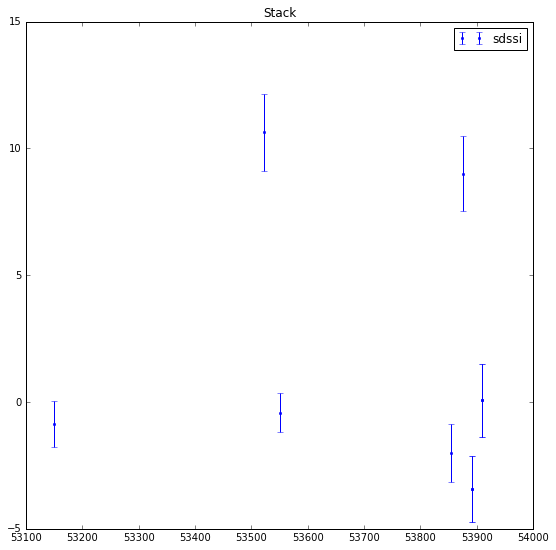

============New LC================
match
04D3fq
{'sdssi': nan, 'sdssr': nan, 'sdssz': nan, 'sdssg': nan}
29


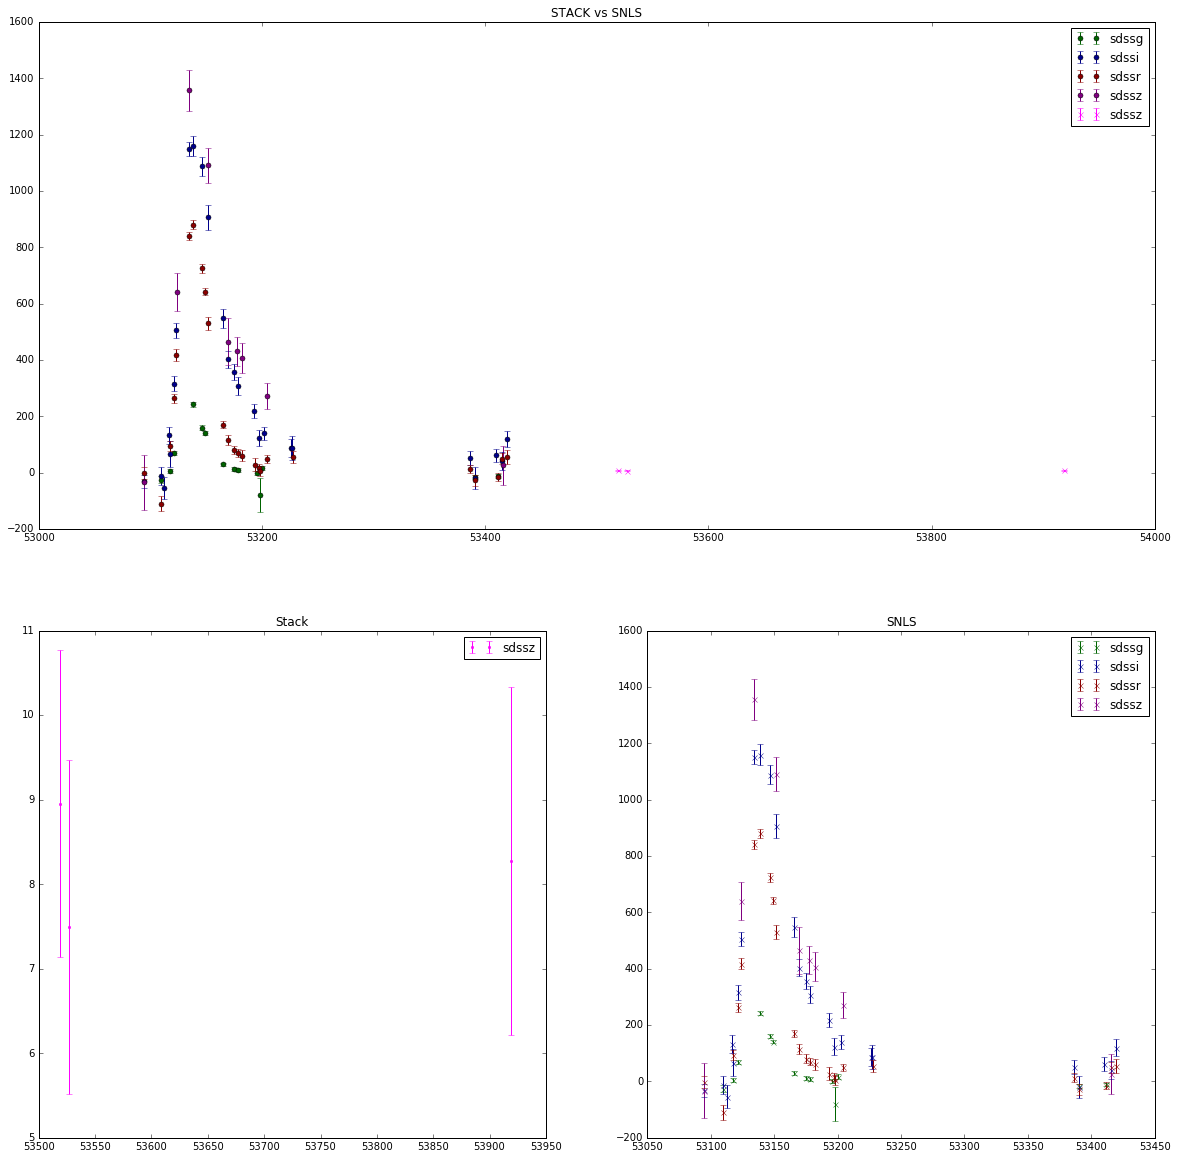

============New LC================
match
06D3em
{'sdssi': 0.046293343547903432, 'sdssr': 0.055748070197785923, 'sdssz': 0.036798945814831091, 'sdssg': nan}
30


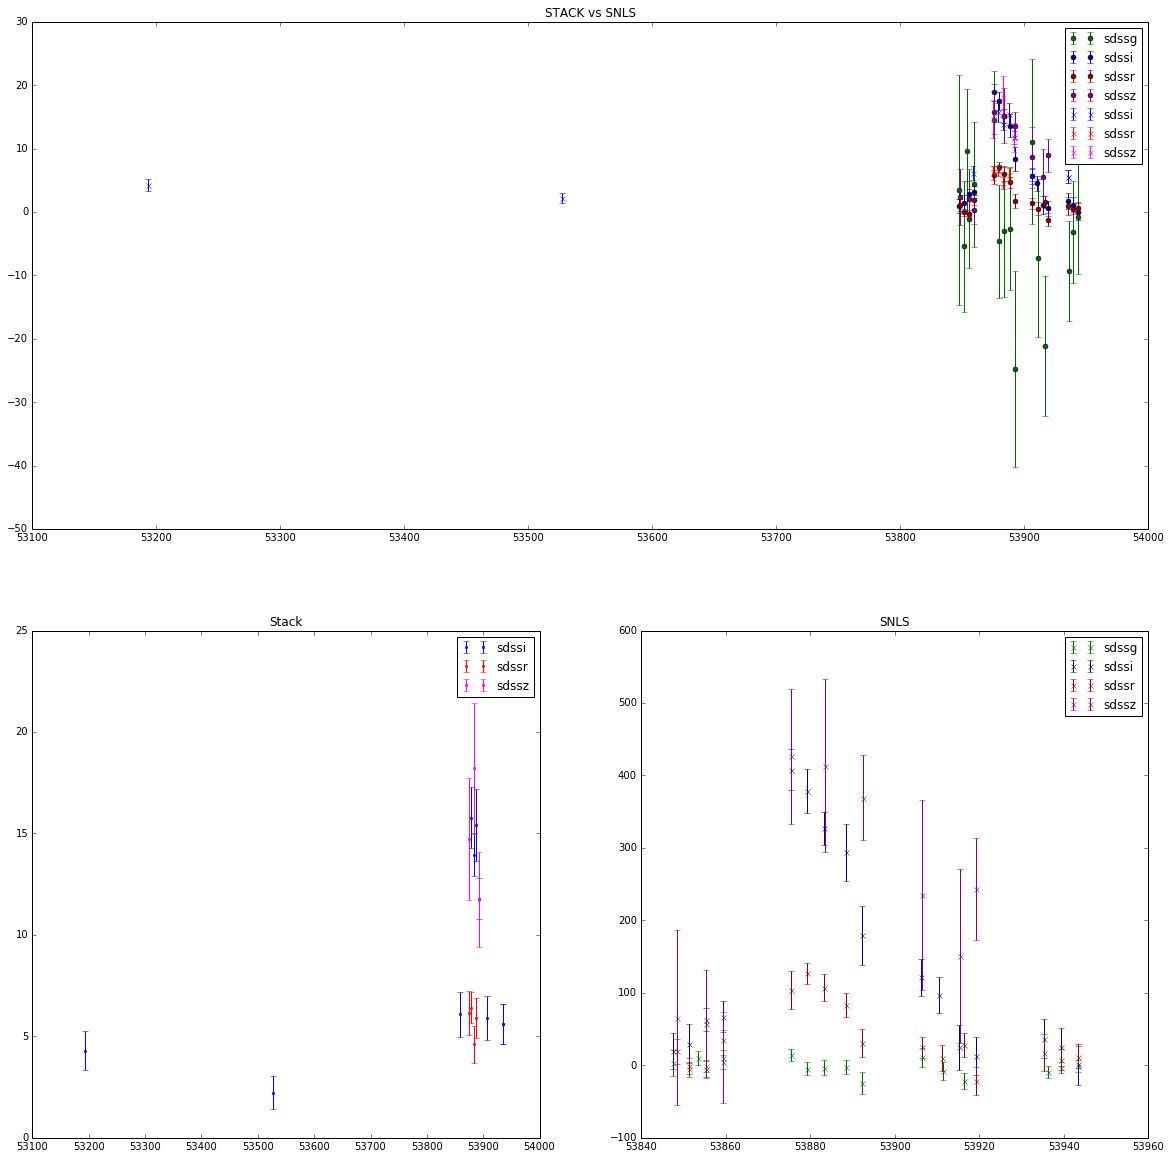

============New LC================
match
04D3ny
{'sdssi': 0.037823733940675654, 'sdssr': 0.050573567260436256, 'sdssz': nan, 'sdssg': nan}
31


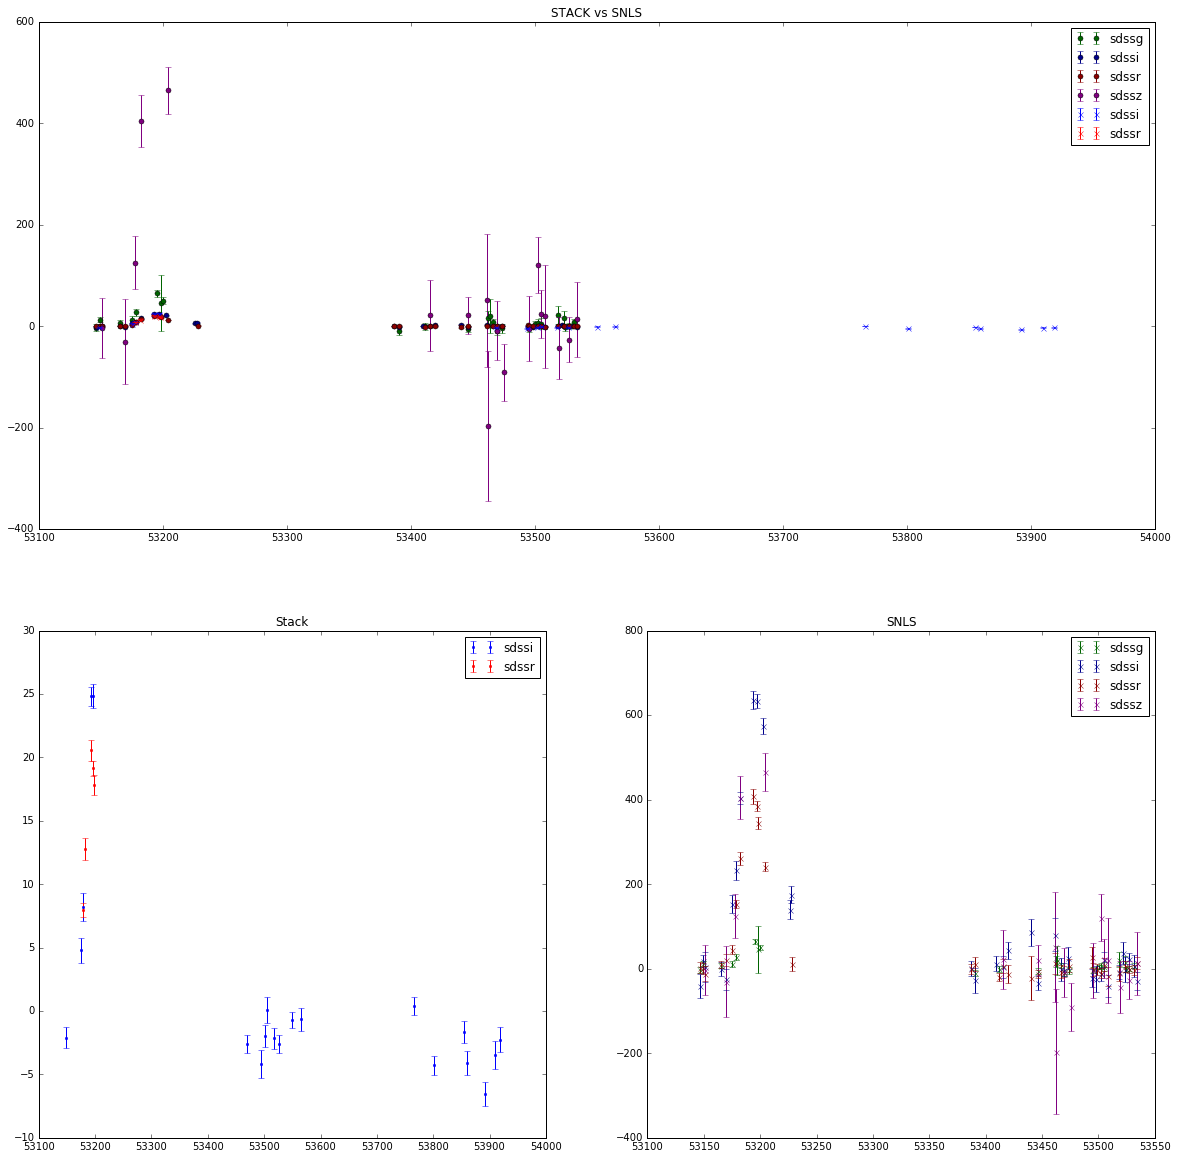

============New LC================
match
05D3jq
{'sdssi': 0.035758550781052292, 'sdssr': 0.047187880488275762, 'sdssz': 0.019895964927953324, 'sdssg': 0.064534895830131681}
32


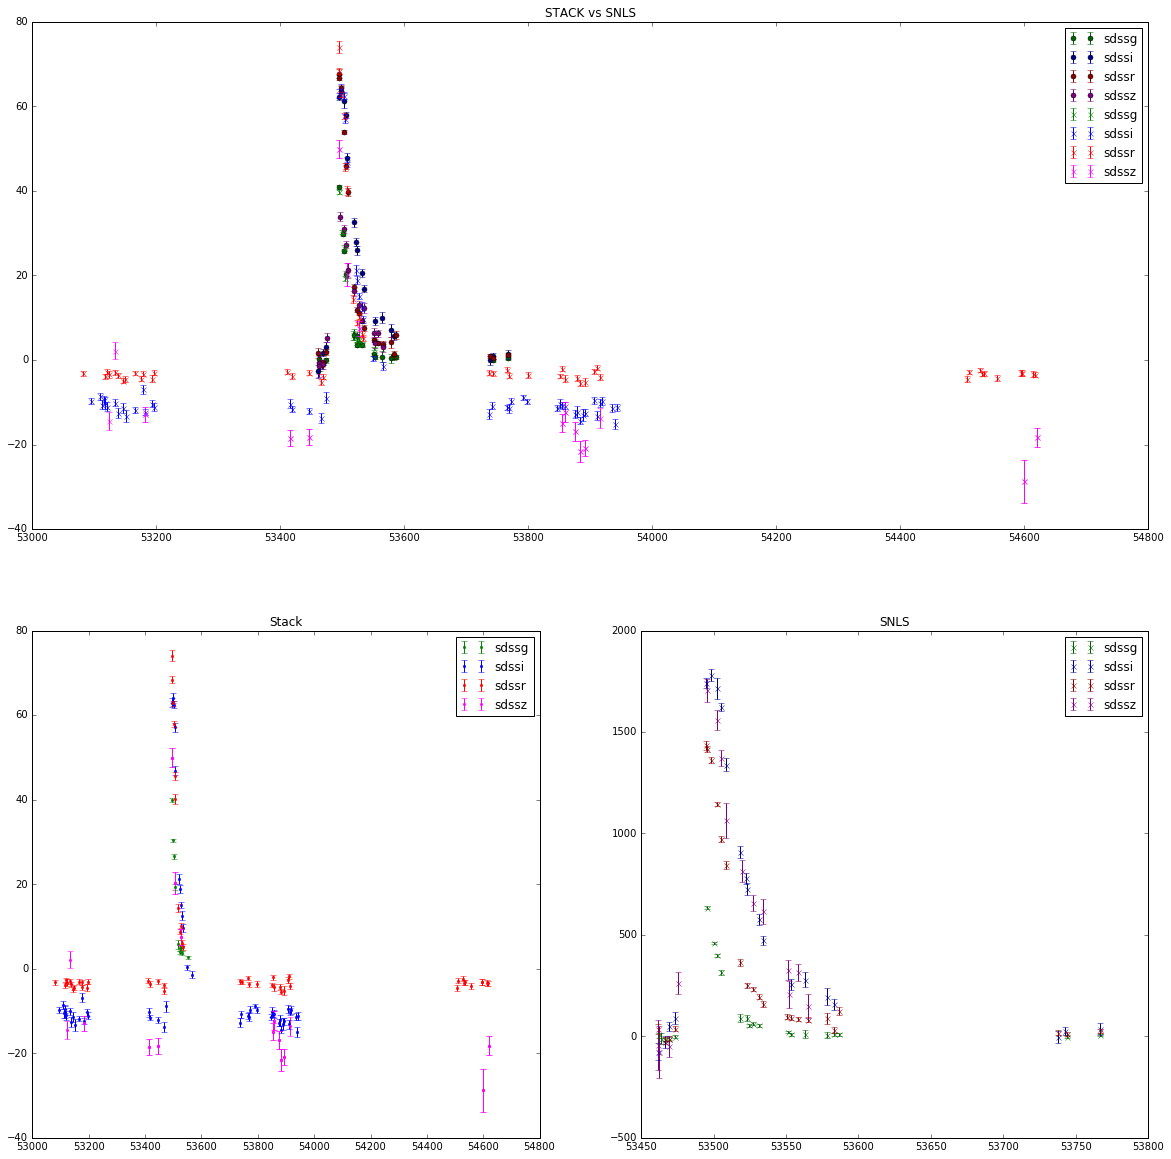

============New LC================
match
05D3hs
{'sdssi': 0.03932790887941507, 'sdssr': 0.047948607549096953, 'sdssz': 0.082493500711268833, 'sdssg': nan}
33


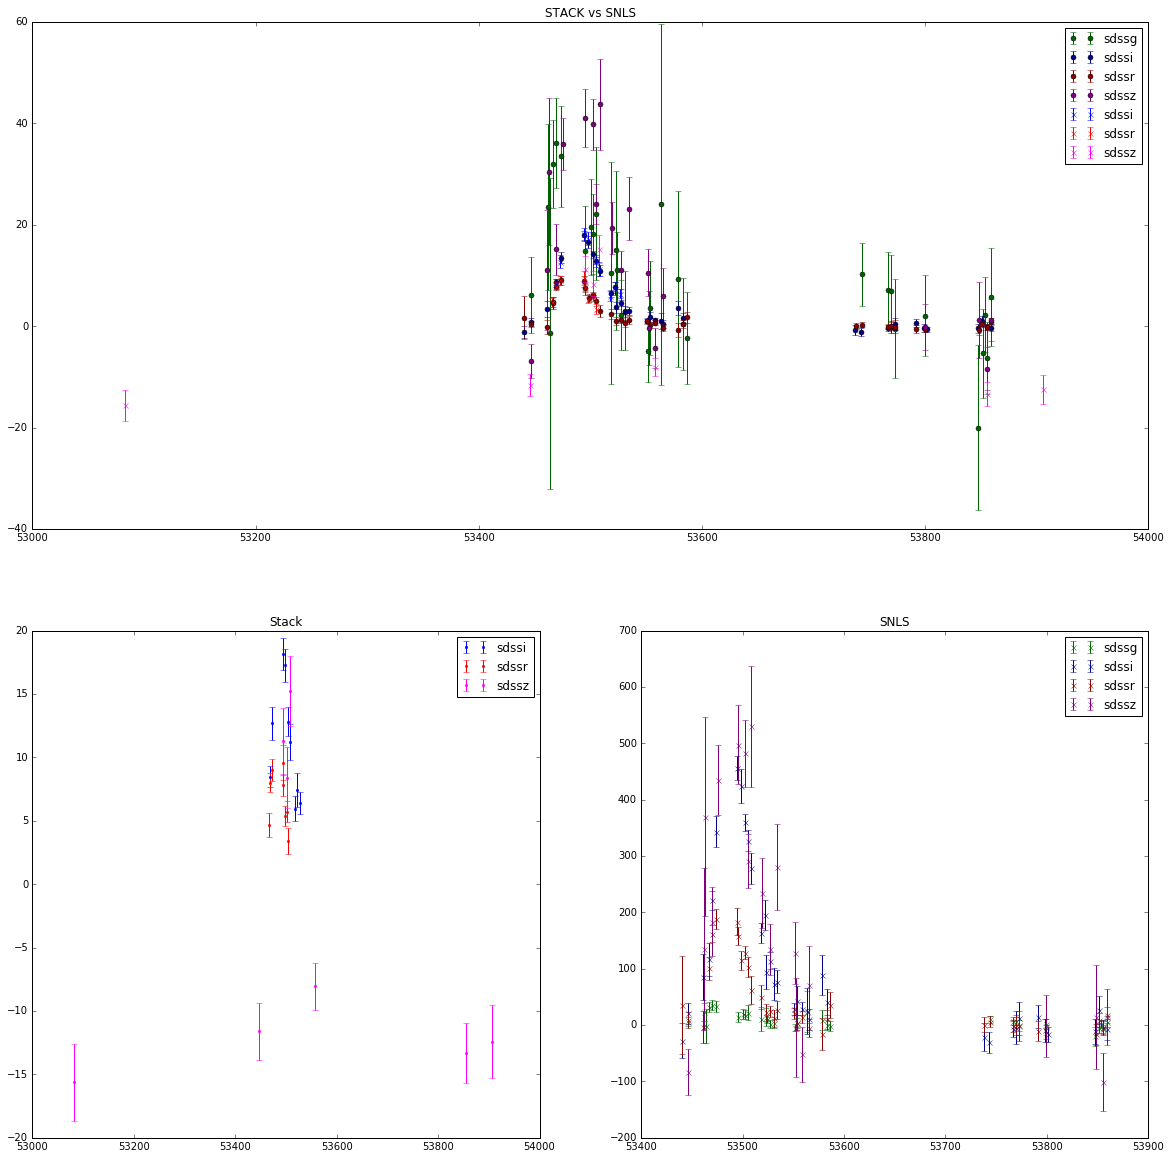

============New LC================
match
04D3lu
{'sdssi': 0.039590878070465116, 'sdssr': 0.045556717589582726, 'sdssz': nan, 'sdssg': 0.05685238305581658}
34


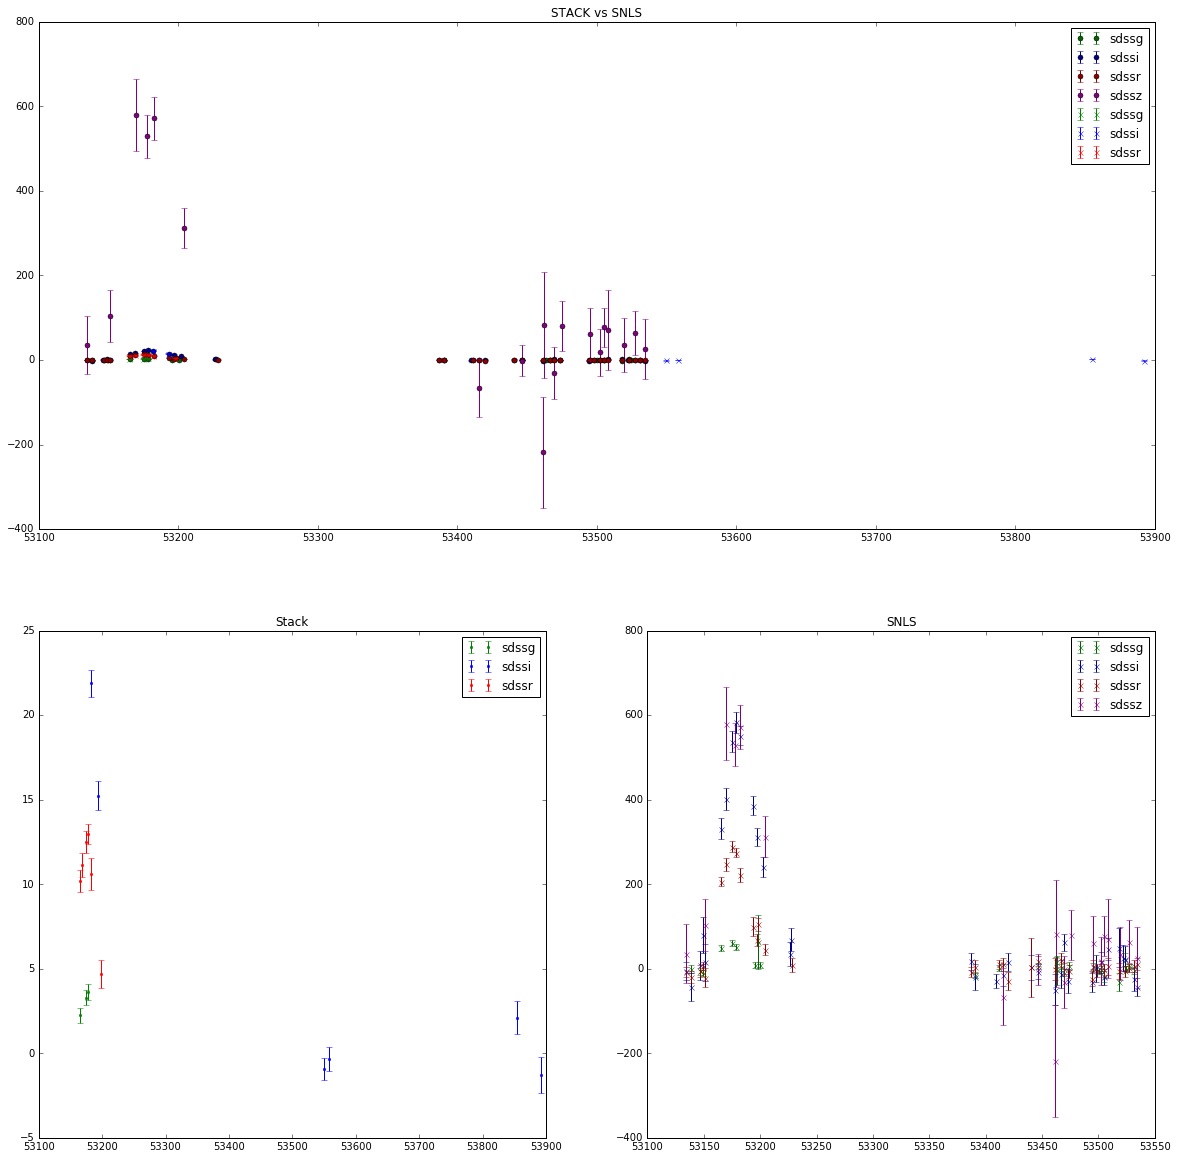

============New LC================
match
05D3ha
{'sdssi': 0.027691664932726925, 'sdssr': 0.043400786955315976, 'sdssz': 0.028630773083260962, 'sdssg': nan}
35


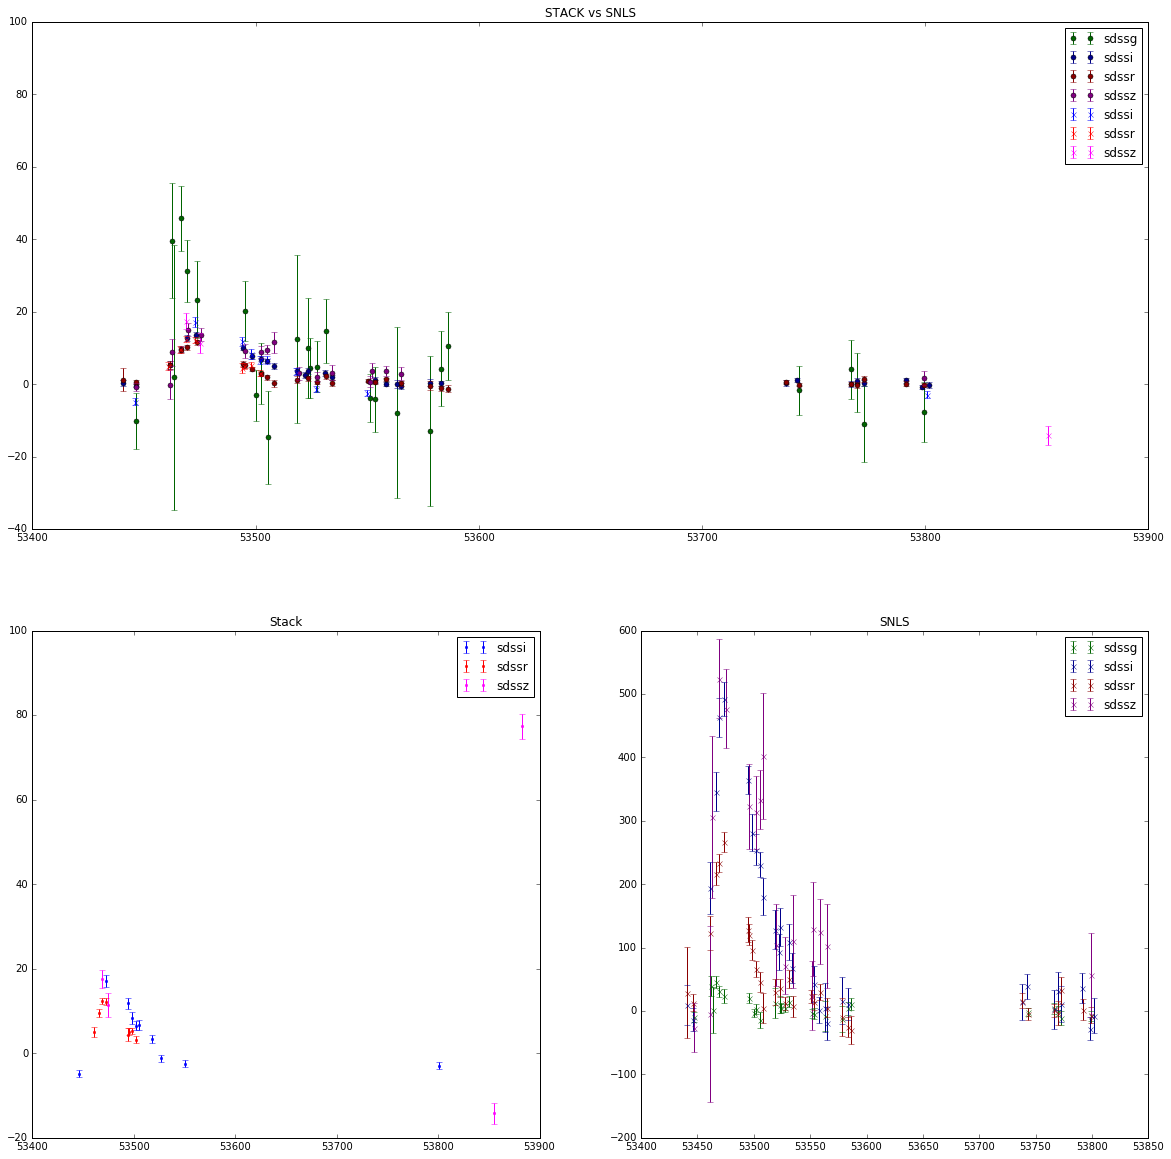

============New LC================
35


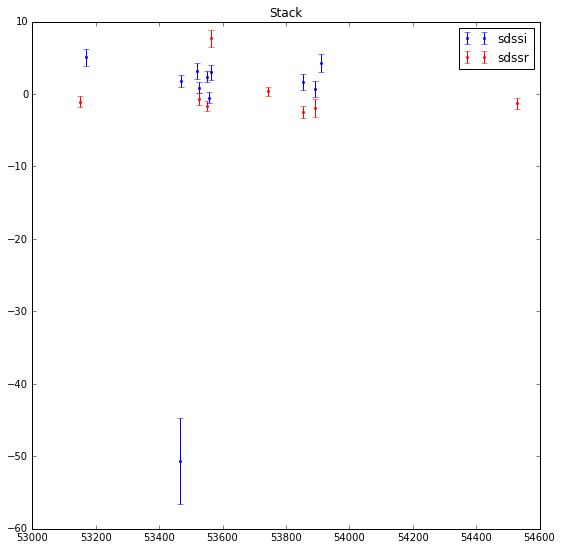

============New LC================
match
06D3el
{'sdssi': 0.043781274717674644, 'sdssr': 0.051062953236742571, 'sdssz': 0.037446061057460851, 'sdssg': nan}
36


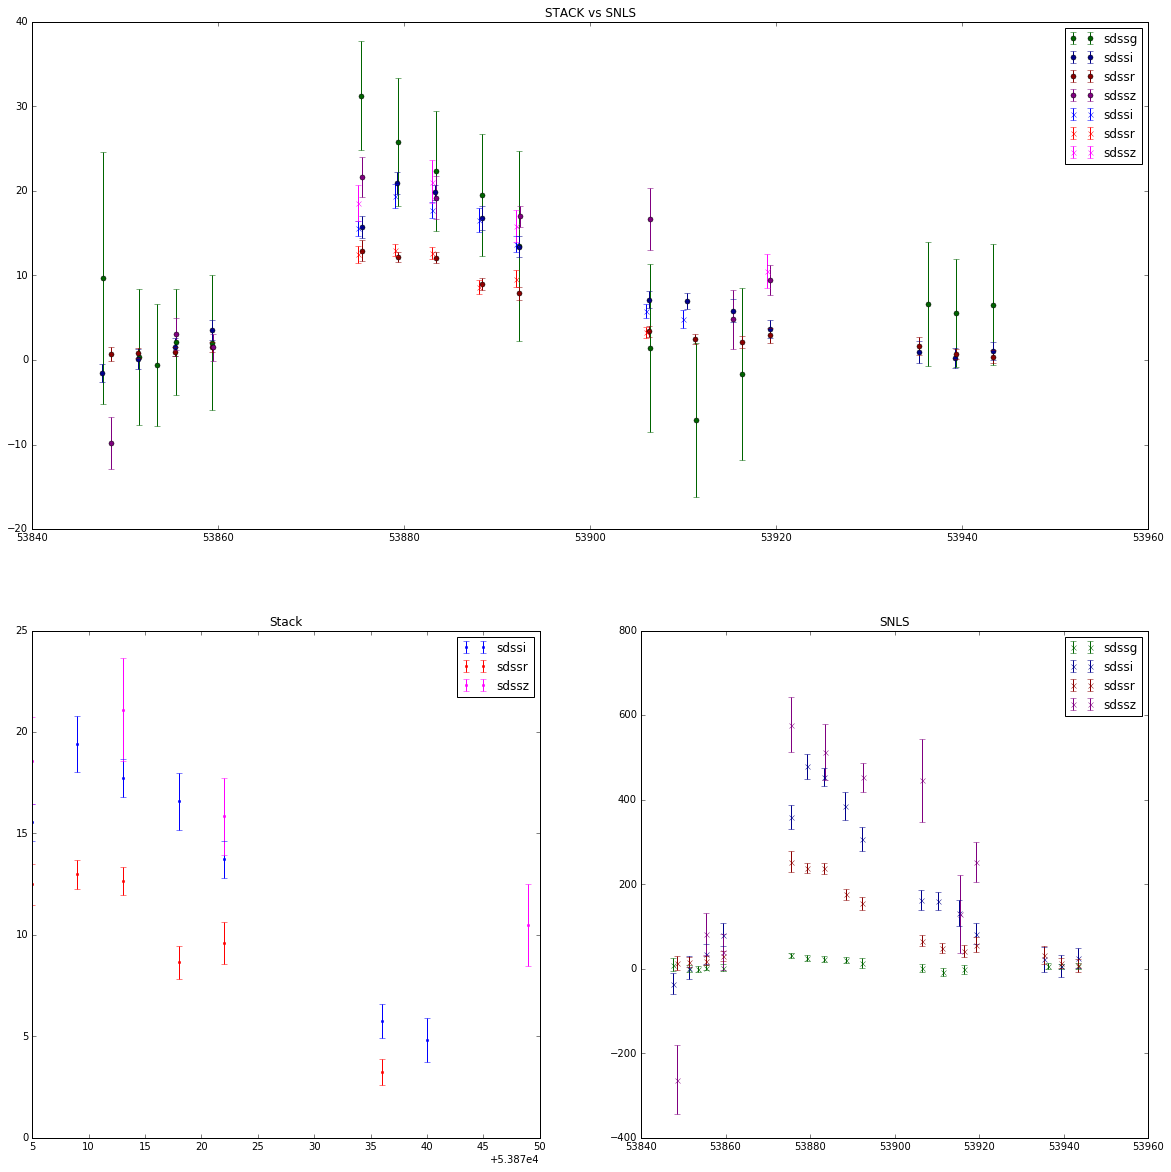

============New LC================
match
03D3cd
{'sdssi': 0.044308264901889959, 'sdssr': 0.036829910458599784, 'sdssz': 0.032325311578074355, 'sdssg': 0.047608438388601605}
37


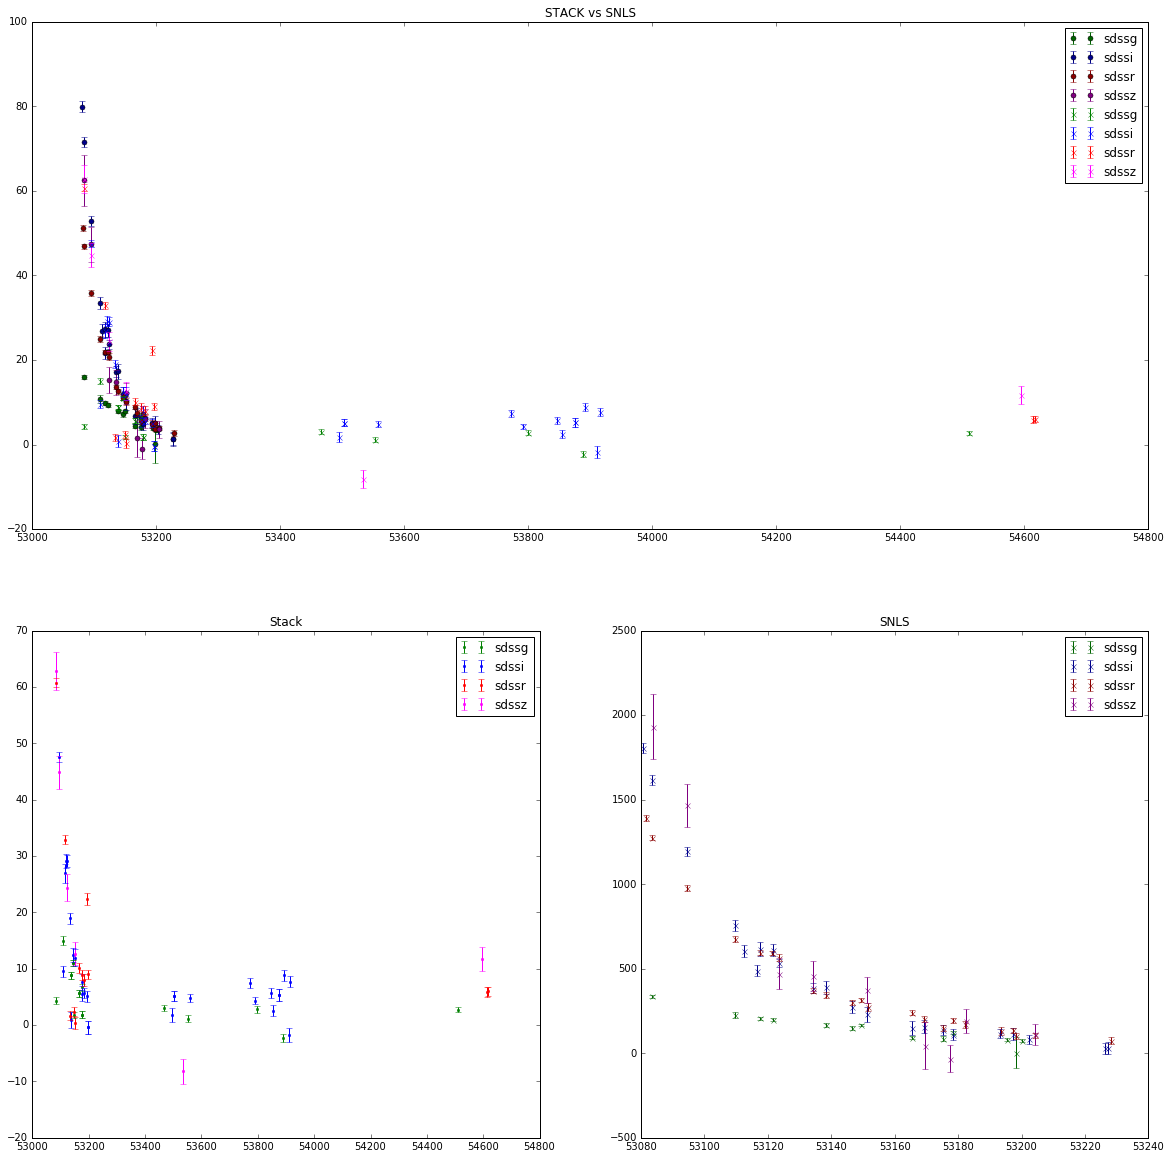

============New LC================
match
04D3nc
{'sdssi': 0.041365799584443204, 'sdssr': 0.051544875134711919, 'sdssz': nan, 'sdssg': 0.062332696848407365}
38


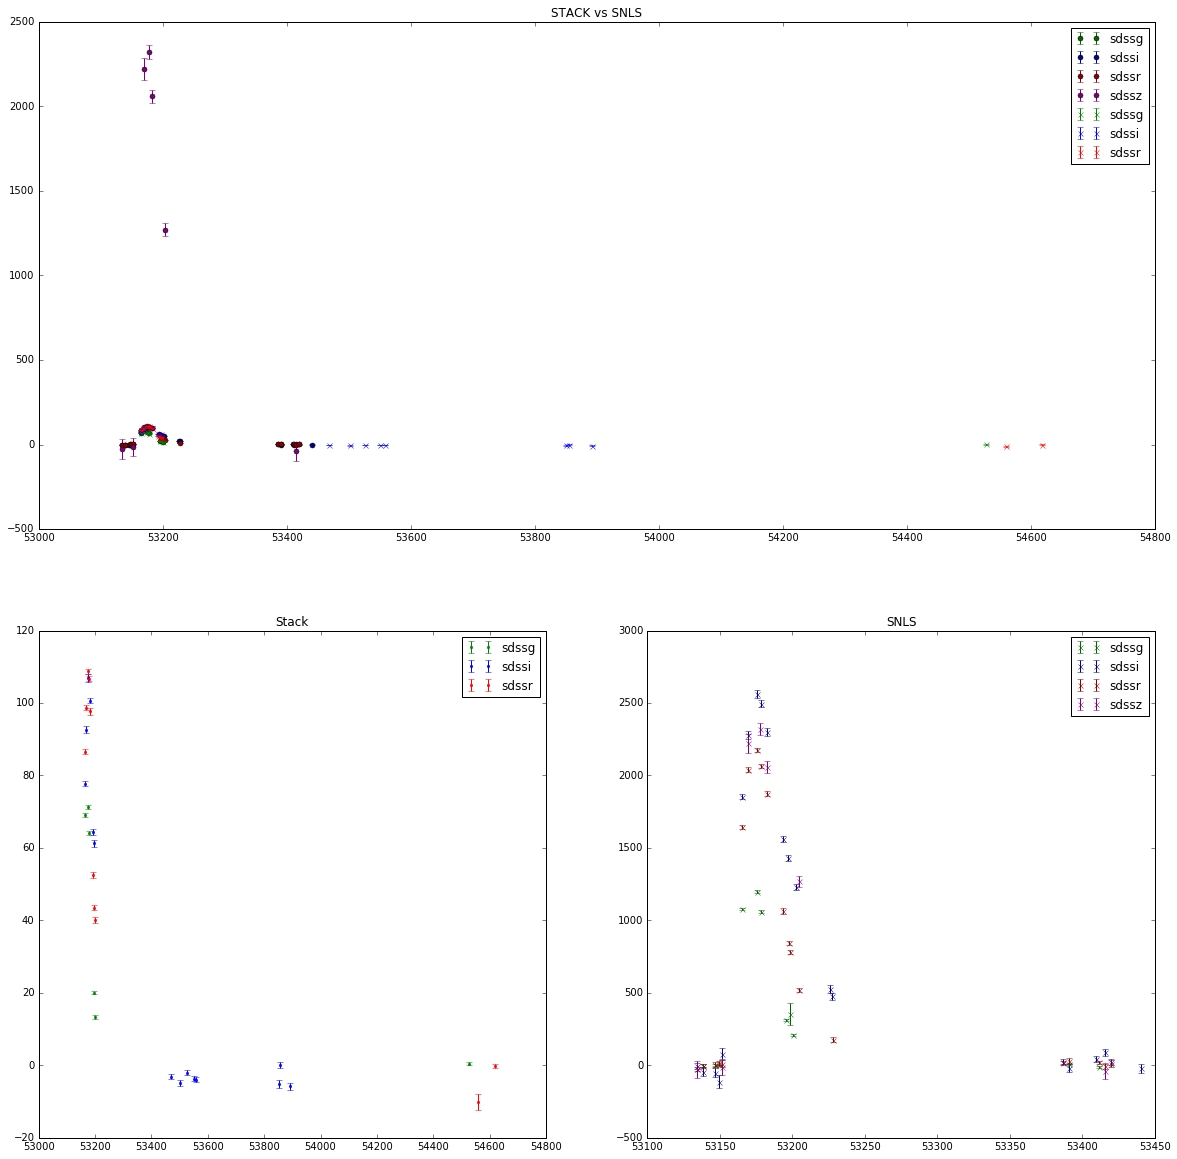

============New LC================
match
04D3bf
{'sdssi': 0.041761895181847281, 'sdssr': 0.047188976576514503, 'sdssz': 0.034927564015152186, 'sdssg': nan}
39


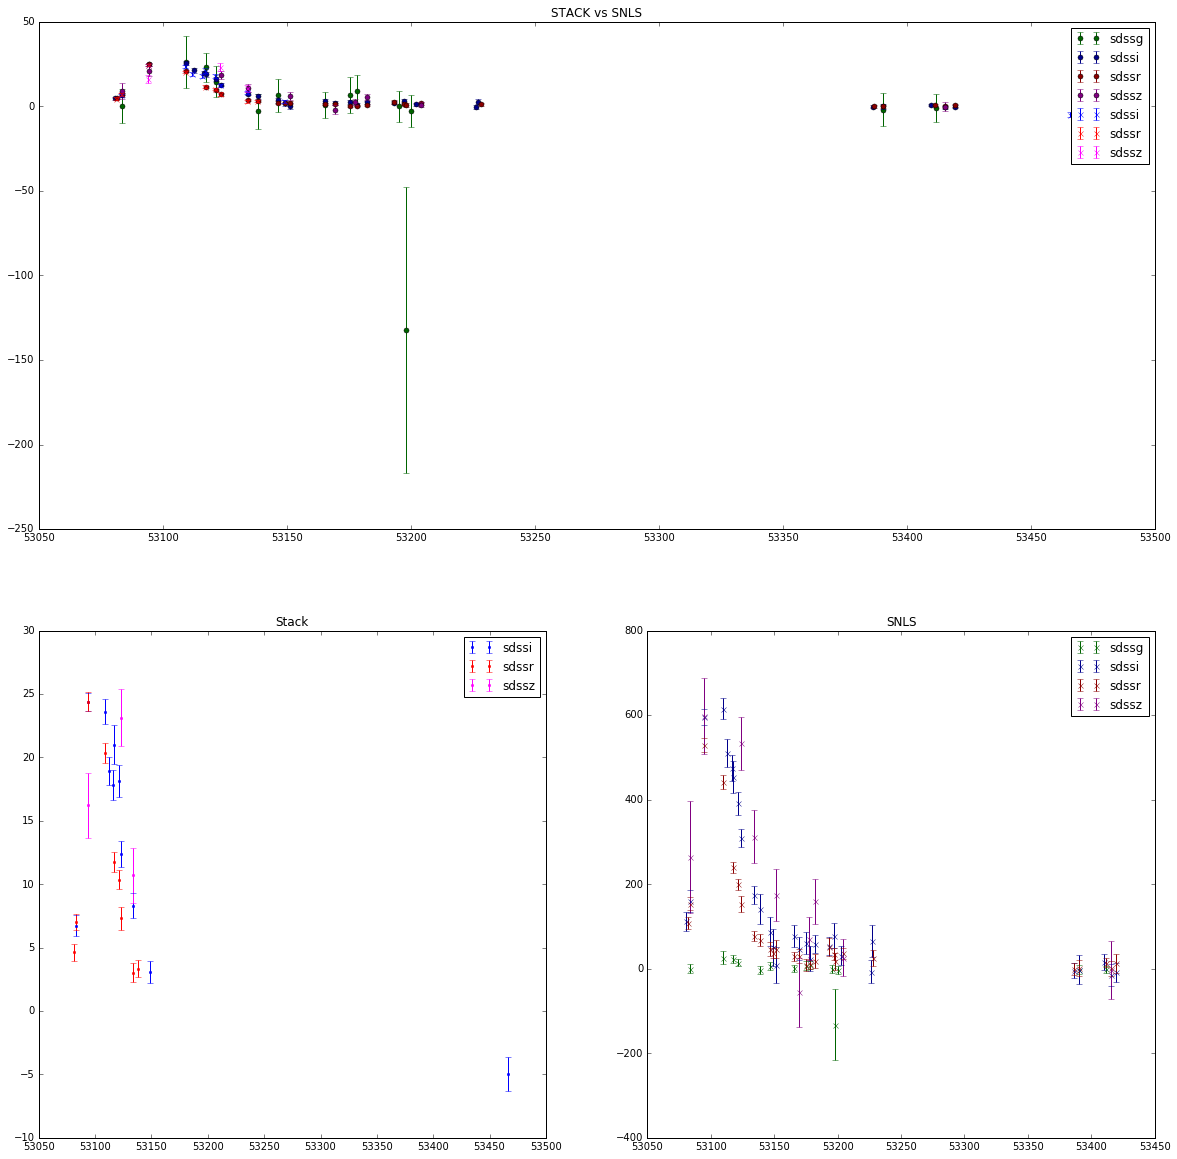

============New LC================
match
05D3hq
{'sdssi': 0.040443877894633488, 'sdssr': 0.047917284201797659, 'sdssz': 0.14417368552099602, 'sdssg': 0.057308706692498504}
40


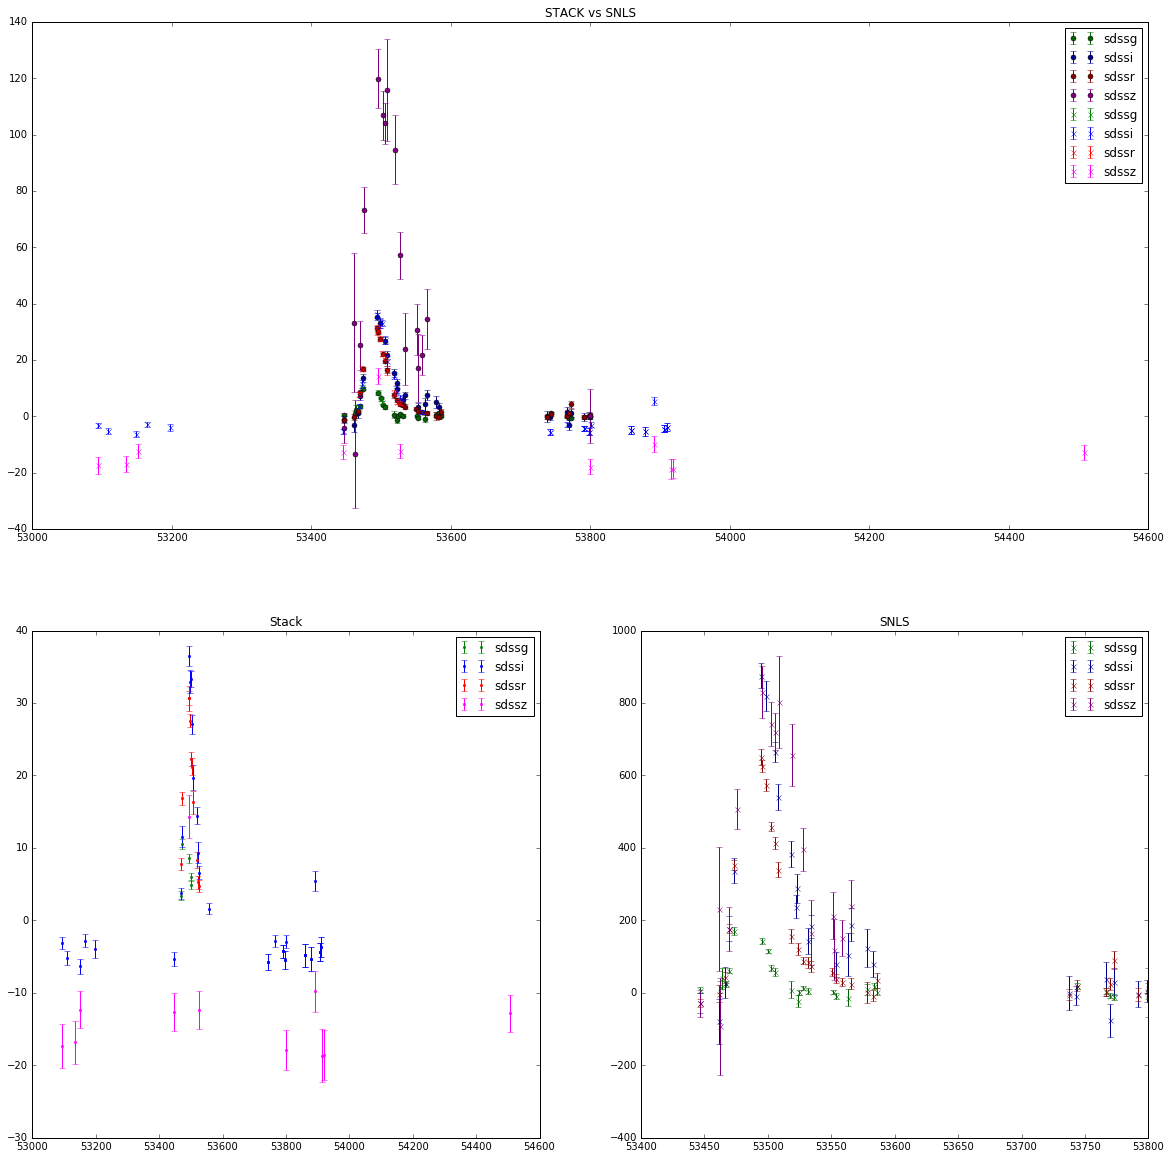

============New LC================
match
05D3gy
{'sdssi': 0.038142686821381611, 'sdssr': 0.048465859558591035, 'sdssz': 0.11263844603906938, 'sdssg': nan}
41


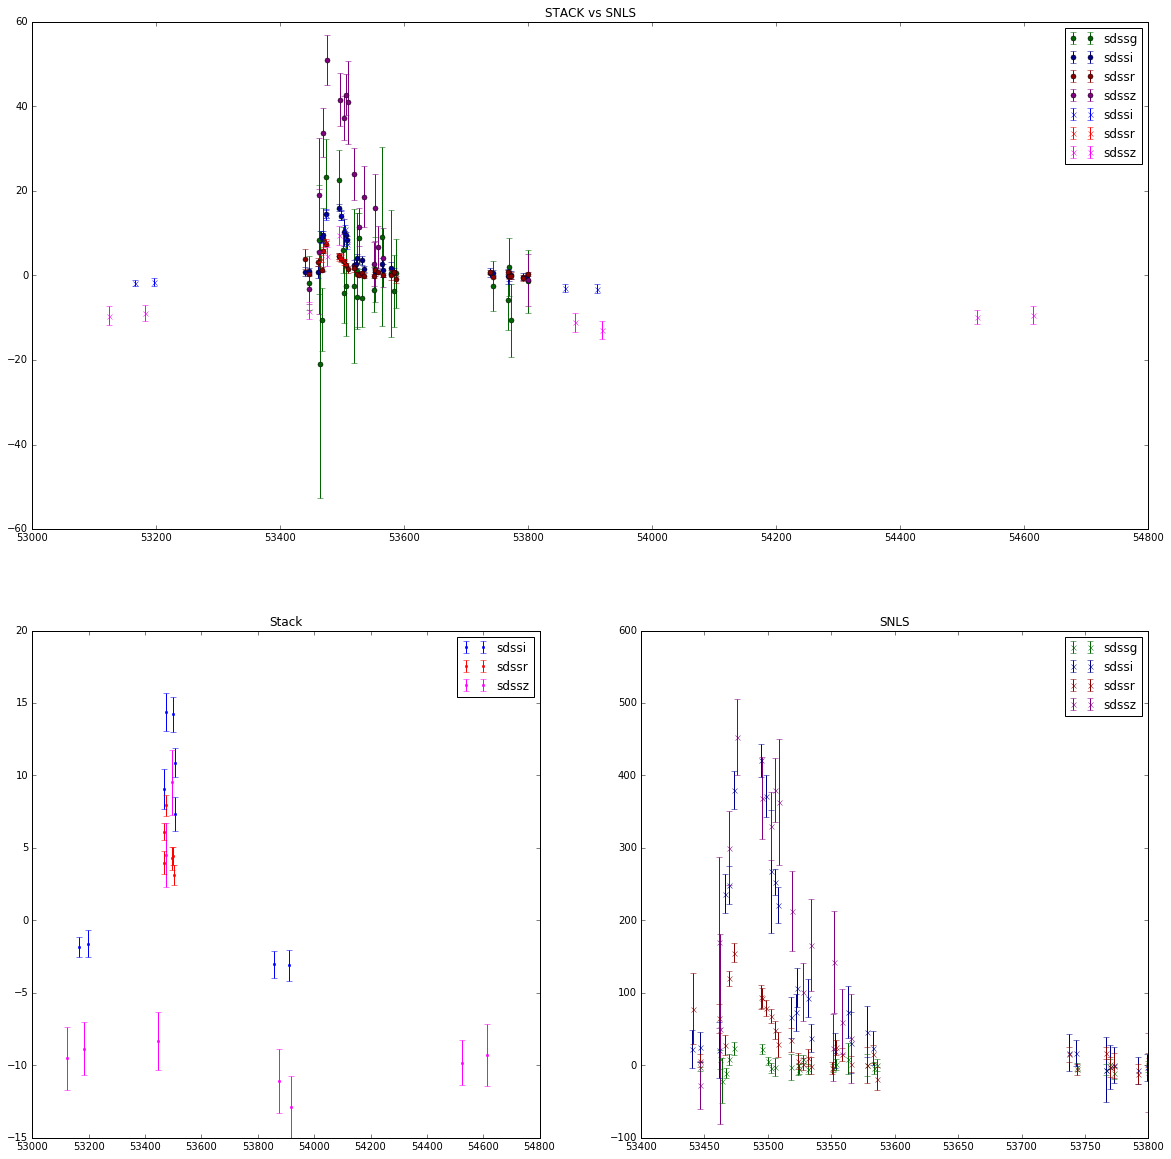

============New LC================
match
04D3hn
{'sdssi': 0.041828092341804339, 'sdssr': 0.051275269875679617, 'sdssz': nan, 'sdssg': 0.059936093457310456}
42


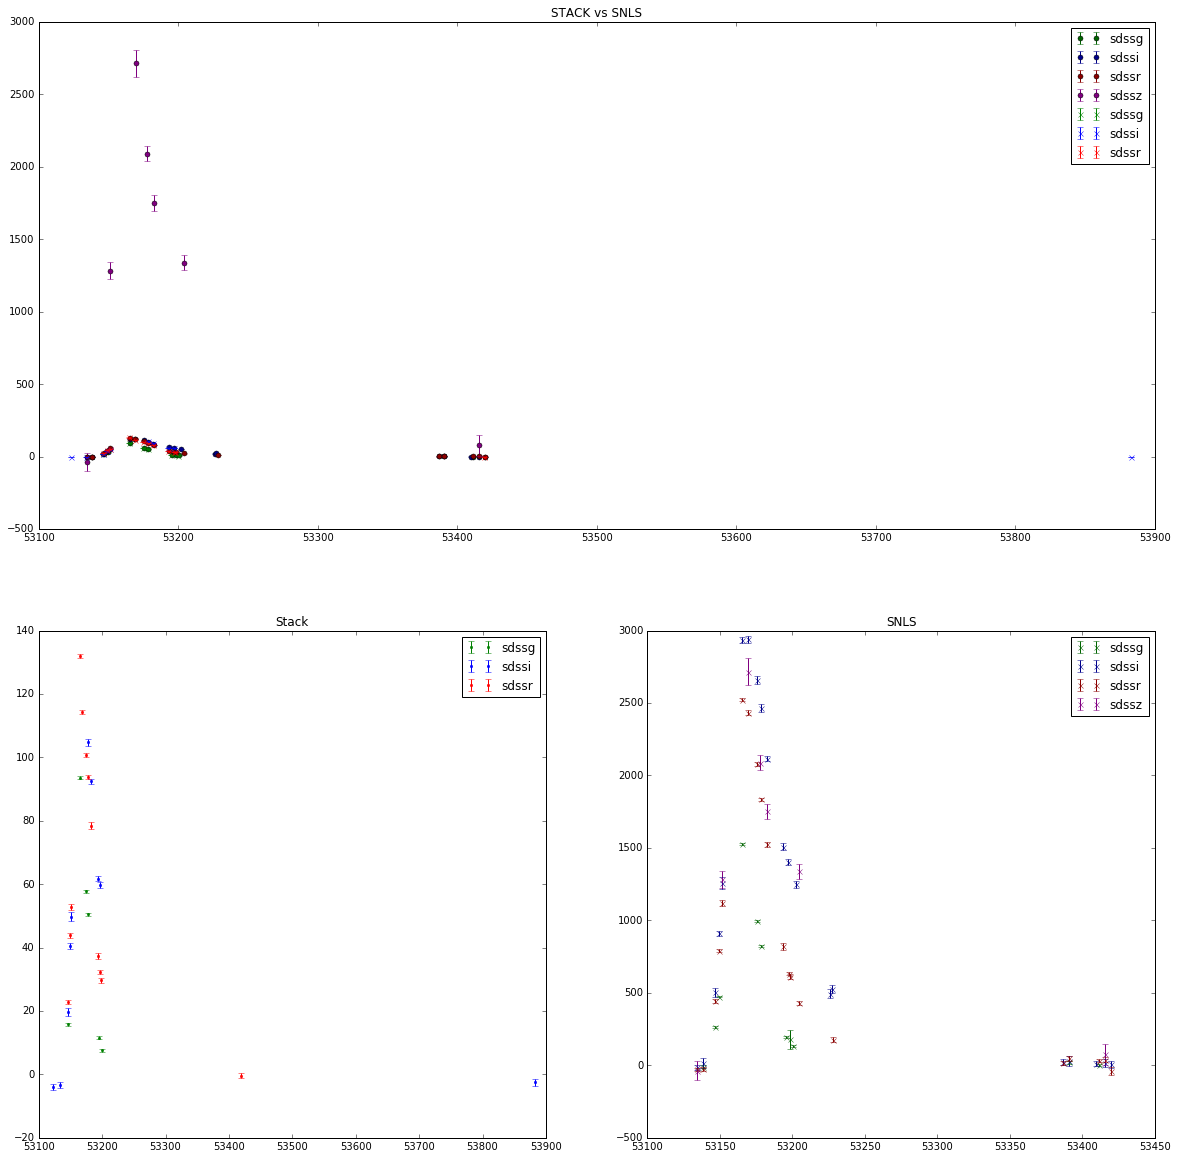

============New LC================
match
04D3cy
{'sdssi': 0.038905115182443738, 'sdssr': 0.057612265367183724, 'sdssz': nan, 'sdssg': nan}
43


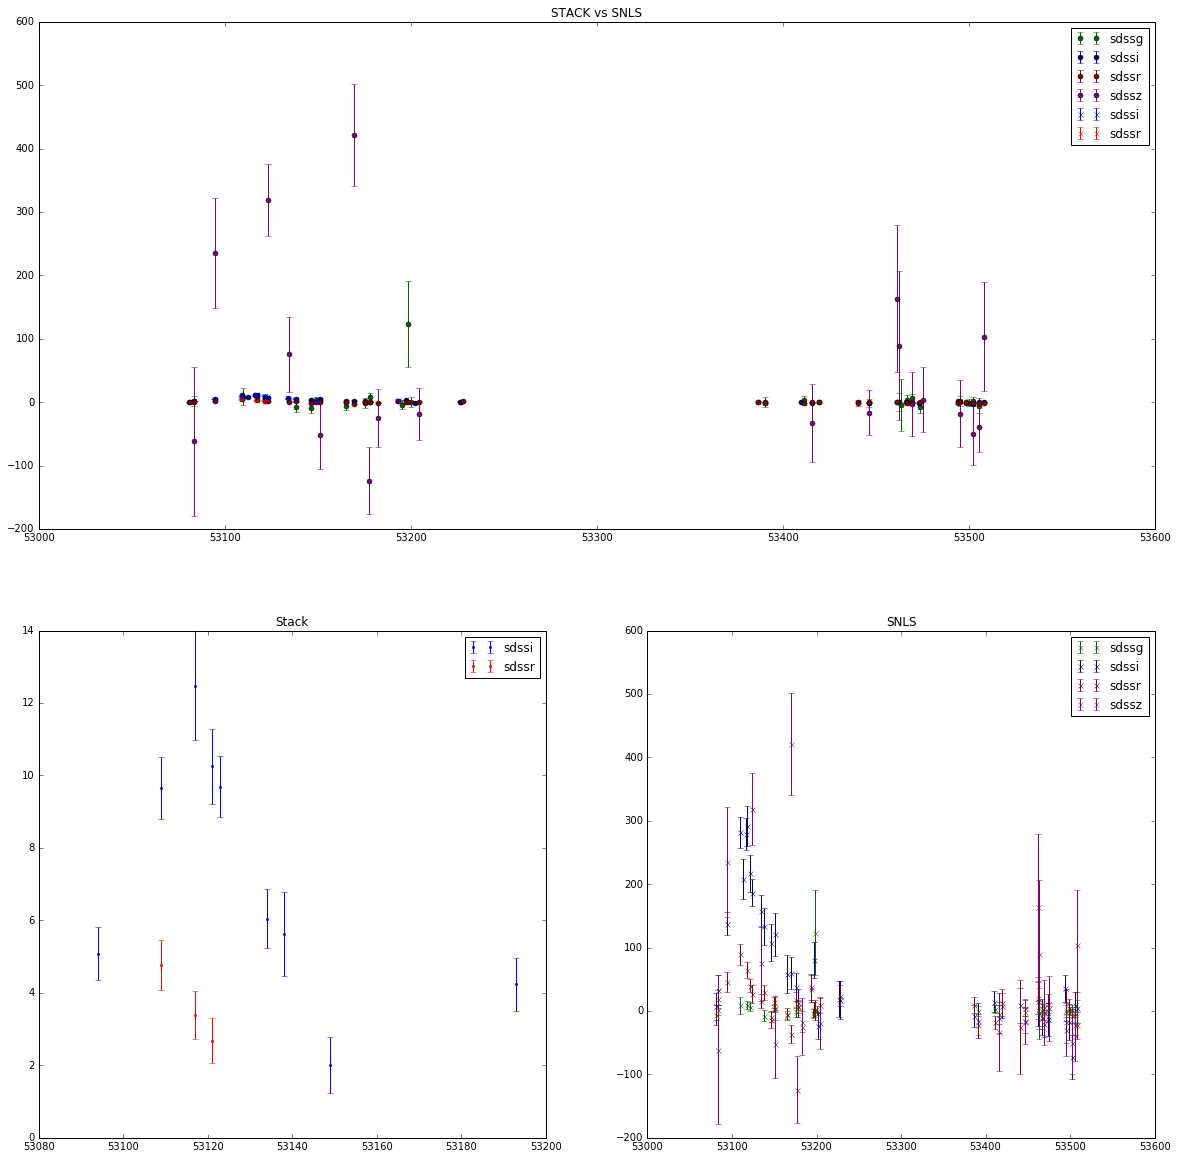

============New LC================
match
04D3do
{'sdssi': 0.040416119402489514, 'sdssr': 0.051497713331872121, 'sdssz': nan, 'sdssg': 0.060729717119027256}
44


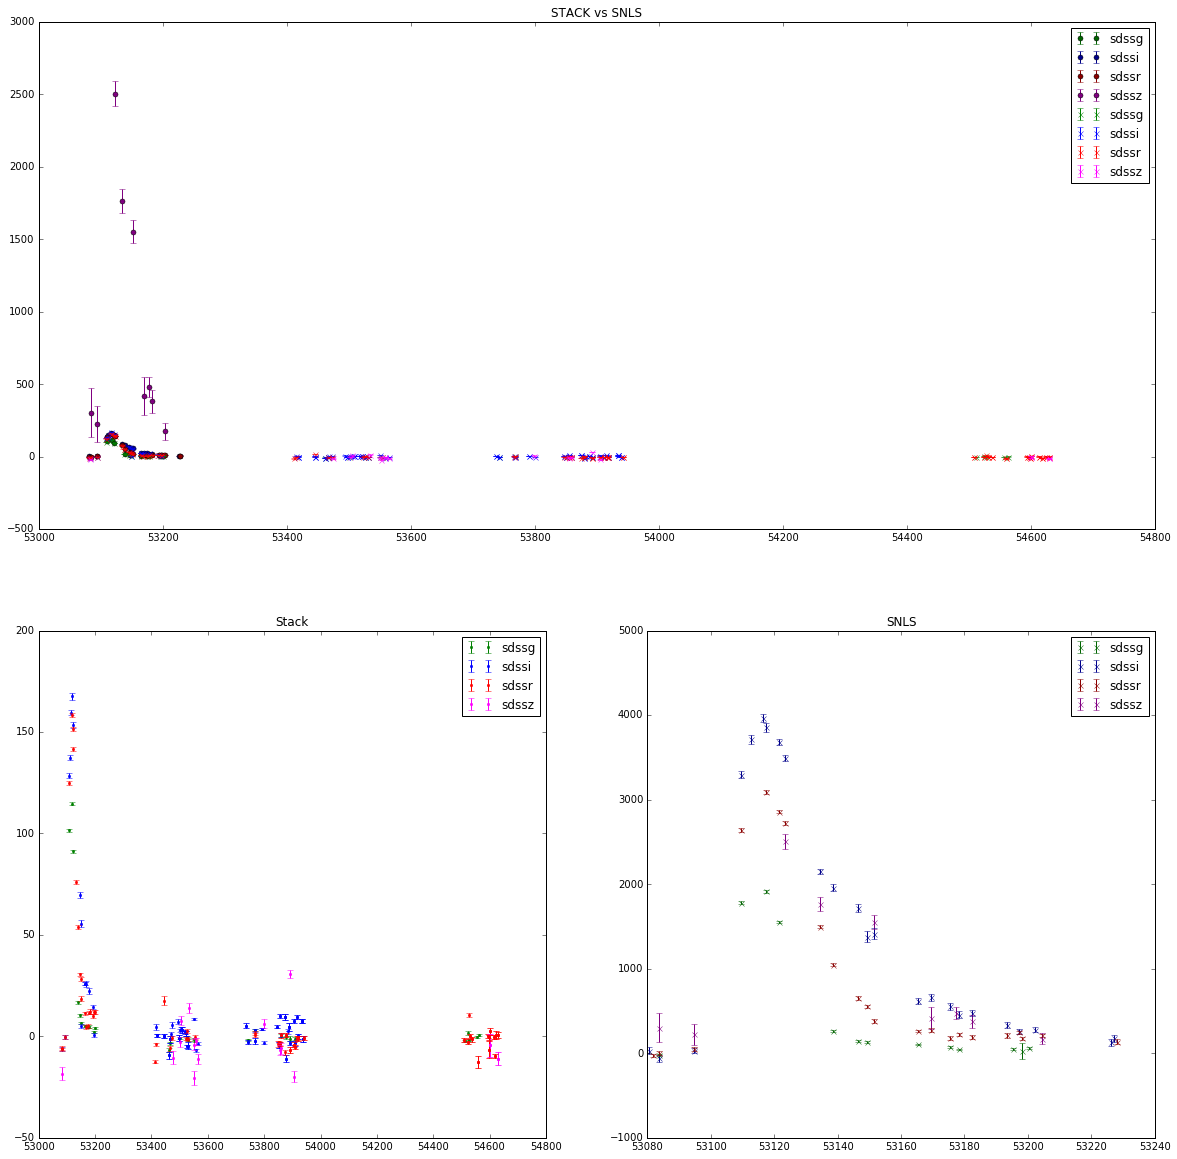

============New LC================
match
06D3bz
{'sdssi': 0.082343168866484212, 'sdssr': 0.046635765460627109, 'sdssz': nan, 'sdssg': nan}
45


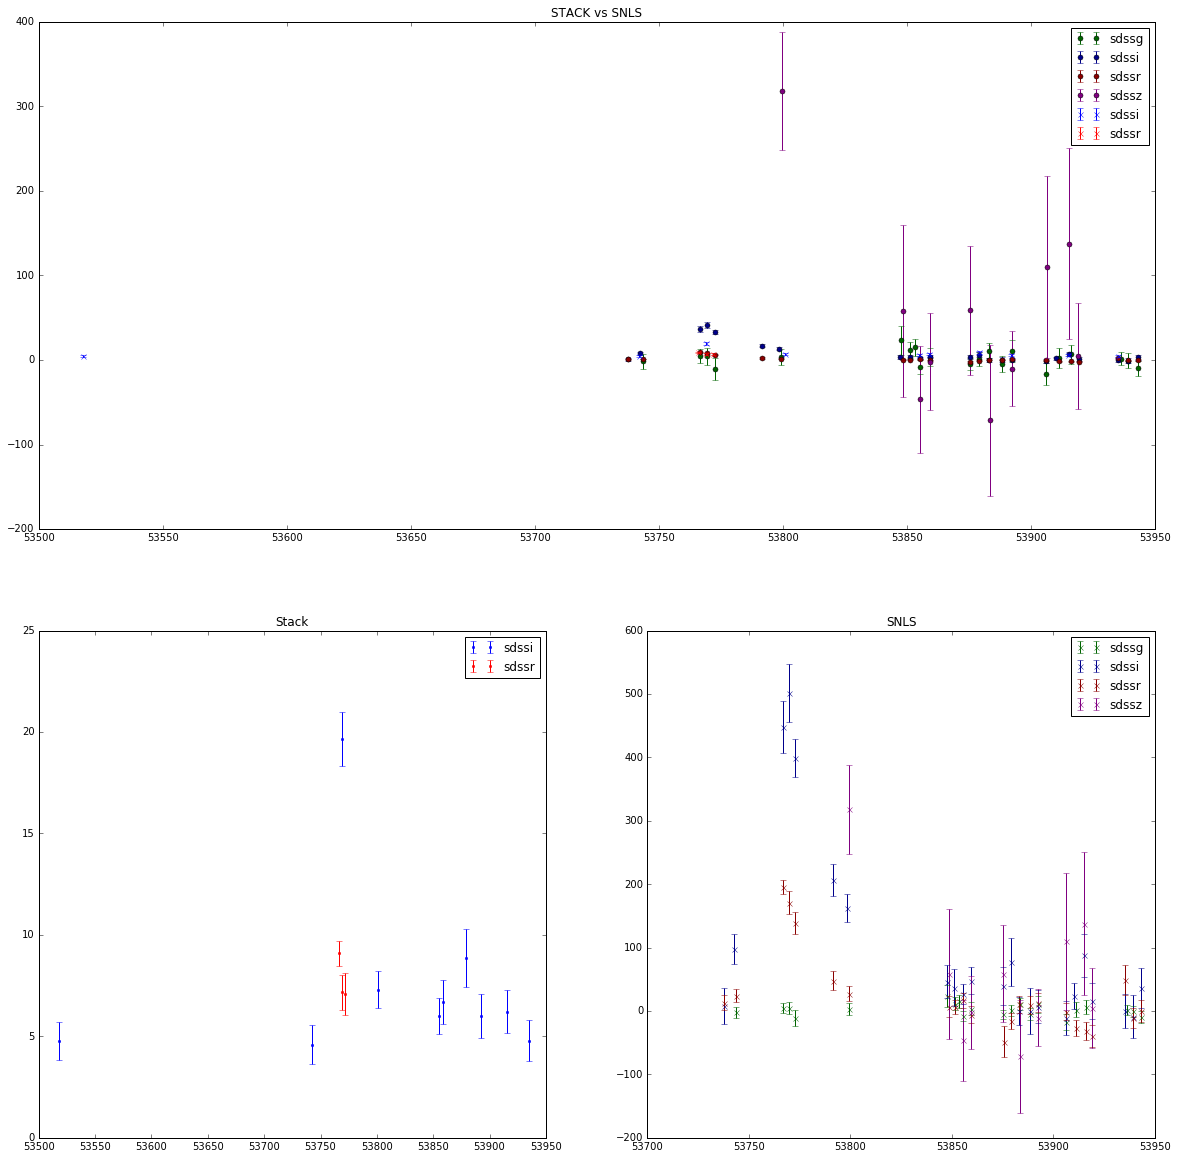

============New LC================
match
05D3hh
{'sdssi': 0.034904844368530433, 'sdssr': 0.049408781666875387, 'sdssz': 0.019135830898760201, 'sdssg': 0.059684333904778099}
46


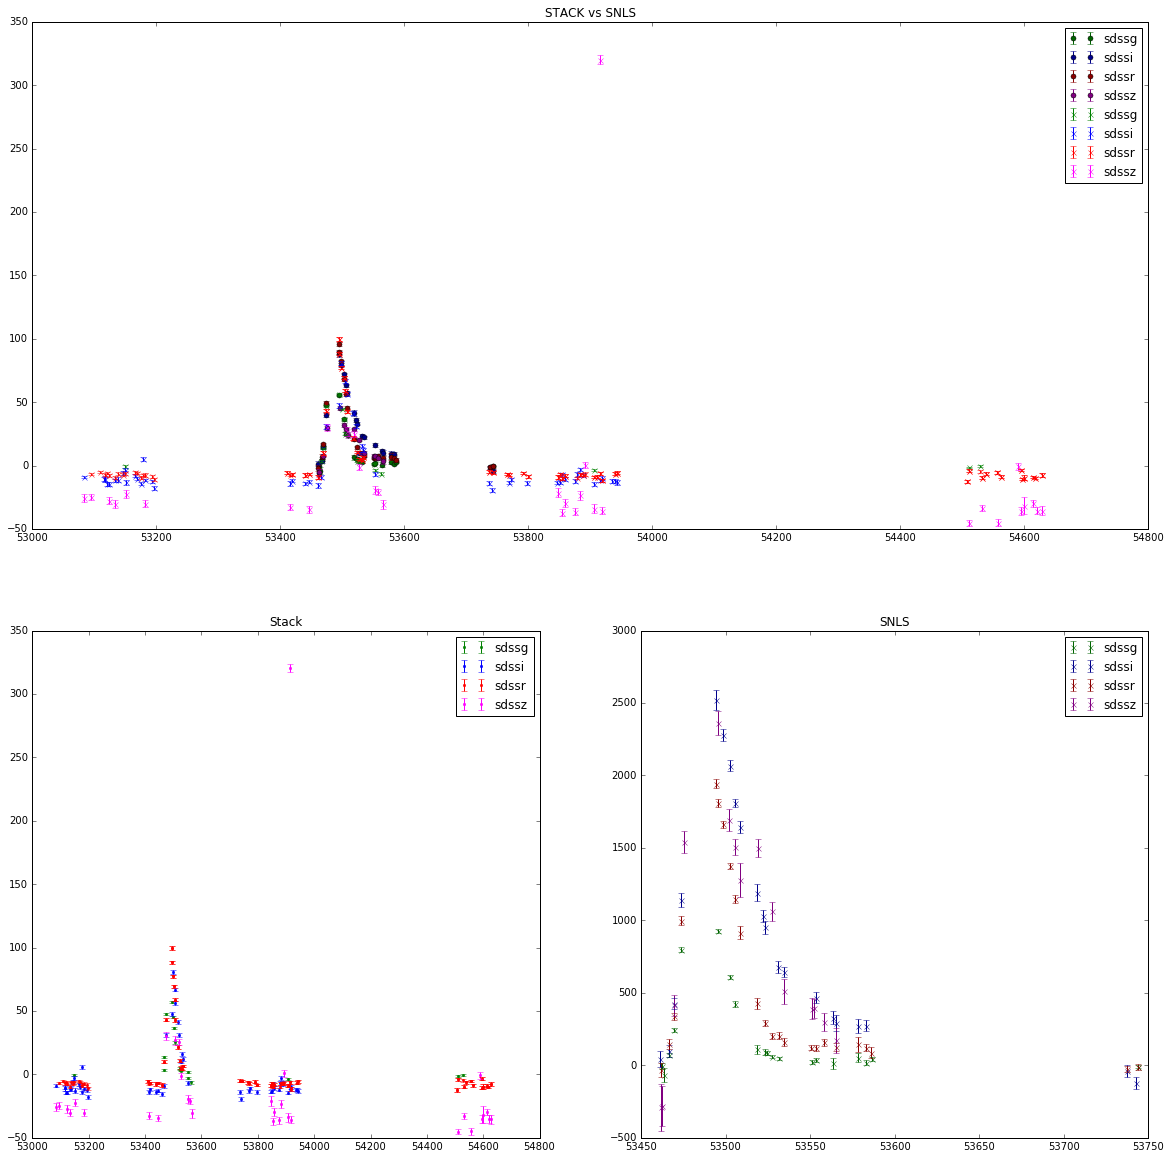

============New LC================
match
05D3jk
{'sdssi': 0.034337637104665565, 'sdssr': 0.045937553205401209, 'sdssz': 0.029056872175348258, 'sdssg': 0.062946320310759668}
47


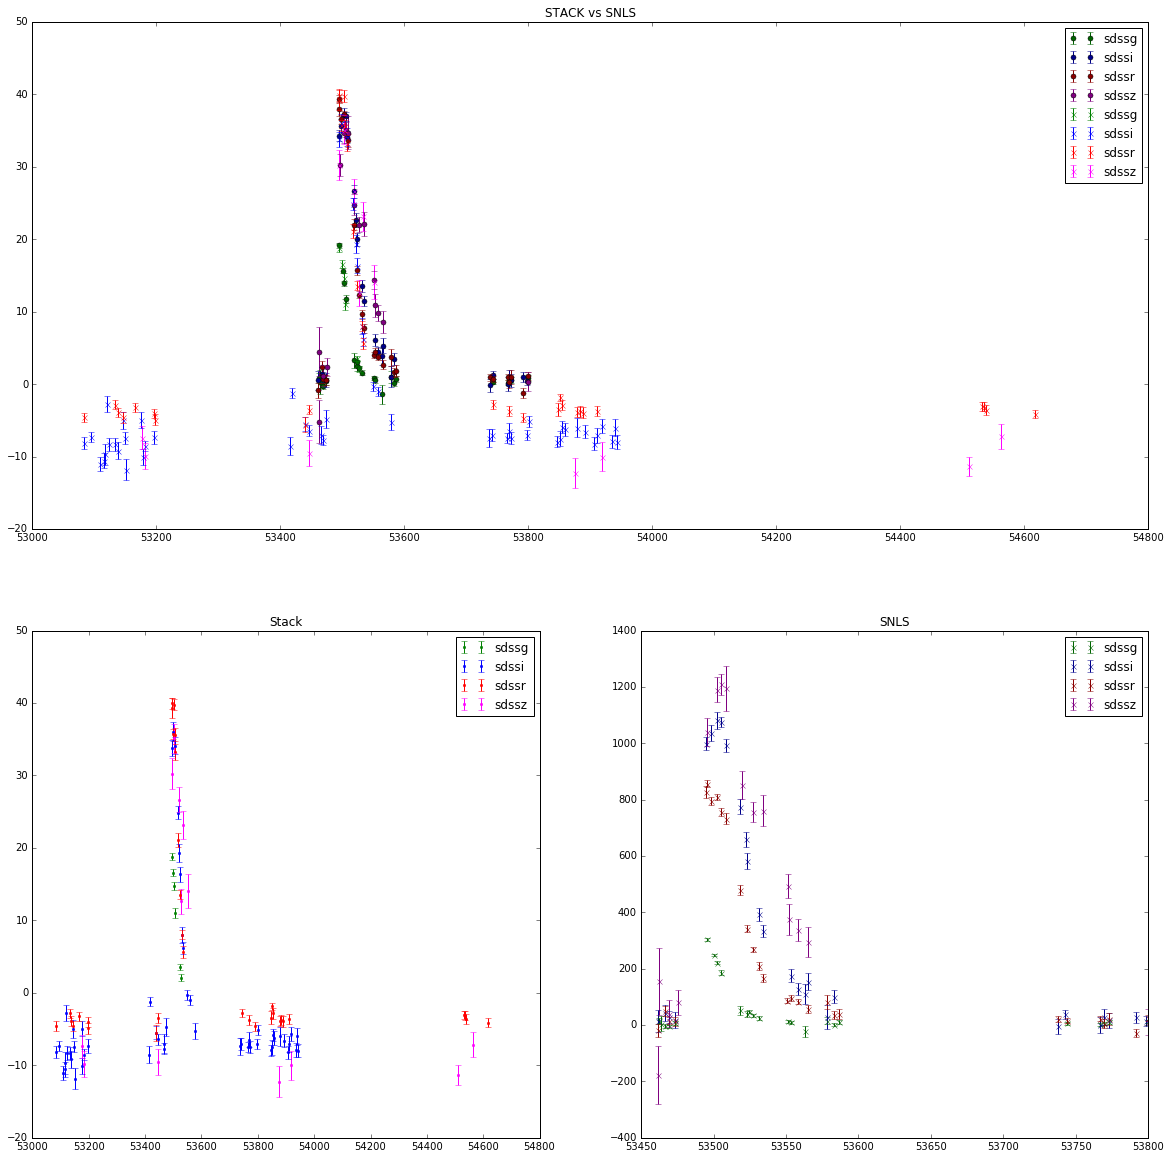

============New LC================
match
06D3et
{'sdssi': 0.039231313543271168, 'sdssr': 0.051045791741456188, 'sdssz': 0.038856804754201925, 'sdssg': 0.064319439209835003}
48


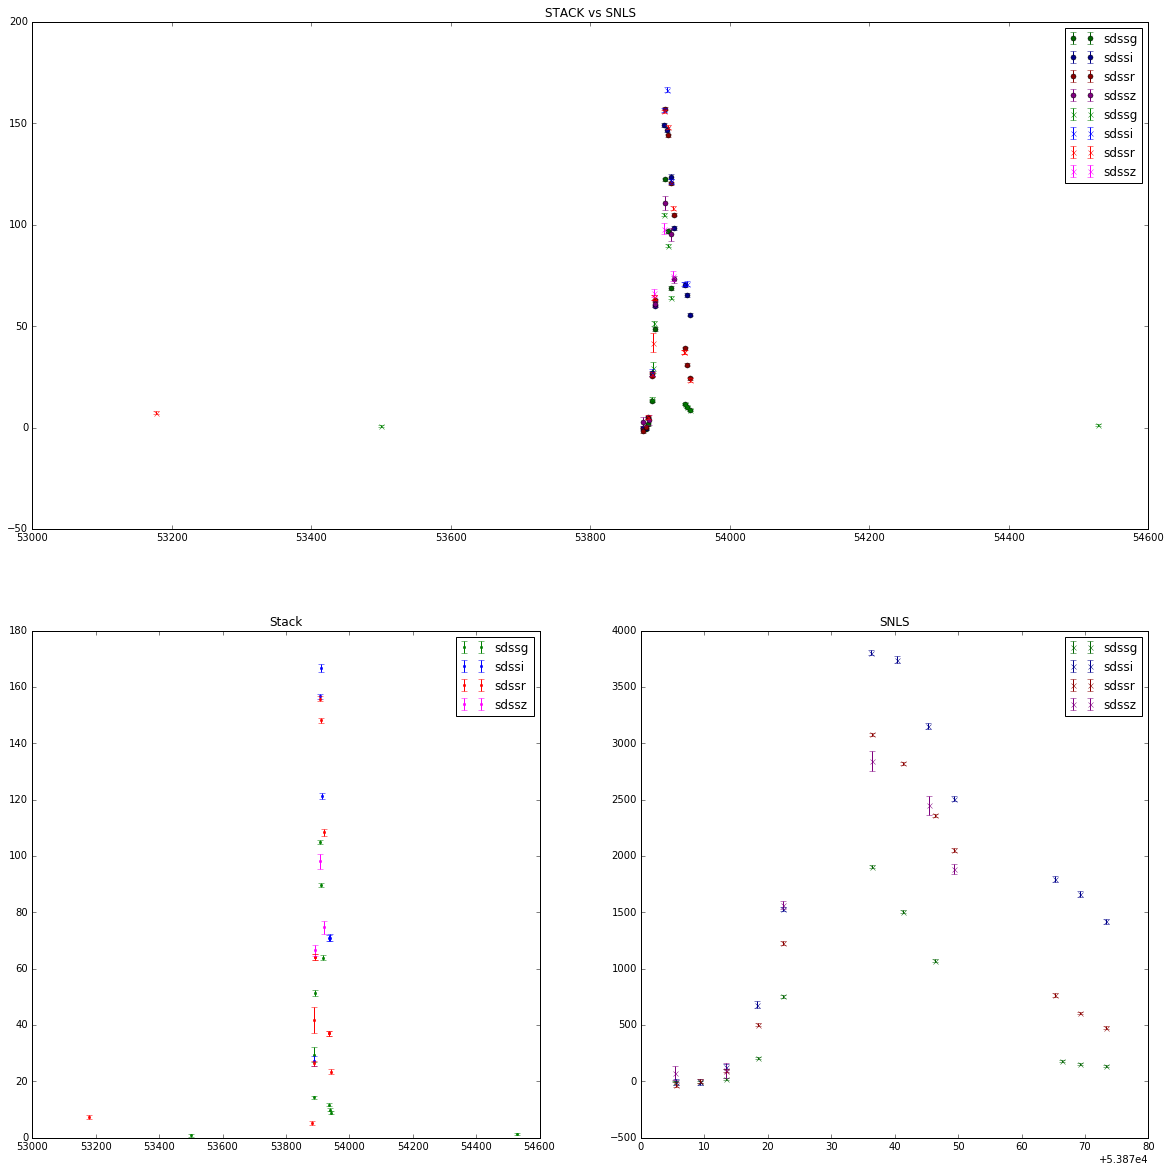

============New LC================
match
05D3ht
{'sdssi': 0.031732800656459177, 'sdssr': 0.044180987812632043, 'sdssz': 0.036767143138221305, 'sdssg': 0.059108938272889301}
49


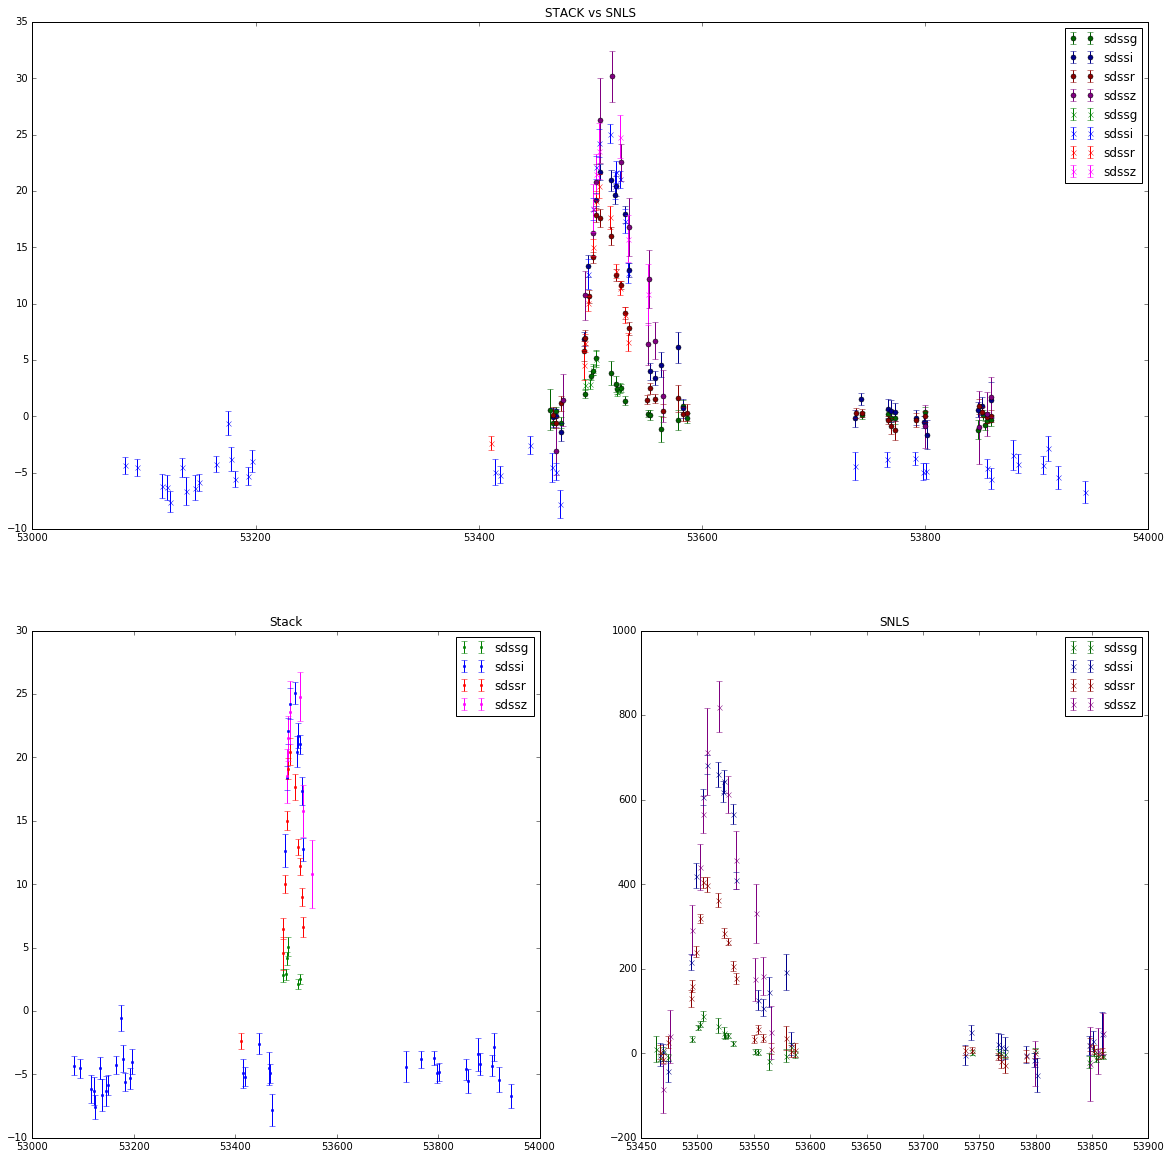

============New LC================
match
05D3gv
{'sdssi': 0.033204390552346821, 'sdssr': 0.043981227076376118, 'sdssz': -0.28261436460111294, 'sdssg': nan}
50


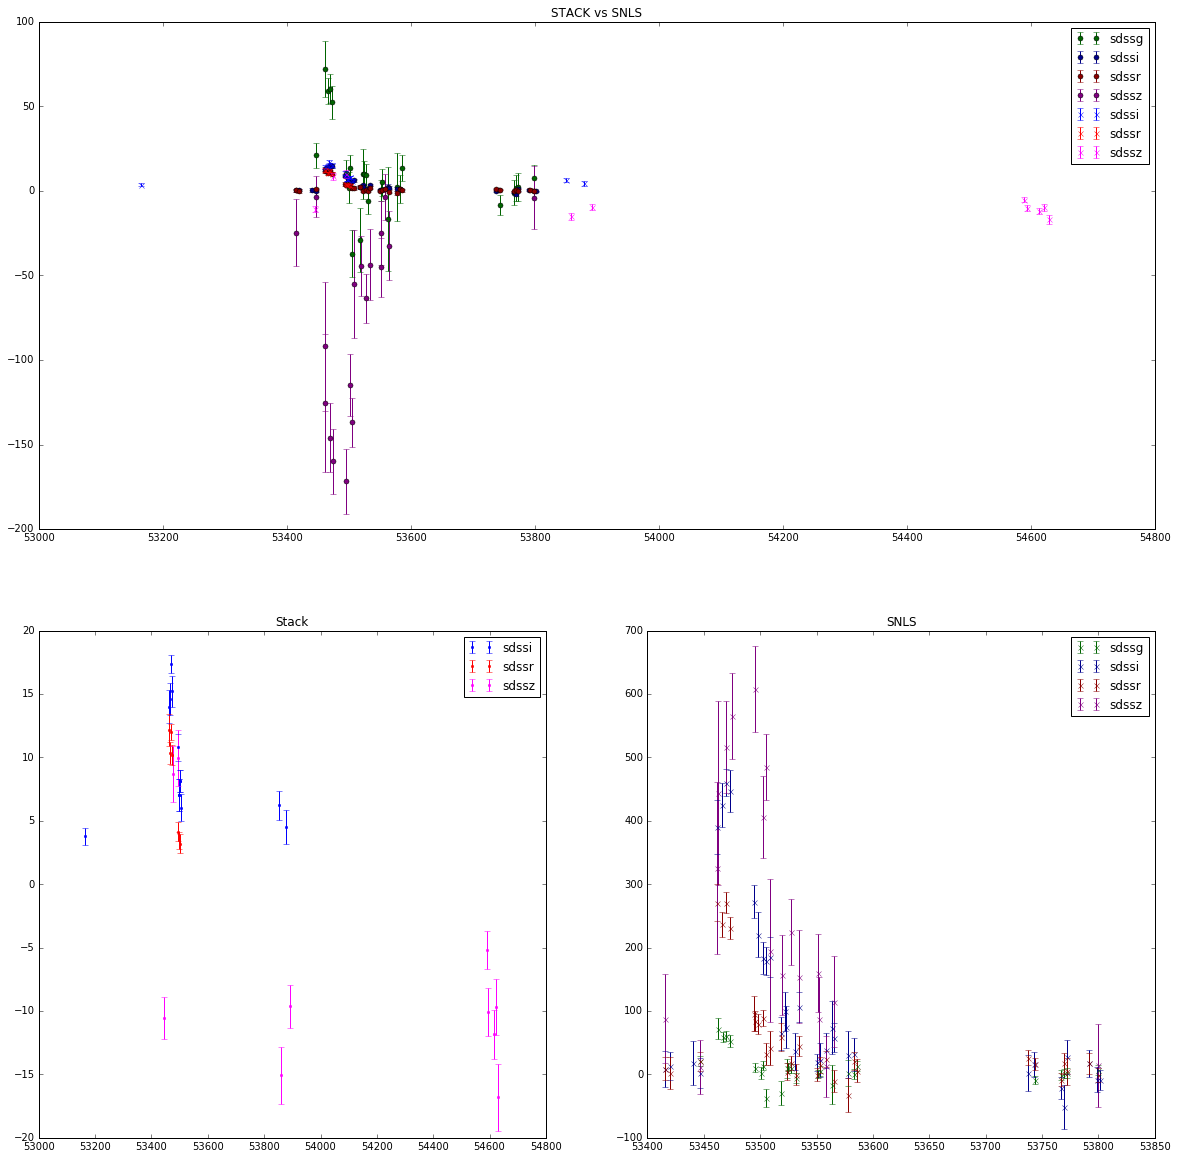

============New LC================
match
04D3ml
{'sdssi': 0.04601096827936204, 'sdssr': 0.049829366450545545, 'sdssz': nan, 'sdssg': nan}
51


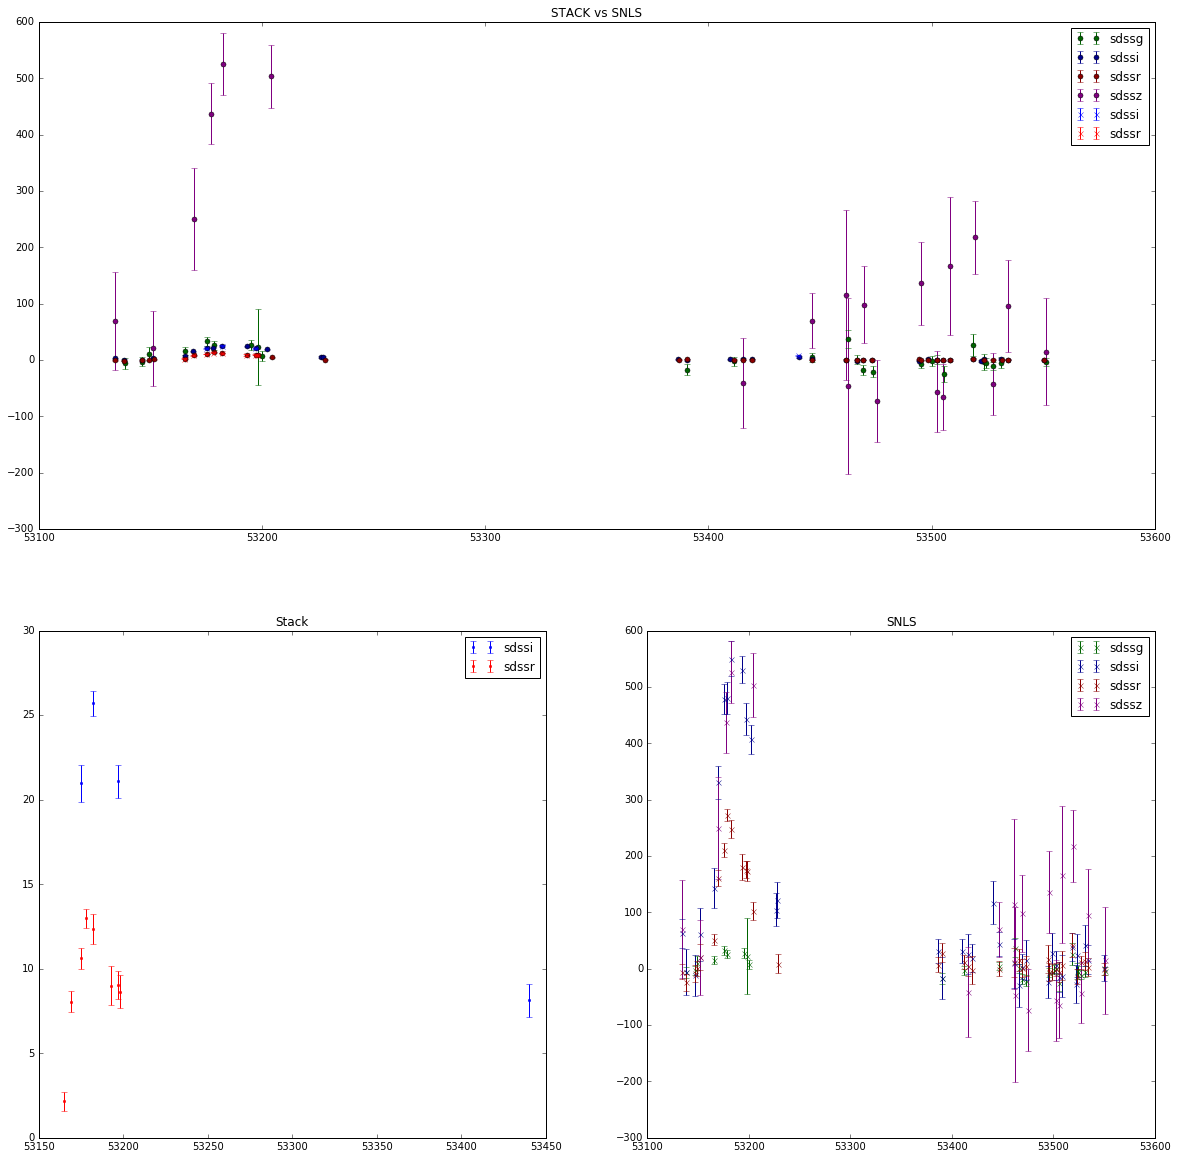

============New LC================
match
06D3cn
{'sdssi': nan, 'sdssr': 0.041437587507896861, 'sdssz': nan, 'sdssg': nan}
52


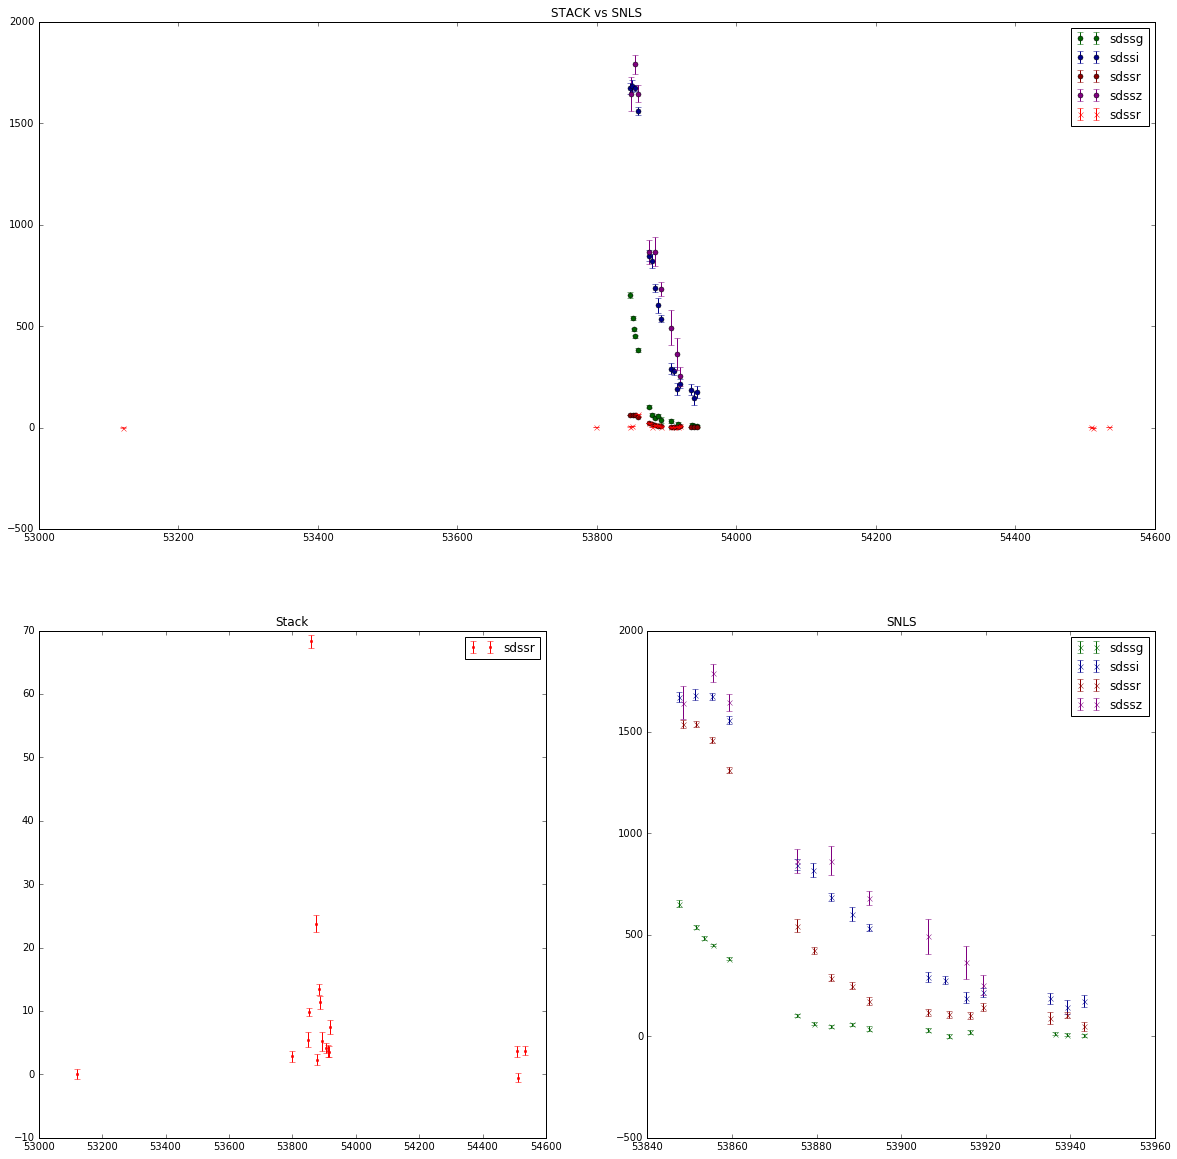

============New LC================
52


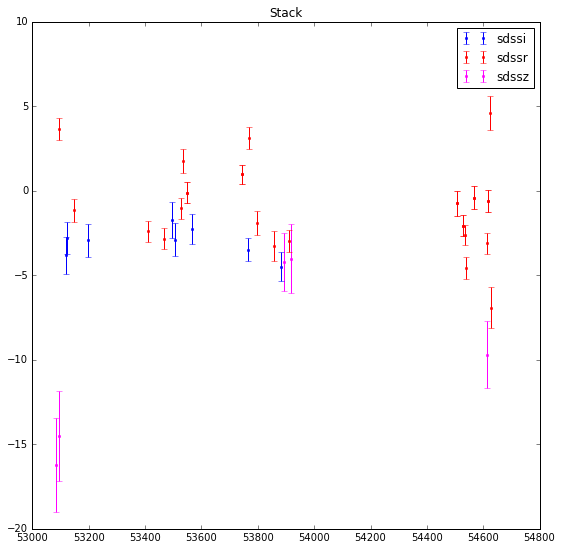

============New LC================
match
04D3ez
{'sdssi': 0.042429838859526135, 'sdssr': 0.048924459261854417, 'sdssz': nan, 'sdssg': 0.064475640889577426}
53


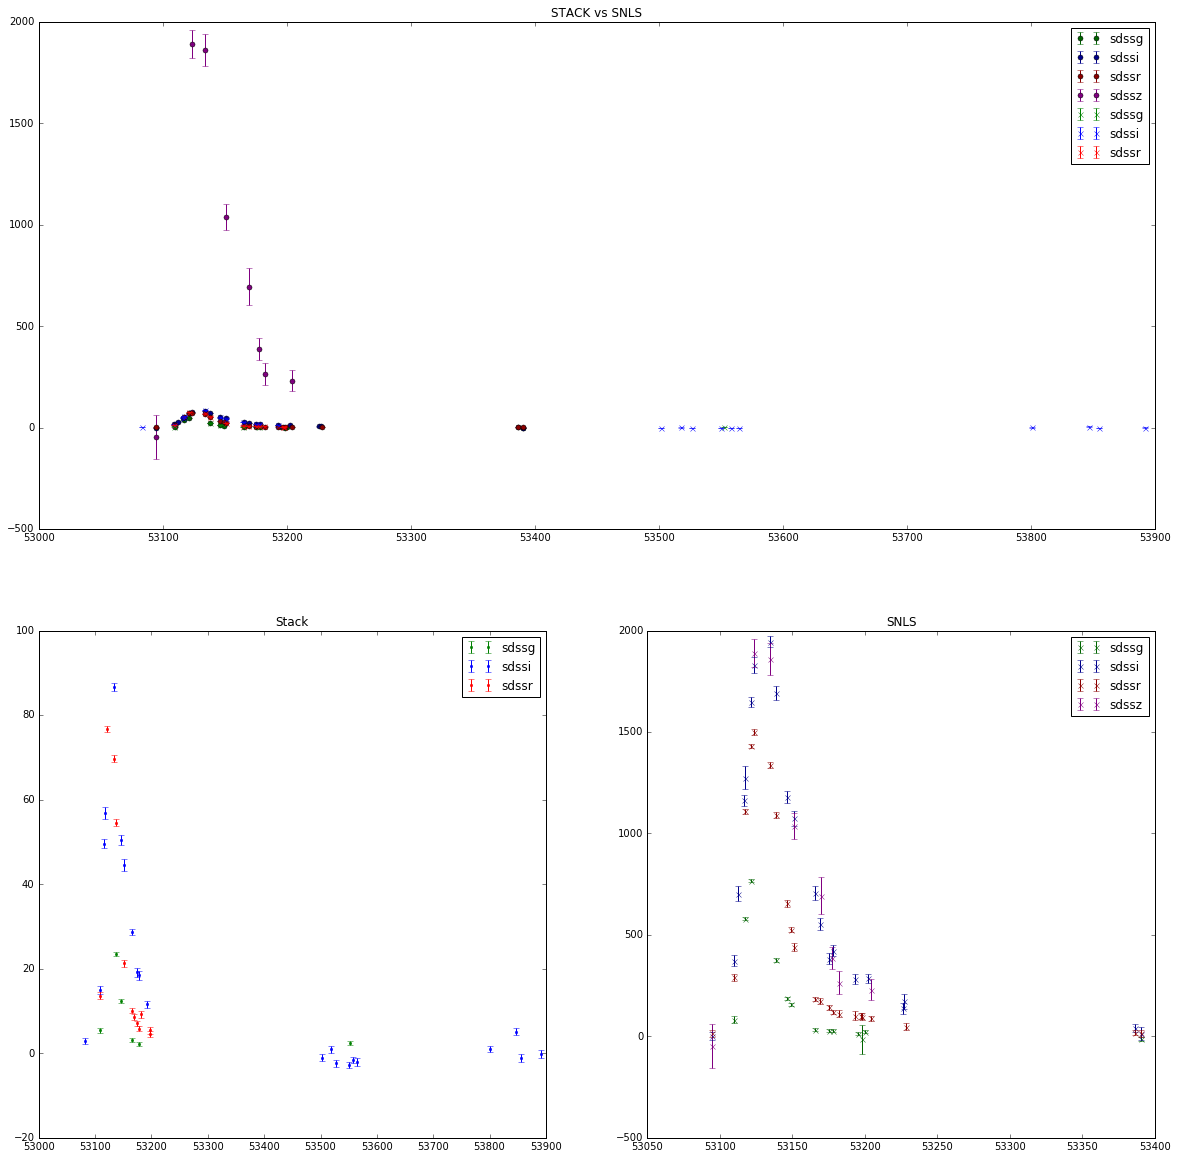

============New LC================
match
06D3fp
{'sdssi': 0.040211804488987278, 'sdssr': 0.049260657212376838, 'sdssz': -0.029387539604059314, 'sdssg': nan}
54


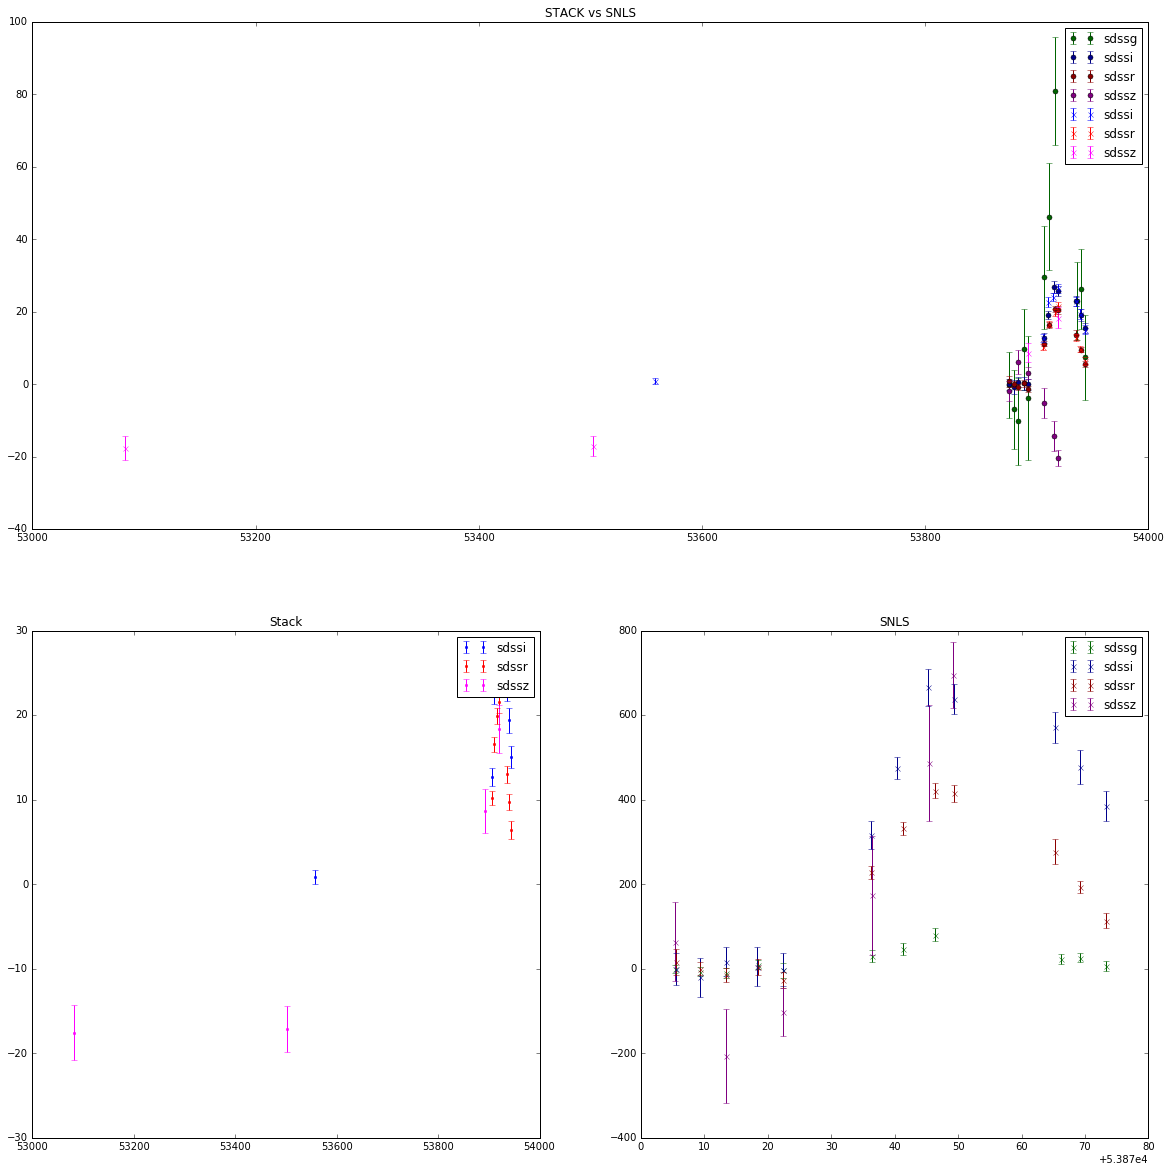

============New LC================
match
06D3dl
{'sdssi': 0.035512726915051057, 'sdssr': 0.048349697553476553, 'sdssz': 0.038420147974509634, 'sdssg': 0.063261486594859986}
55


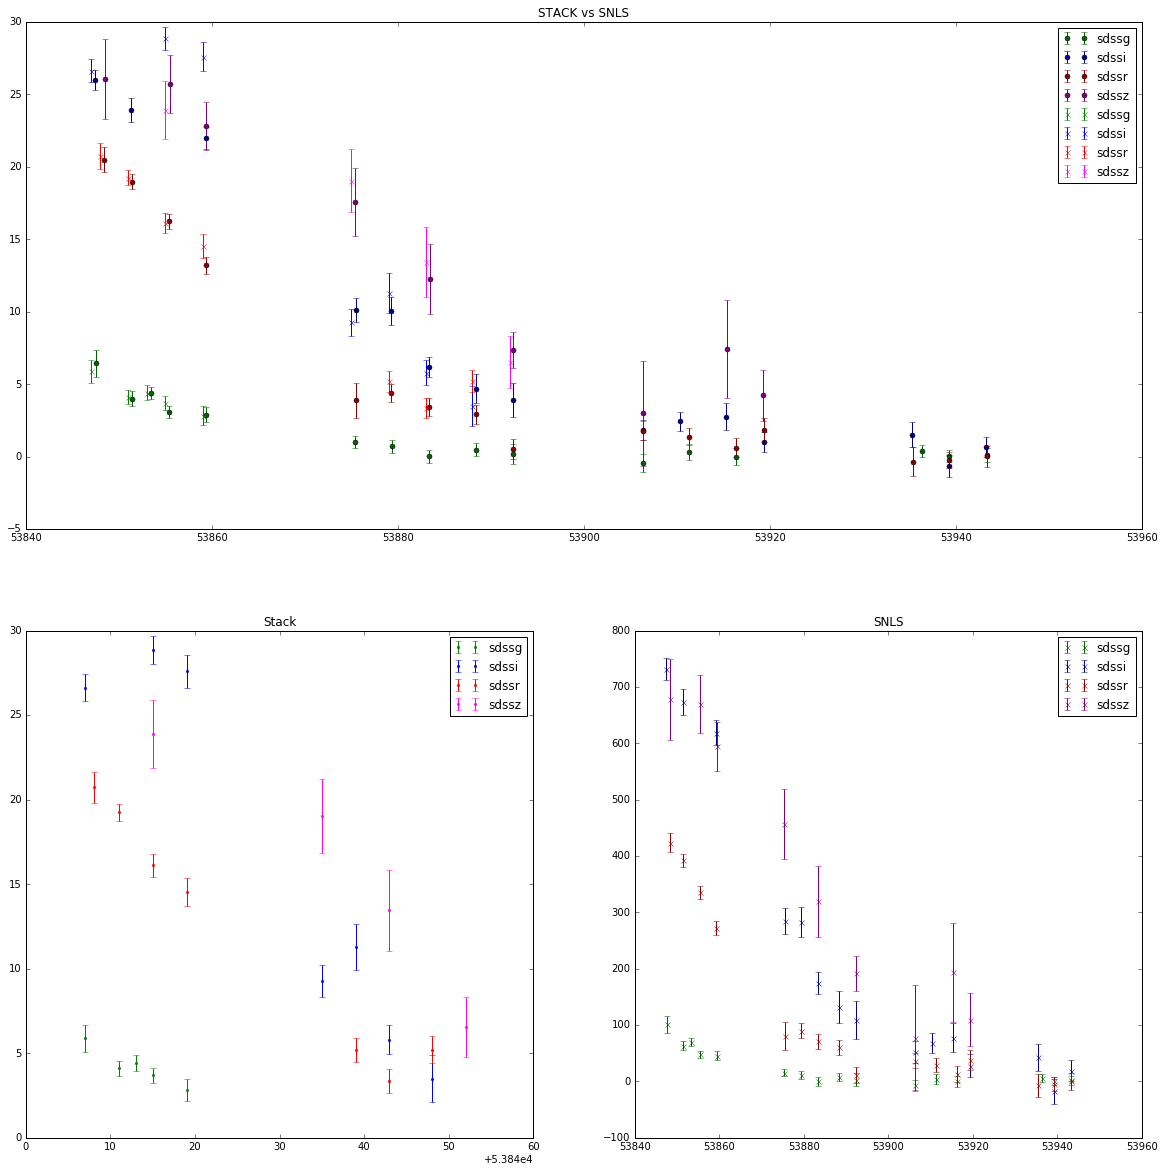

============New LC================
match
04D3co
{'sdssi': 0.0023291842274994461, 'sdssr': 0.047018555716592157, 'sdssz': nan, 'sdssg': nan}
56


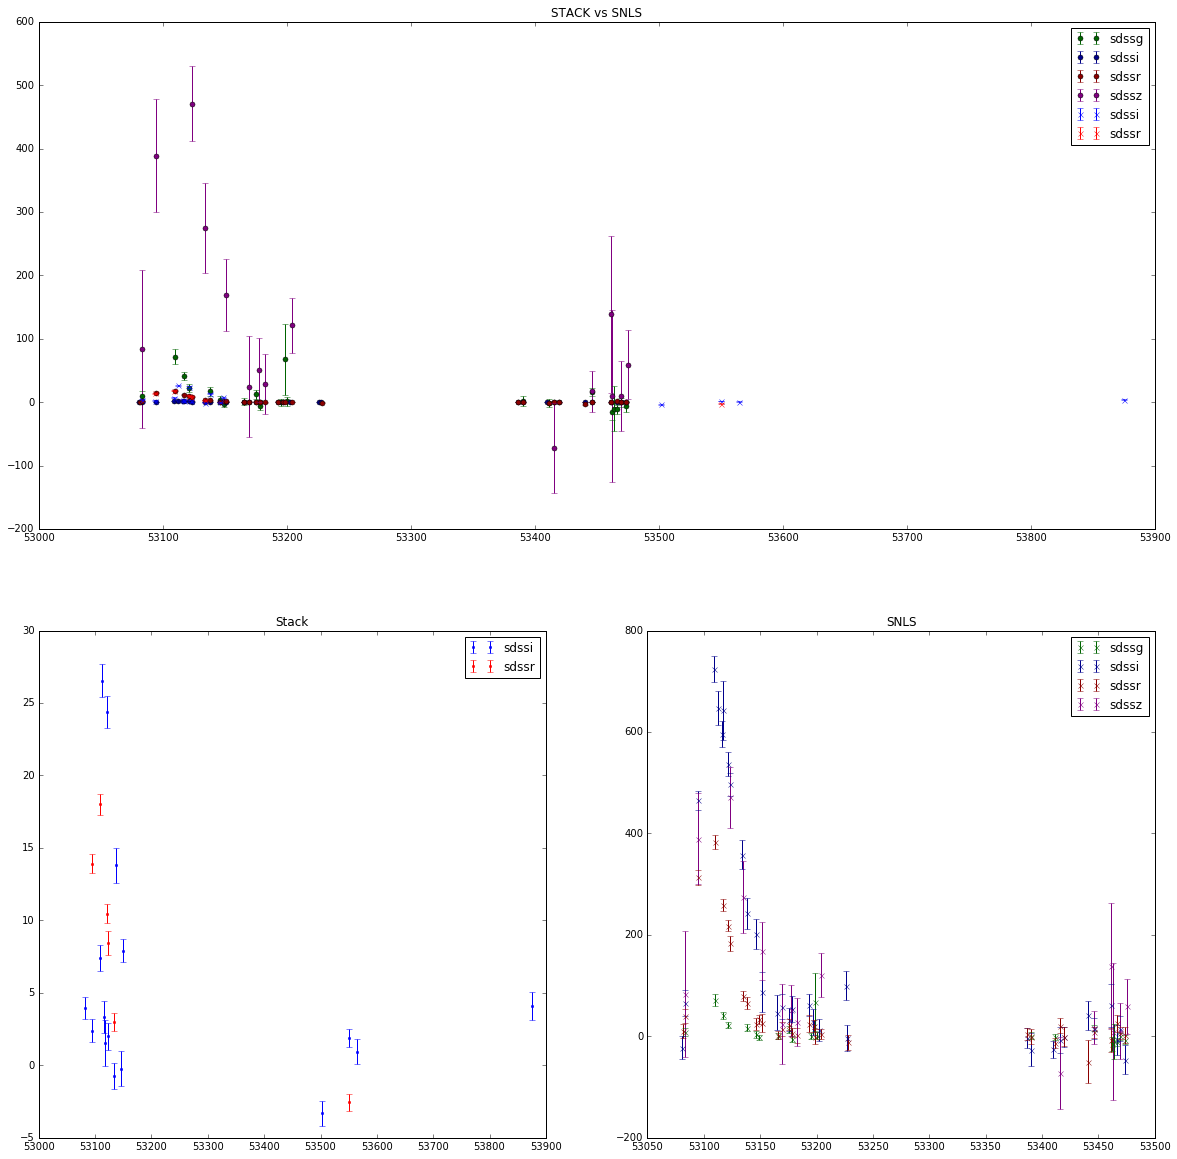

============New LC================
match
05D3kx
{'sdssi': 0.037493683976000232, 'sdssr': 0.045876372921143625, 'sdssz': 0.030328067058183233, 'sdssg': nan}
57


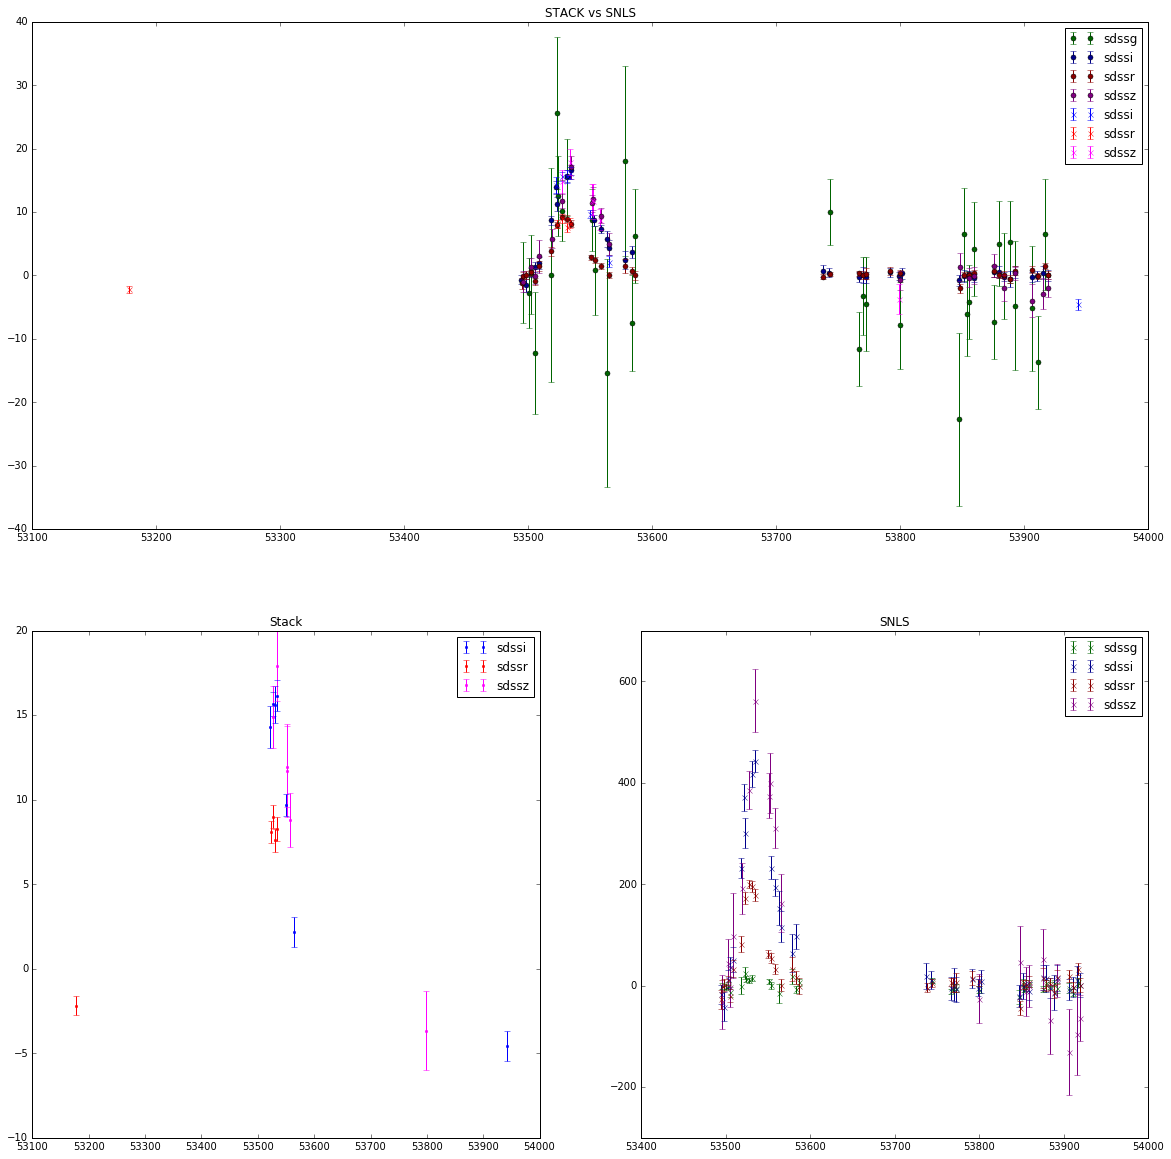

============New LC================
match
04D3lp
{'sdssi': 0.039979643541549328, 'sdssr': 0.053837076643808102, 'sdssz': 0.023245646963273445, 'sdssg': nan}
58


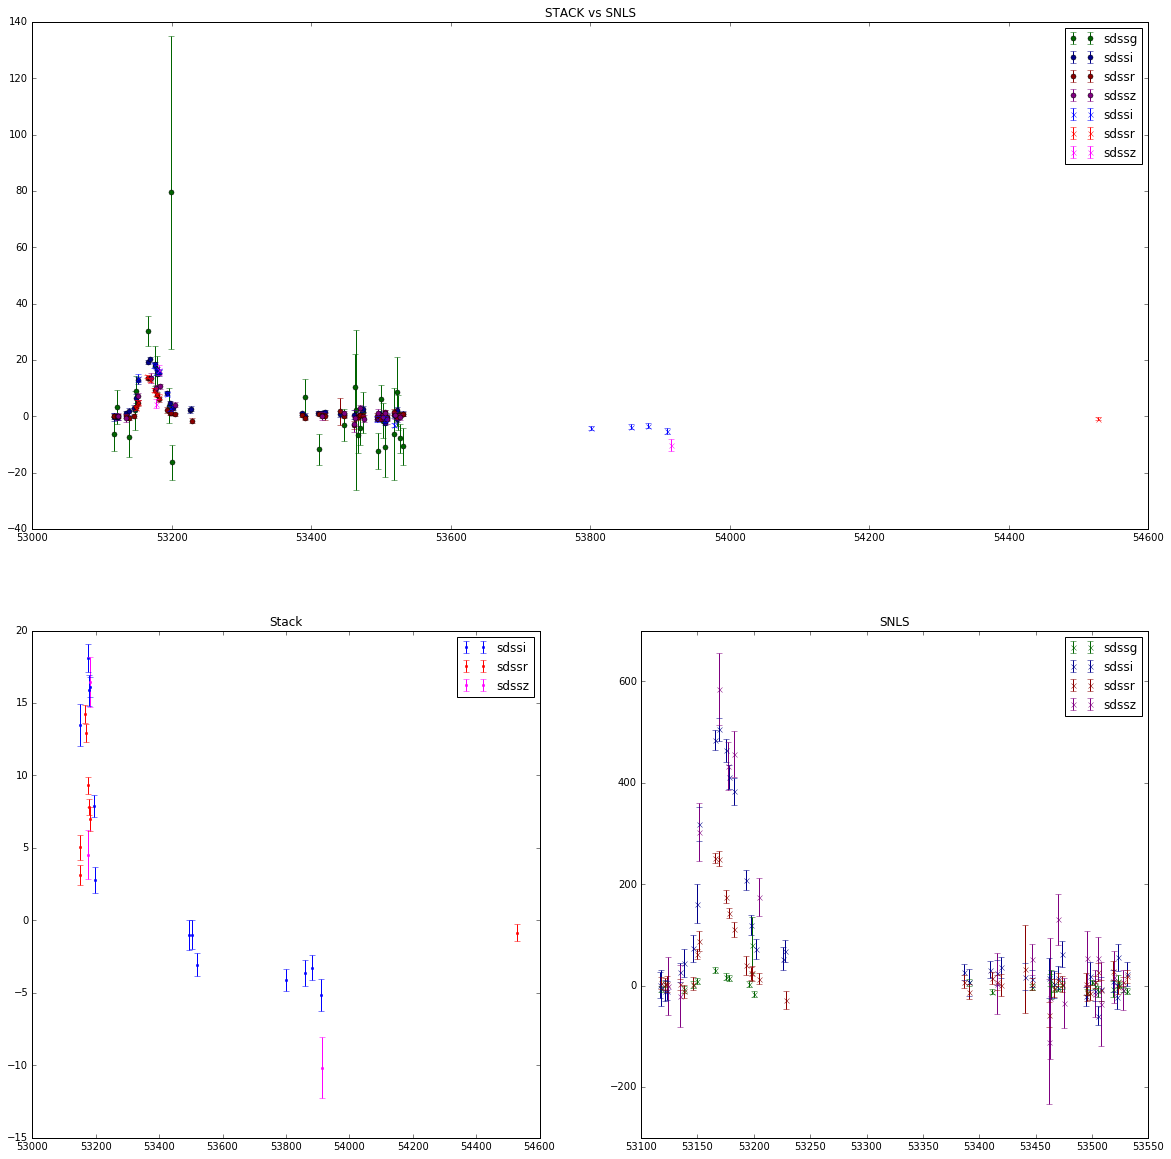

============New LC================
match
06D3df
{'sdssi': 0.044261555250185859, 'sdssr': 0.048524747064843429, 'sdssz': 0.037552130921200889, 'sdssg': 0.056941091433704398}
59


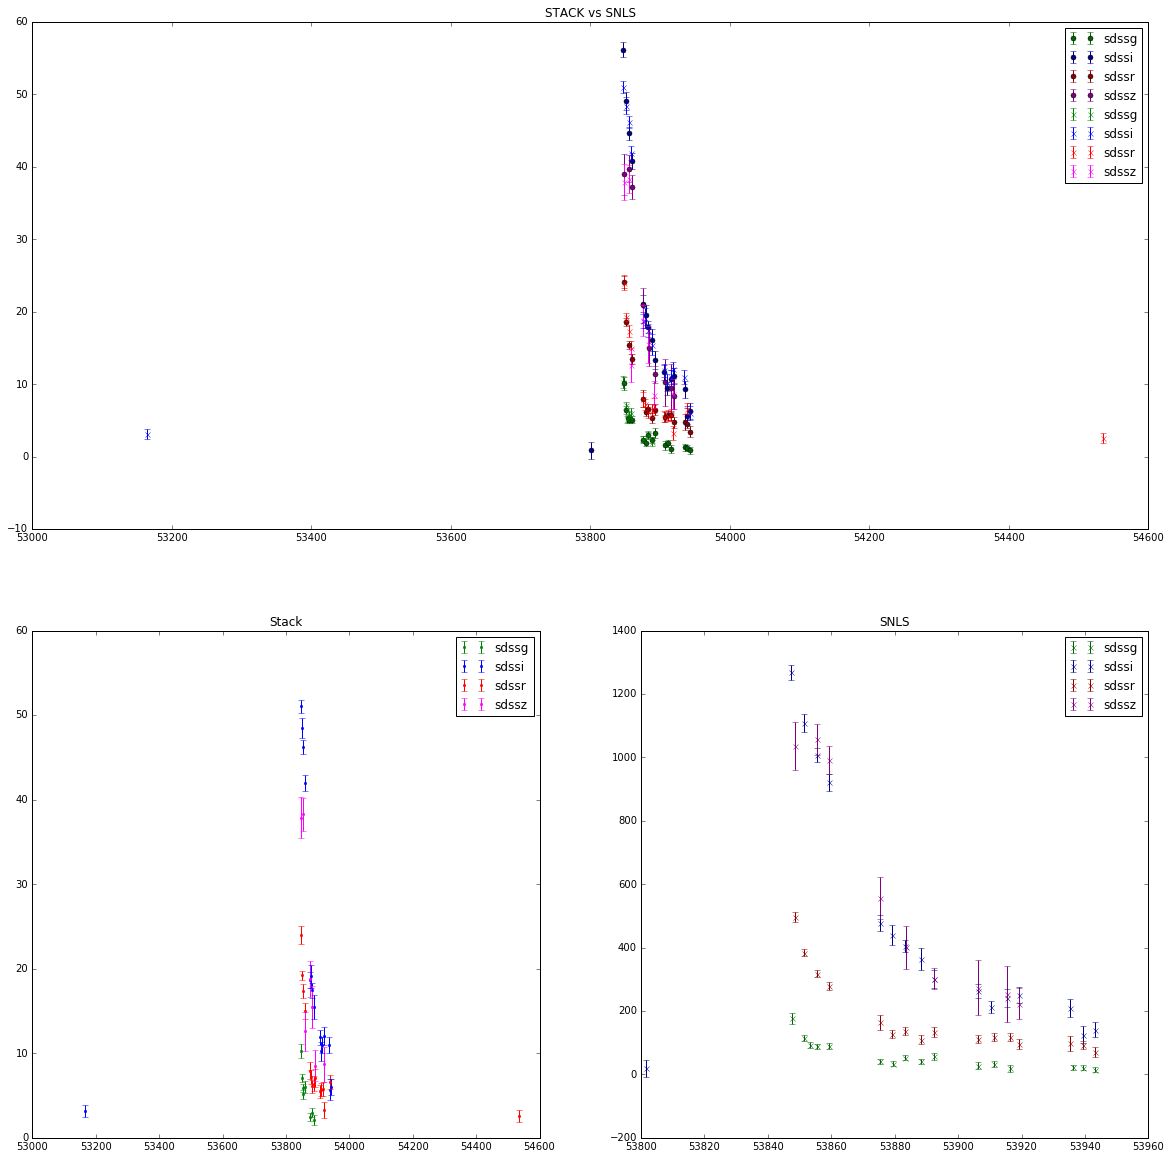

============New LC================
match
06D3en
{'sdssi': 0.042067447306379818, 'sdssr': 0.052928353107467151, 'sdssz': 0.037070340035674491, 'sdssg': 0.054758057917791279}
60


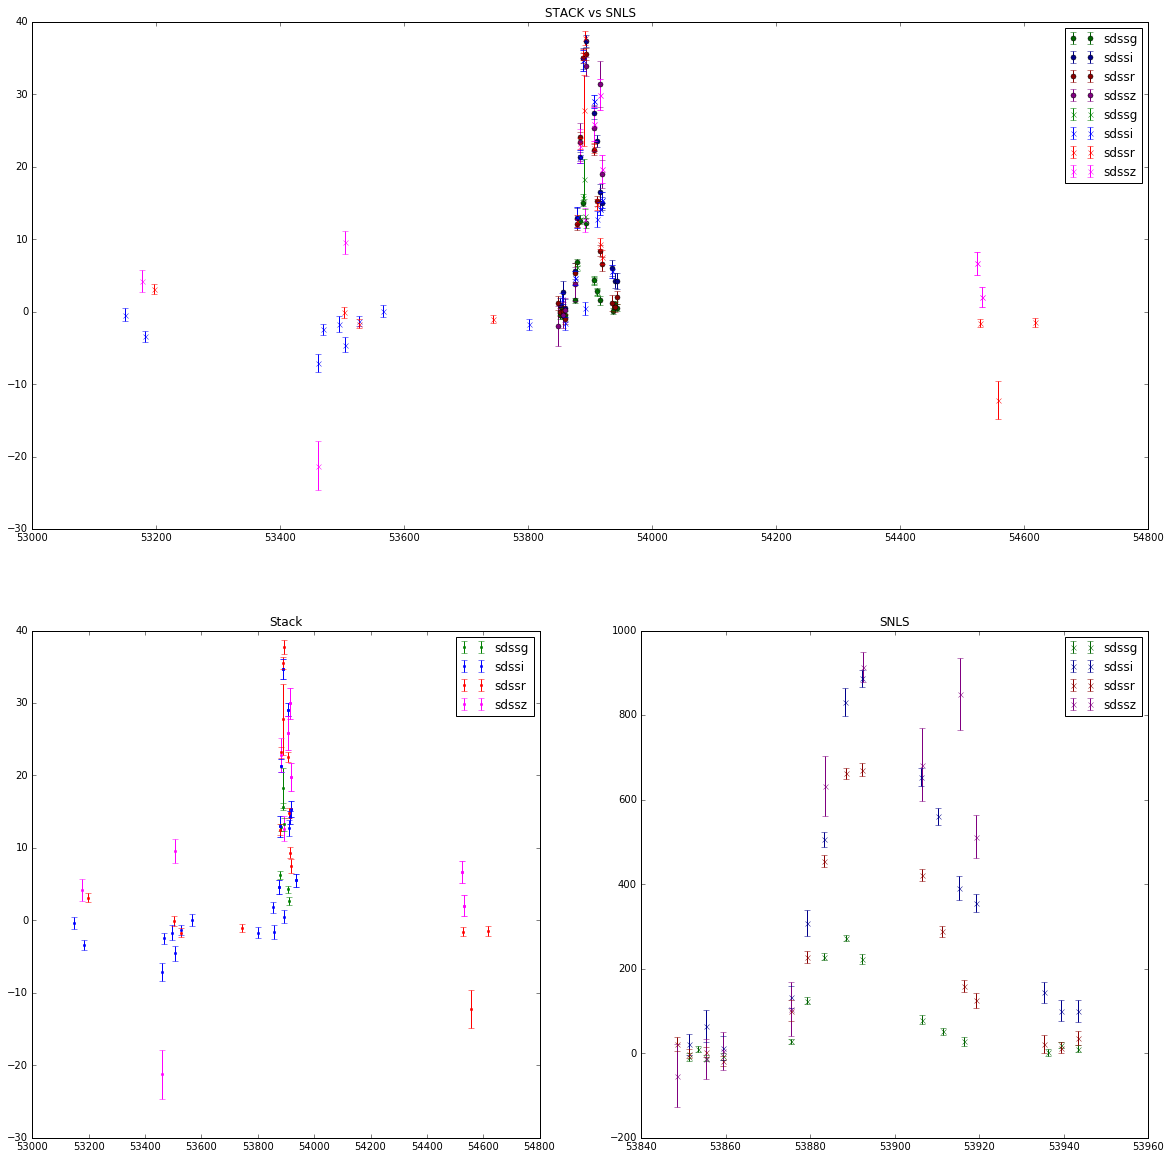

============New LC================
60


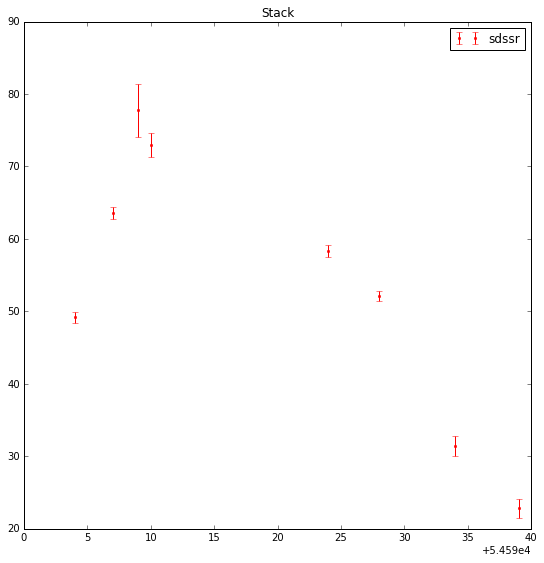

============New LC================
match
05D3mn
{'sdssi': nan, 'sdssr': -1.4595659938799057, 'sdssz': nan, 'sdssg': nan}
61


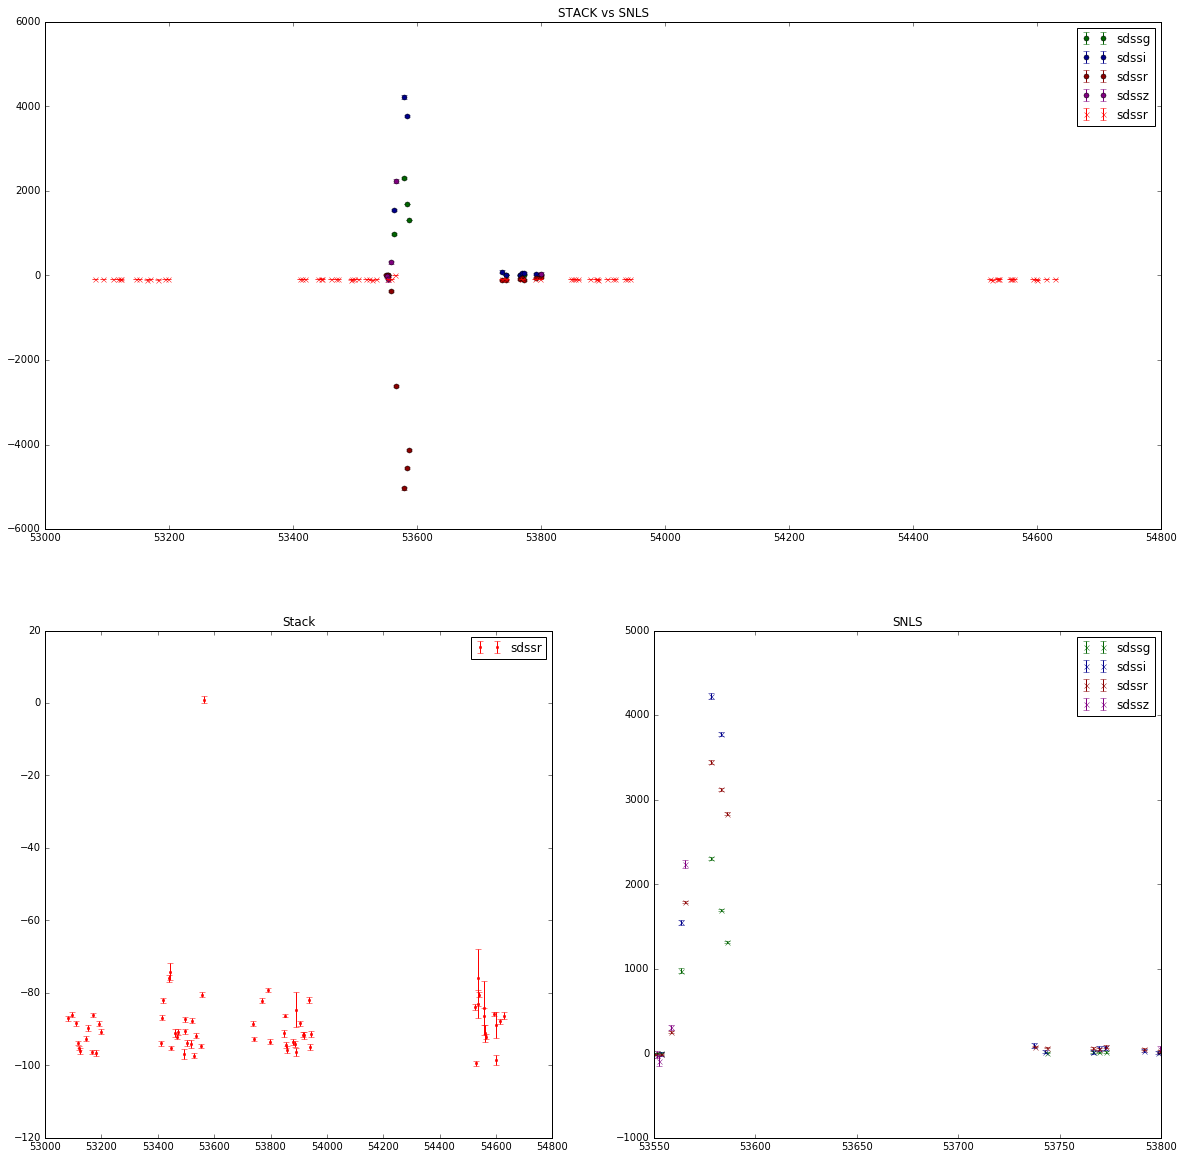

============New LC================
61


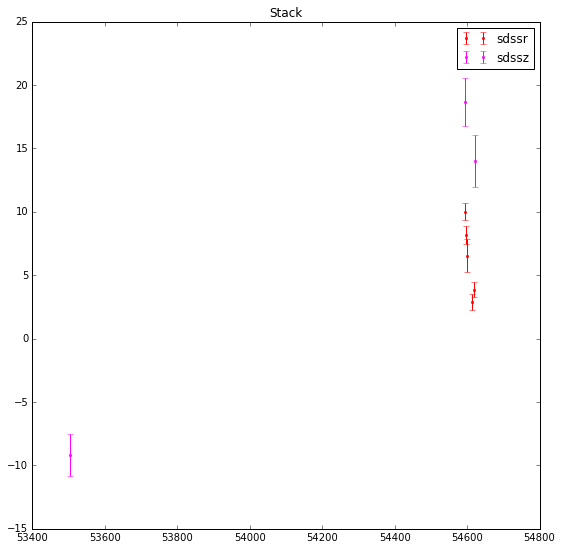

============New LC================
match
04D3df
{'sdssi': 0.038368127253585176, 'sdssr': 0.052411672789822311, 'sdssz': 0.039384796724198222, 'sdssg': 0.064690036637628526}
62


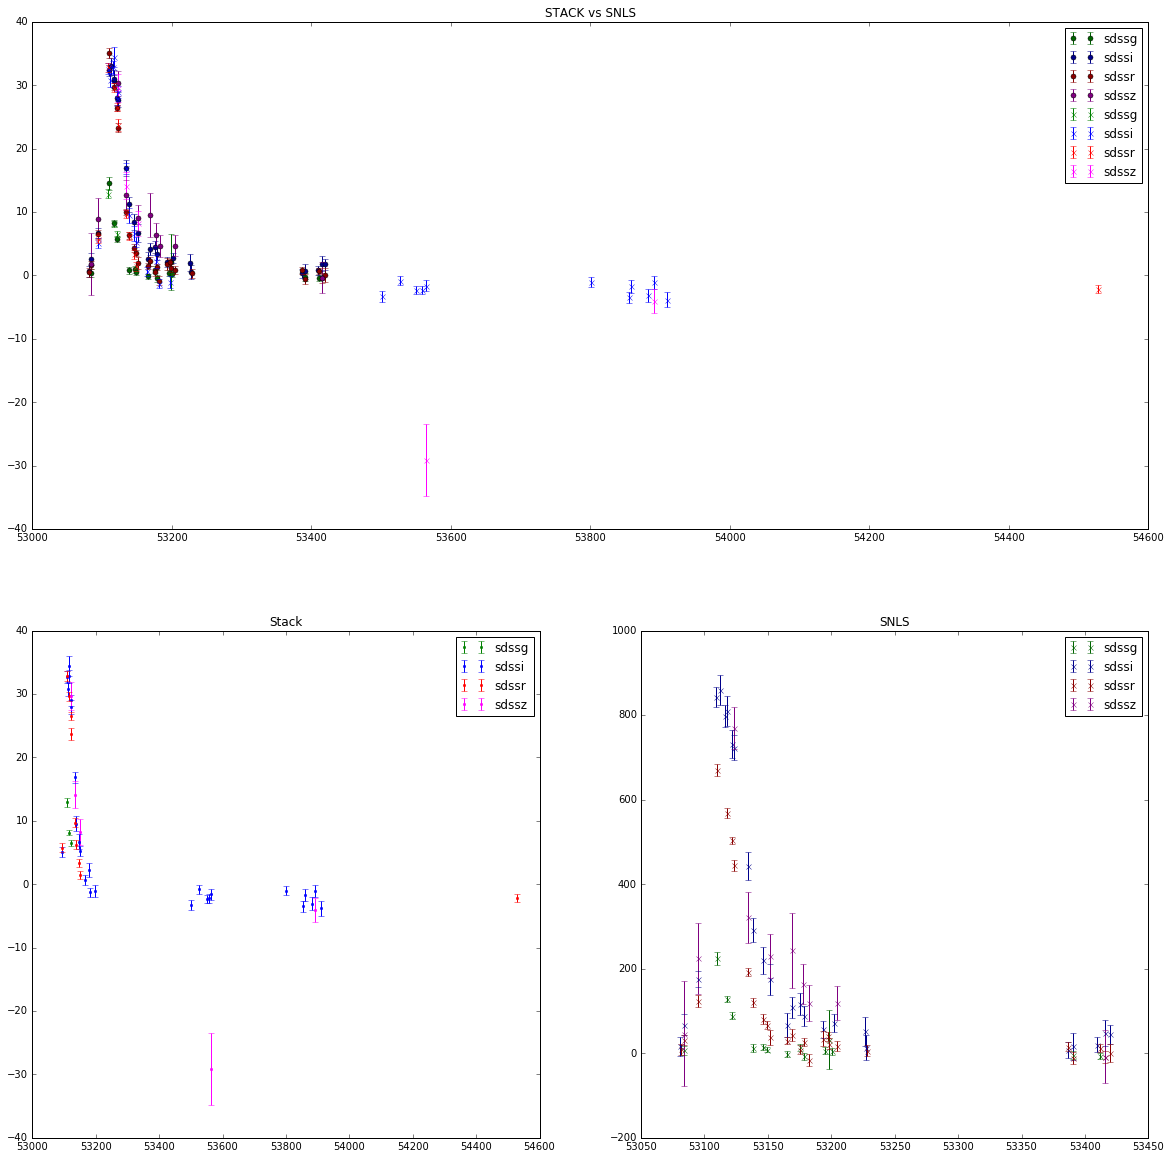

============New LC================
62


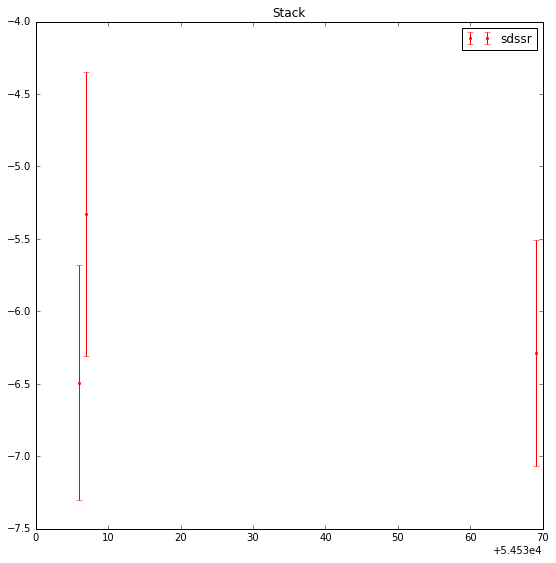

============New LC================
match
04D3gt
{'sdssi': 0.040751617540116421, 'sdssr': 0.054982161570035978, 'sdssz': nan, 'sdssg': nan}
63


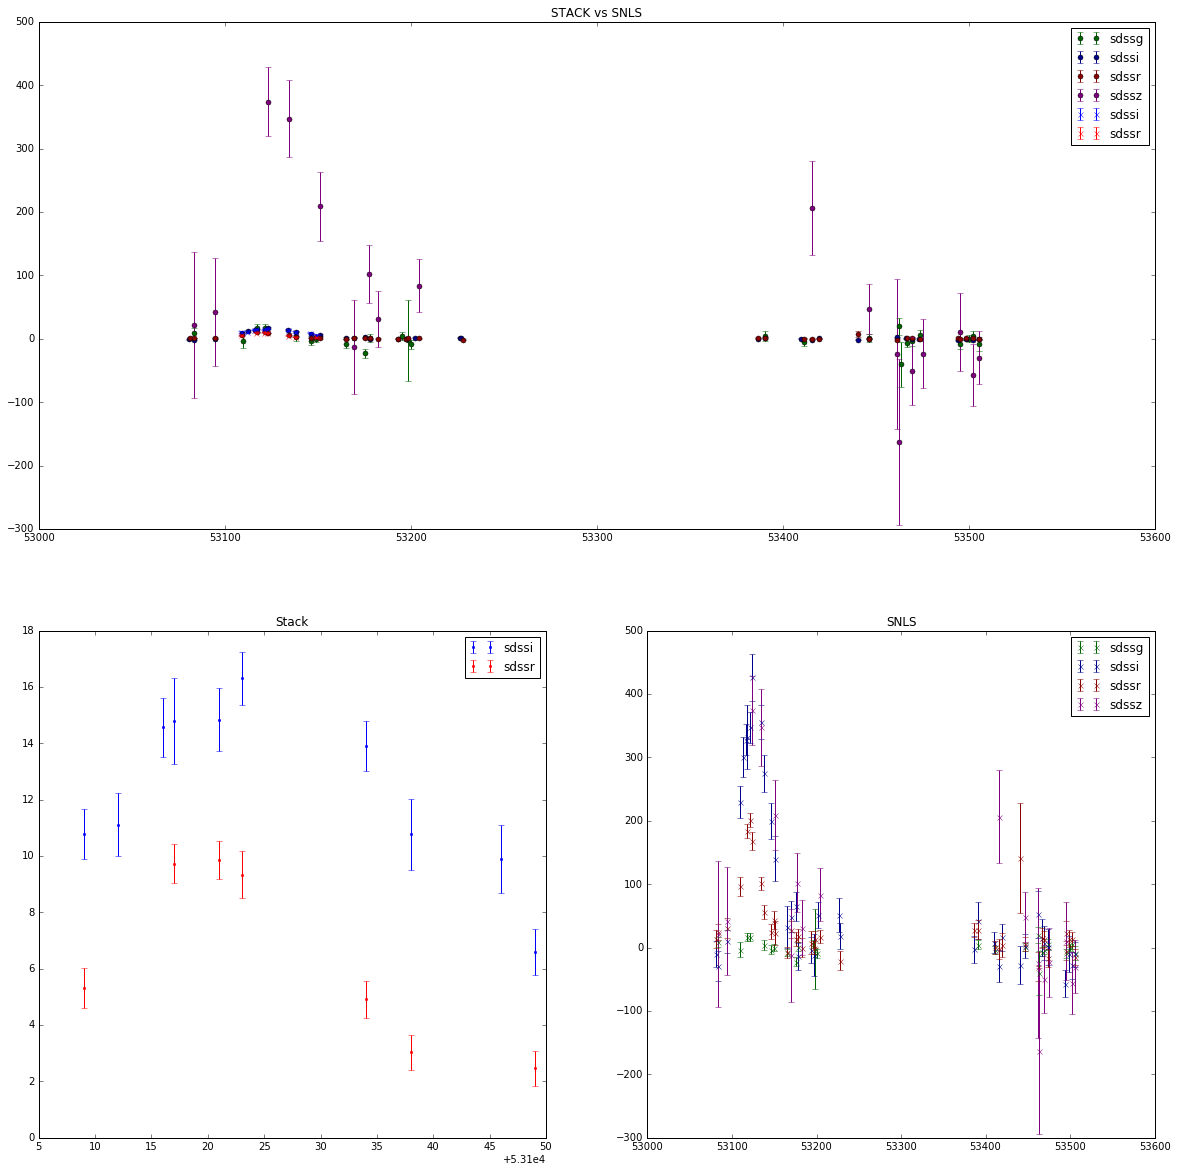

============New LC================
match
05D3lr
{'sdssi': 0.060443300893423597, 'sdssr': -0.32546945050686676, 'sdssz': 0.04696959393765799, 'sdssg': nan}
64


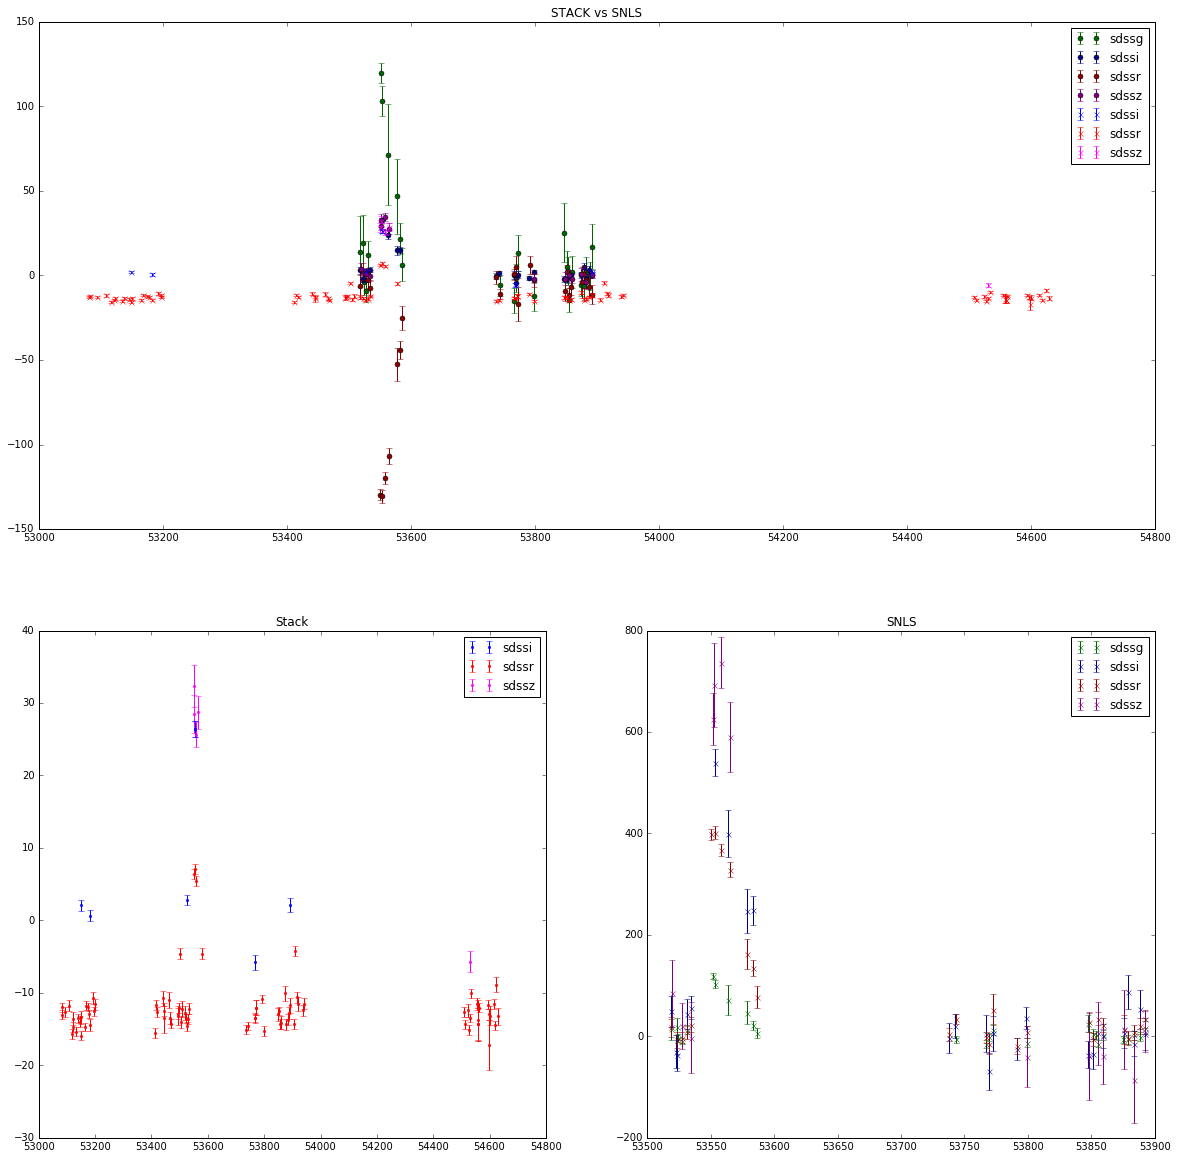

============New LC================
match
03D3ay
{'sdssi': nan, 'sdssr': nan, 'sdssz': nan, 'sdssg': nan}
65


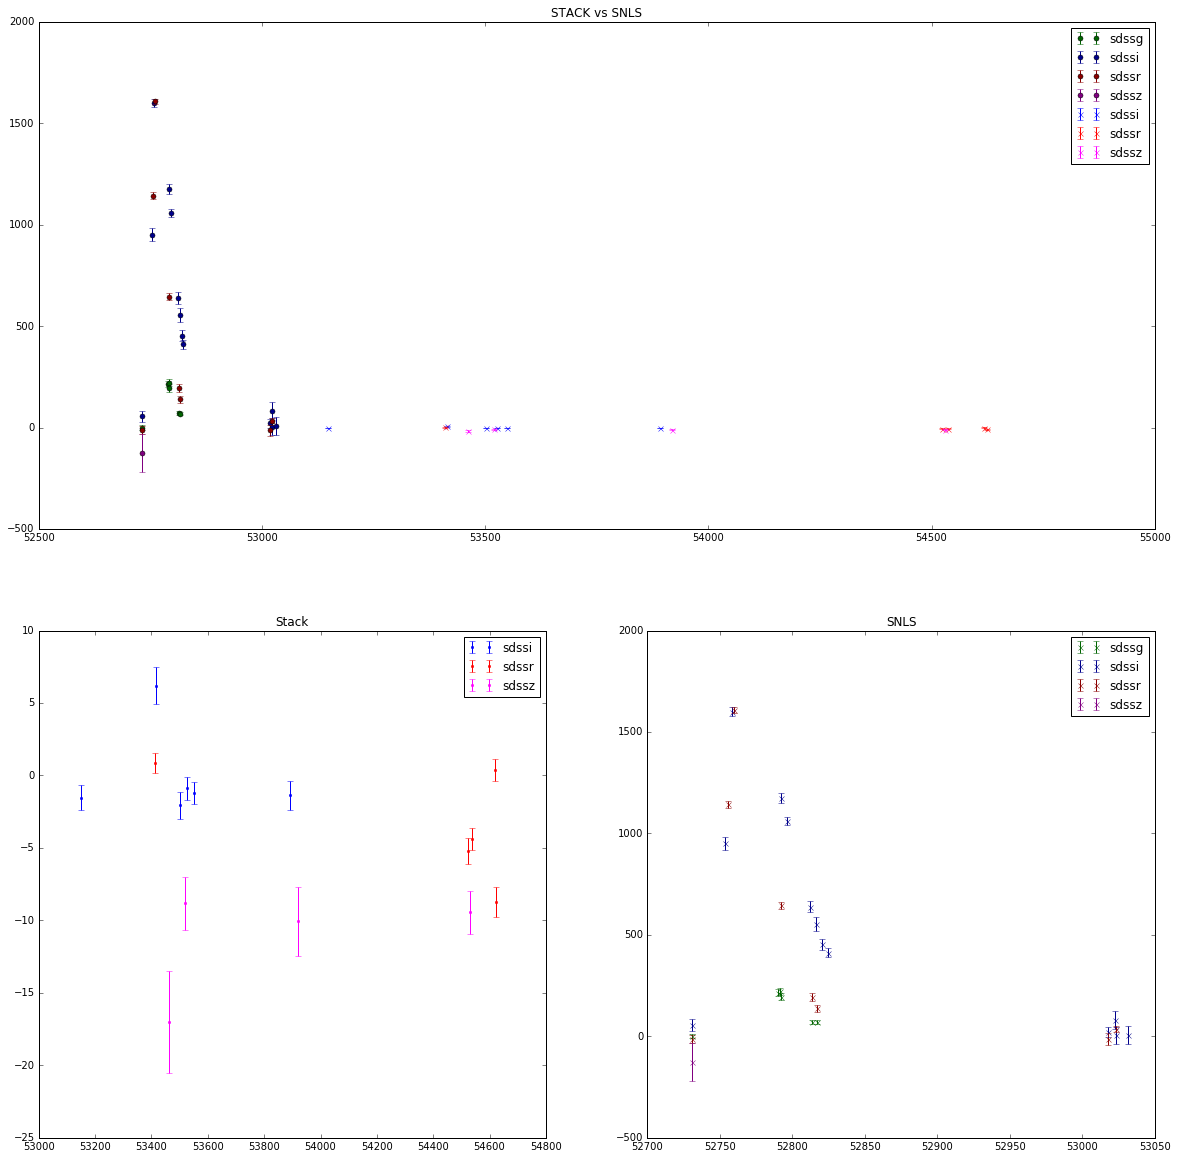

============New LC================
match
05D3lc
{'sdssi': 0.046637356300445867, 'sdssr': 0.026800419446343916, 'sdssz': 0.038883805301435967, 'sdssg': nan}
66


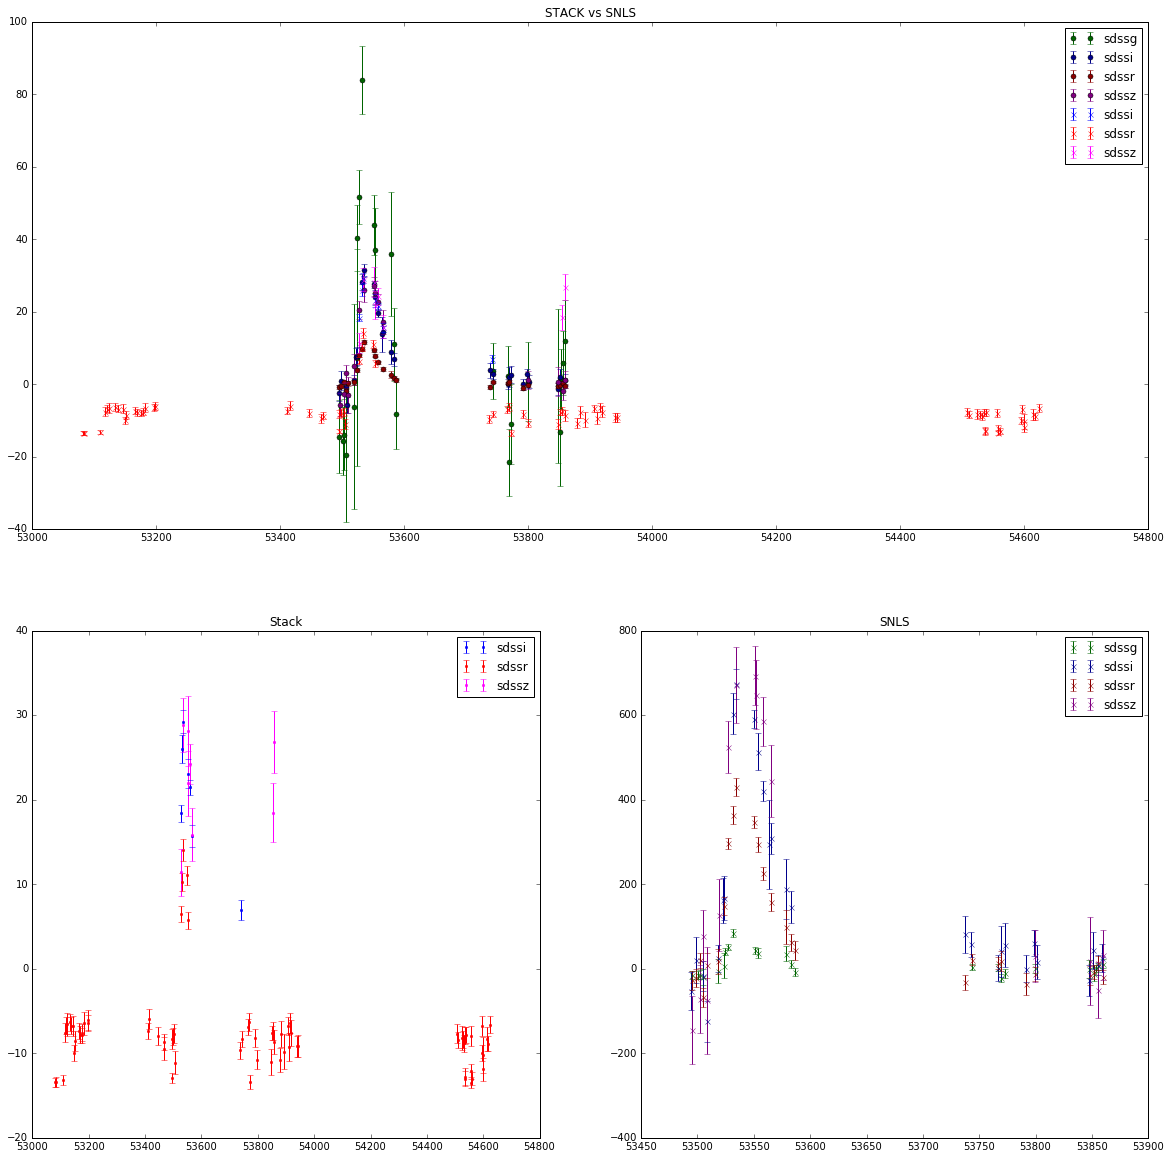

============New LC================
match
06D3cn
{'sdssi': 0.06214579584586389, 'sdssr': nan, 'sdssz': 0.05069094581357679, 'sdssg': 0.059325169494668629}
67


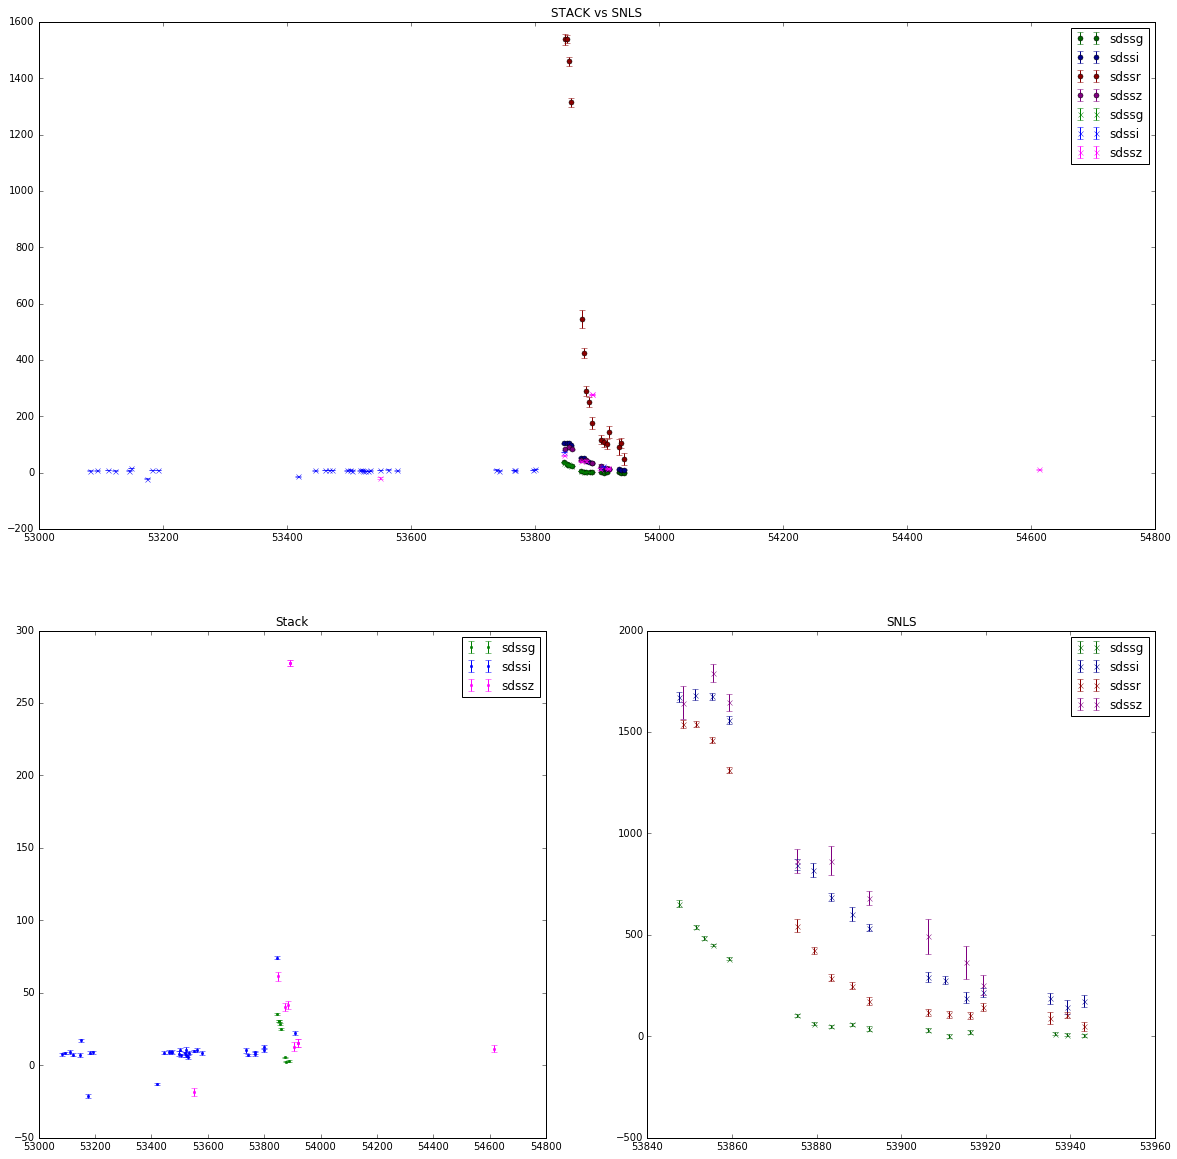

============New LC================
match
05D3jh
{'sdssi': 0.031898380828280573, 'sdssr': 0.049088860865242882, 'sdssz': 0.024189267386307479, 'sdssg': 0.063070467538343777}
68


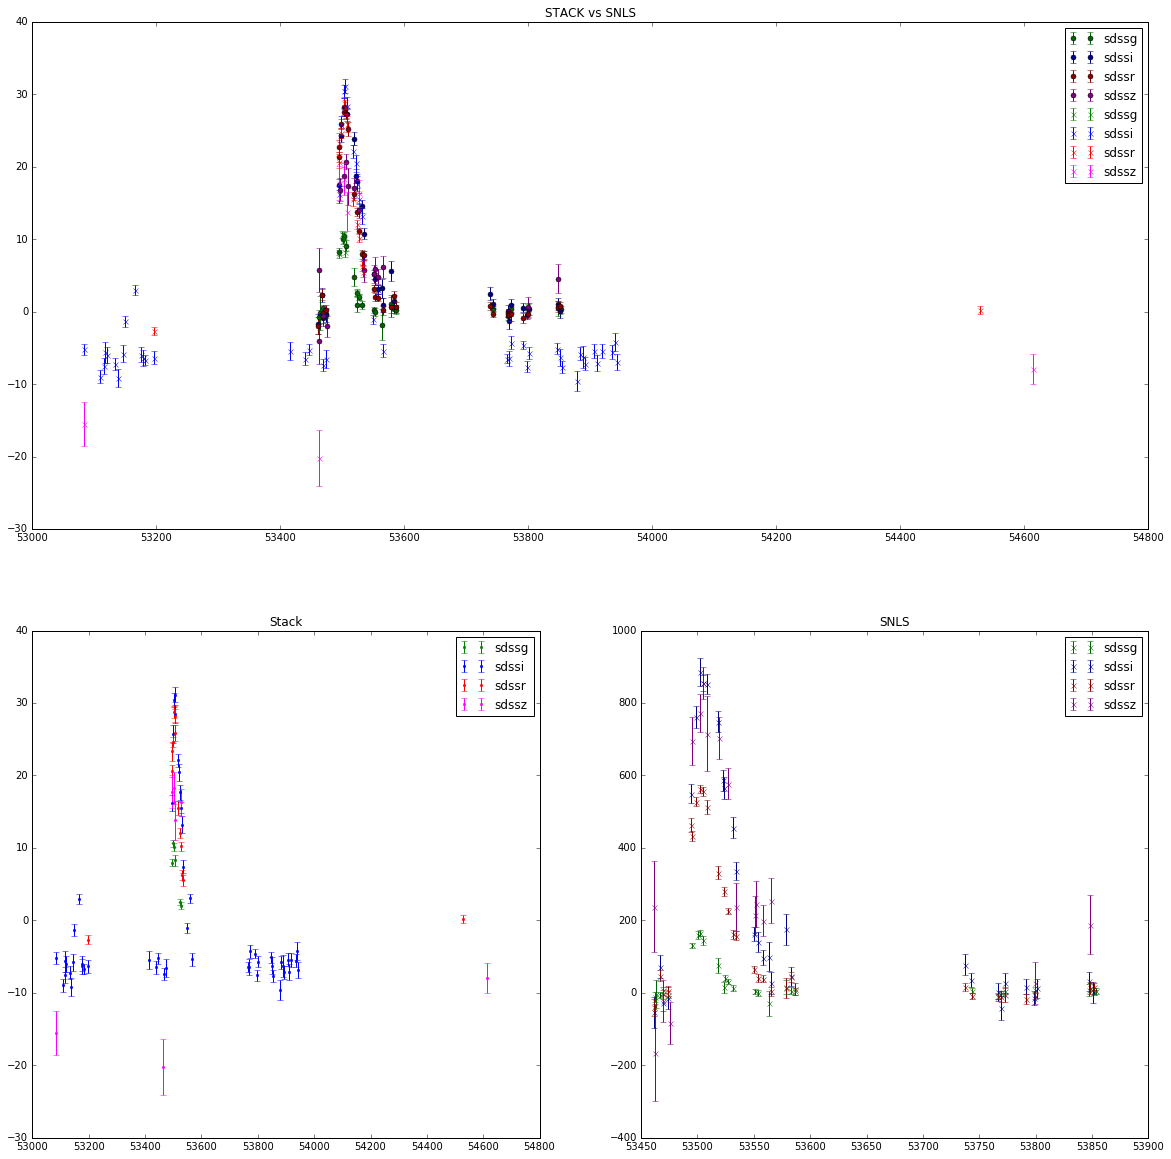

============New LC================
match
06D3do
{'sdssi': 0.041033247727706418, 'sdssr': 0.052766601384519871, 'sdssz': 0.041796071030470026, 'sdssg': 0.067075905041671879}
69


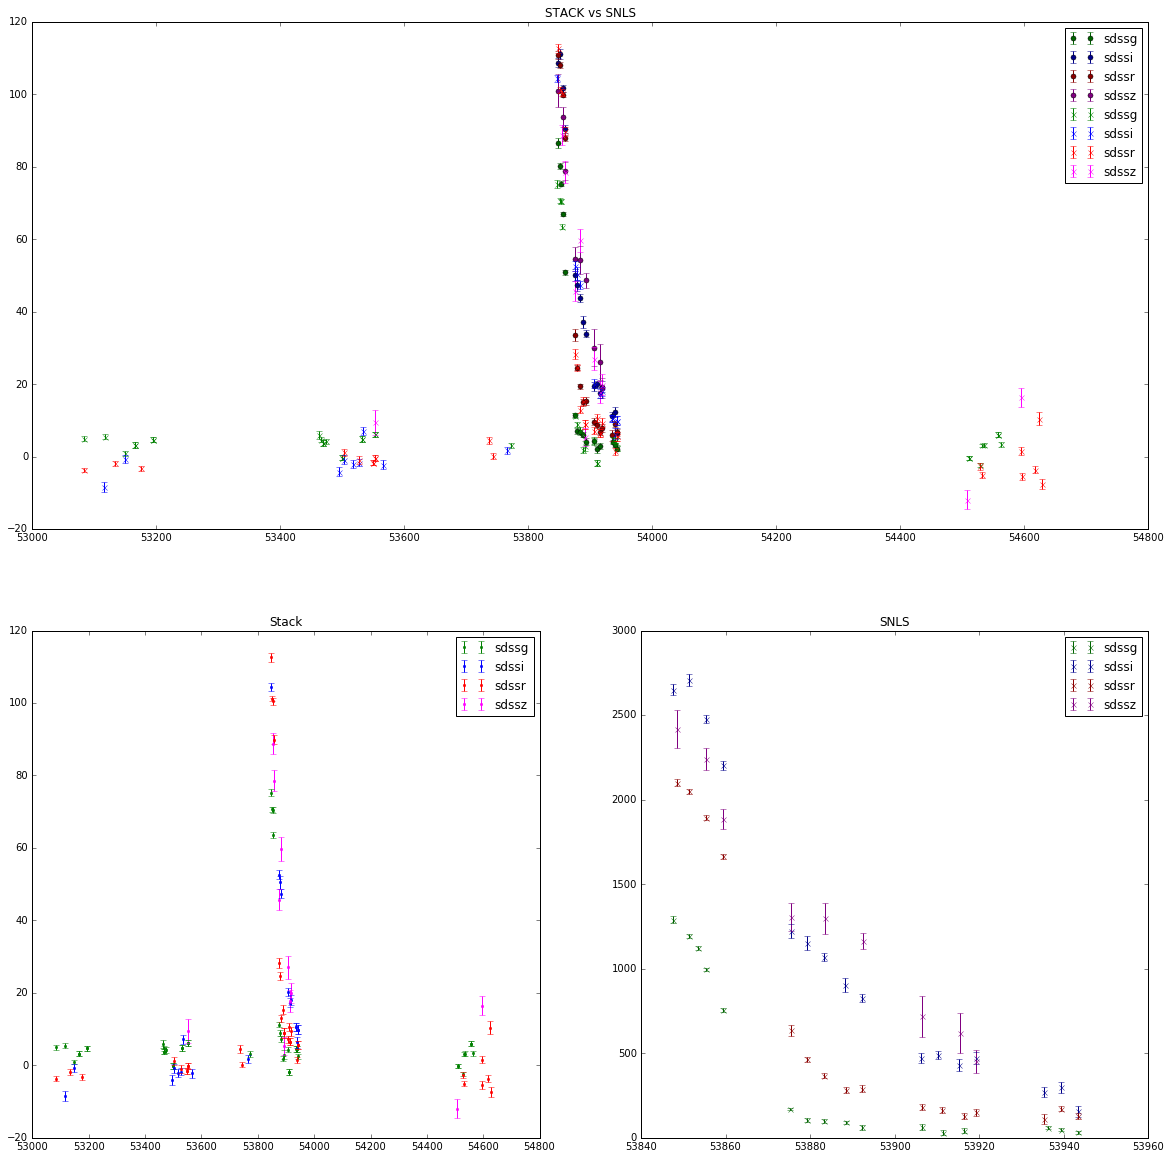

============New LC================
match
05D3cq
{'sdssi': 0.042631885564532394, 'sdssr': 0.03836104439389415, 'sdssz': -0.10034717598280922, 'sdssg': -0.3389302724193623}
70


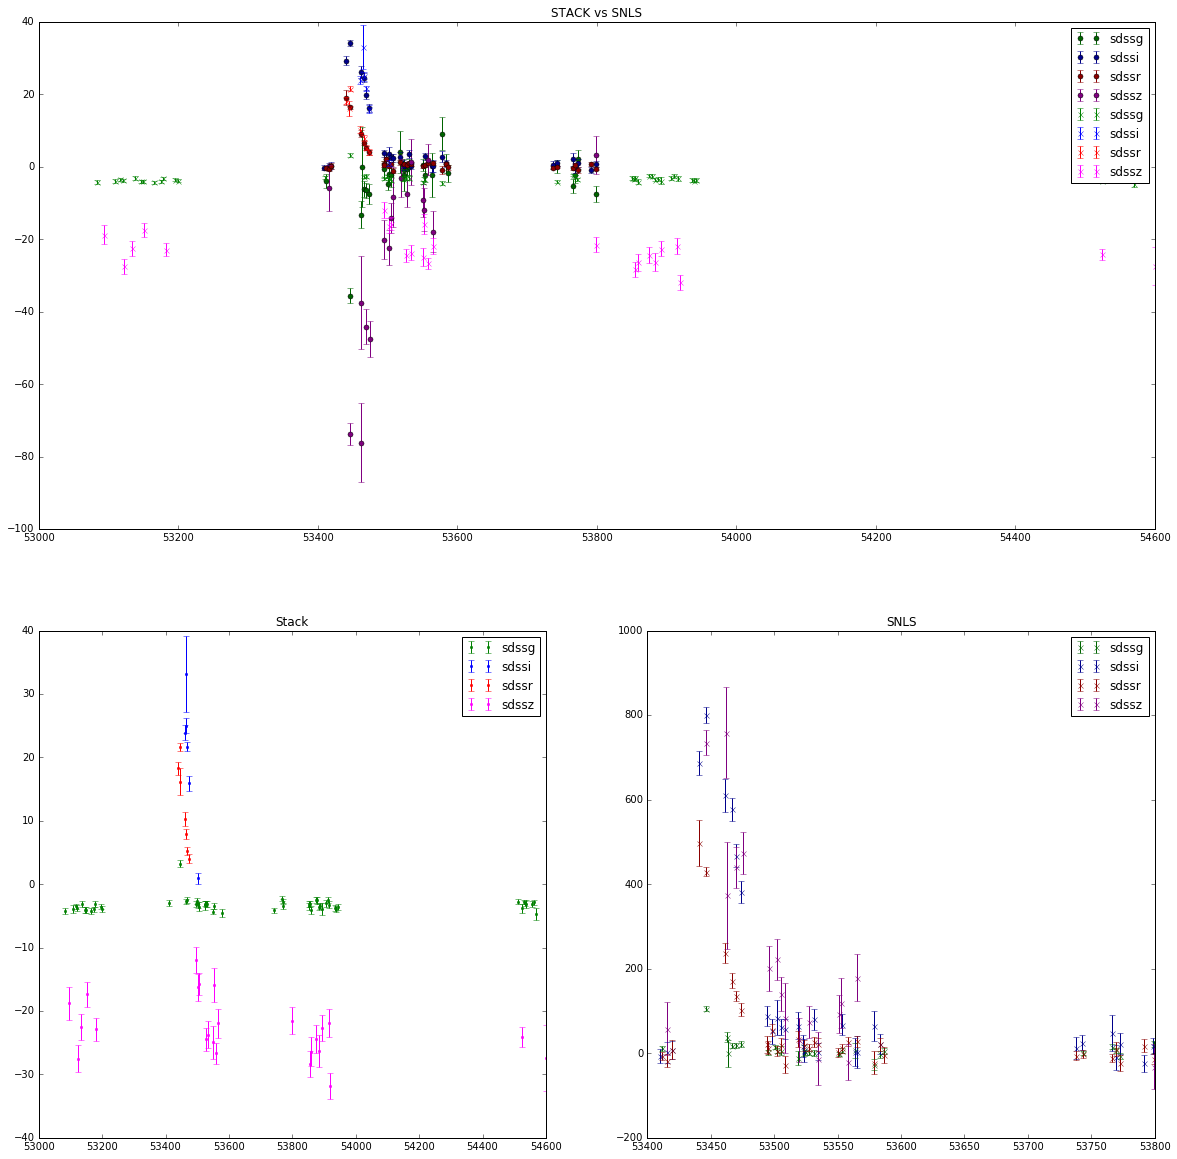

============New LC================
match
06D3cb
{'sdssi': 0.039149467642482443, 'sdssr': 0.045324878013286288, 'sdssz': nan, 'sdssg': 0.084532542366539731}
71


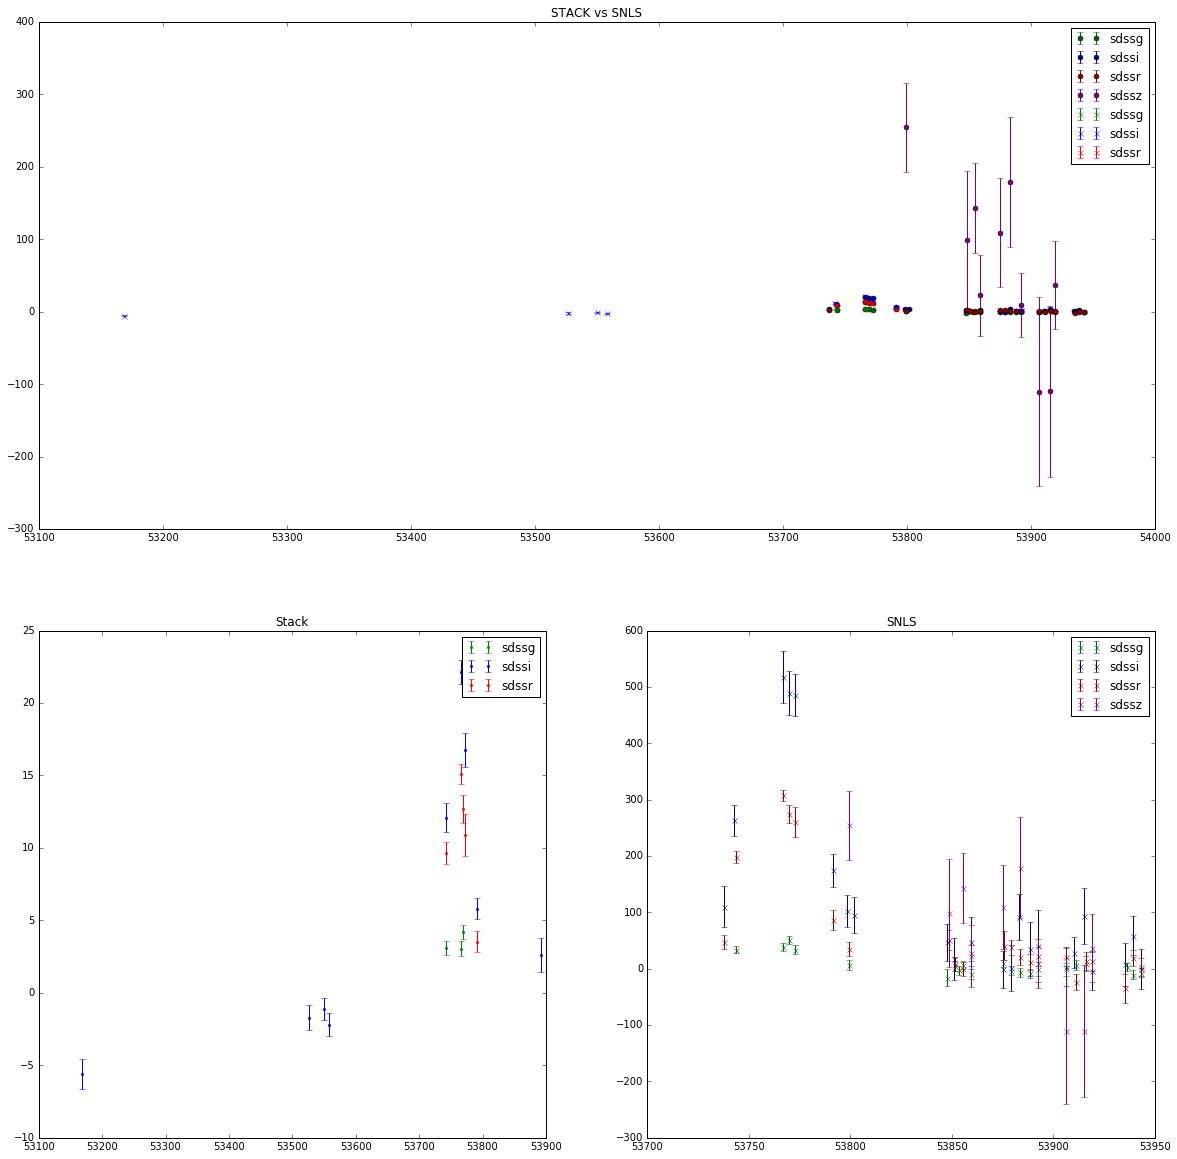

============New LC================
match
05D3km
{'sdssi': 0.038283070043178297, 'sdssr': 0.04699049344738699, 'sdssz': 0.03796325543160365, 'sdssg': nan}
72


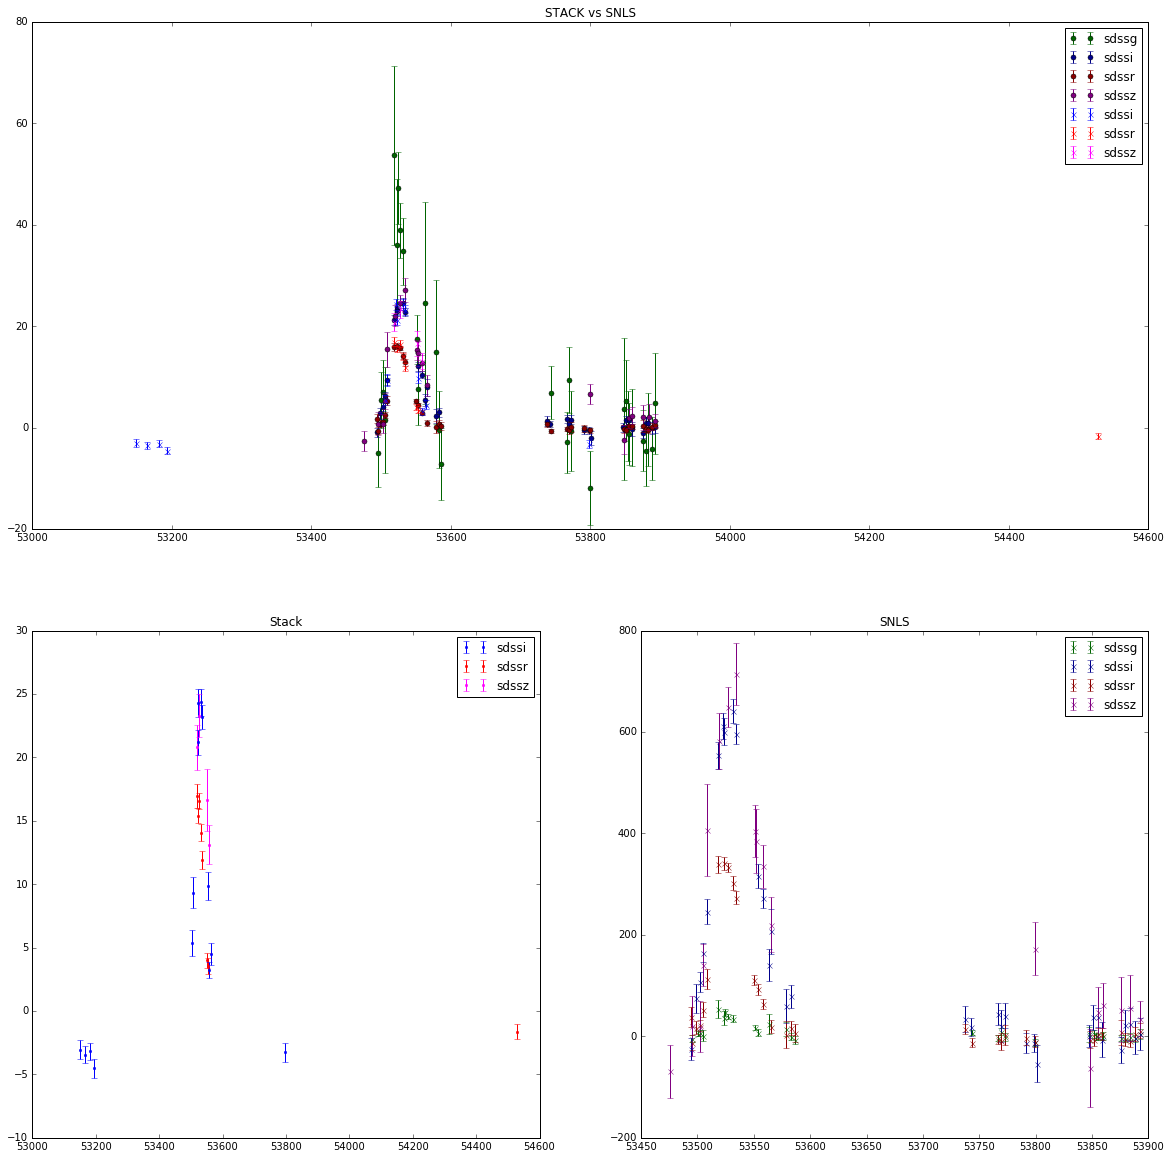

============New LC================
72


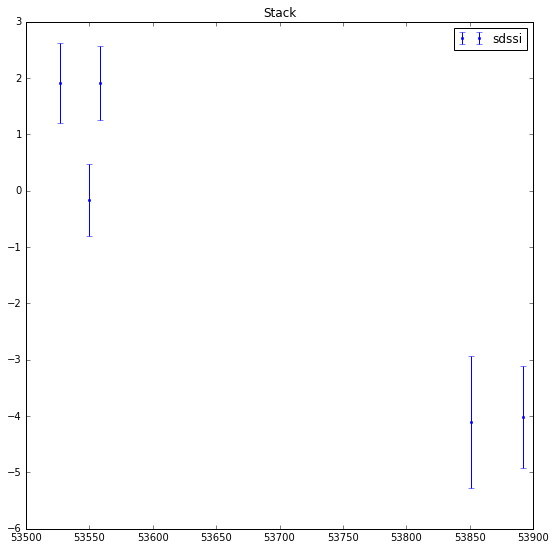

============New LC================
match
05D3mh
{'sdssi': -0.013377722345376427, 'sdssr': 0.47255930799354801, 'sdssz': 0.039640117650271894, 'sdssg': nan}
73


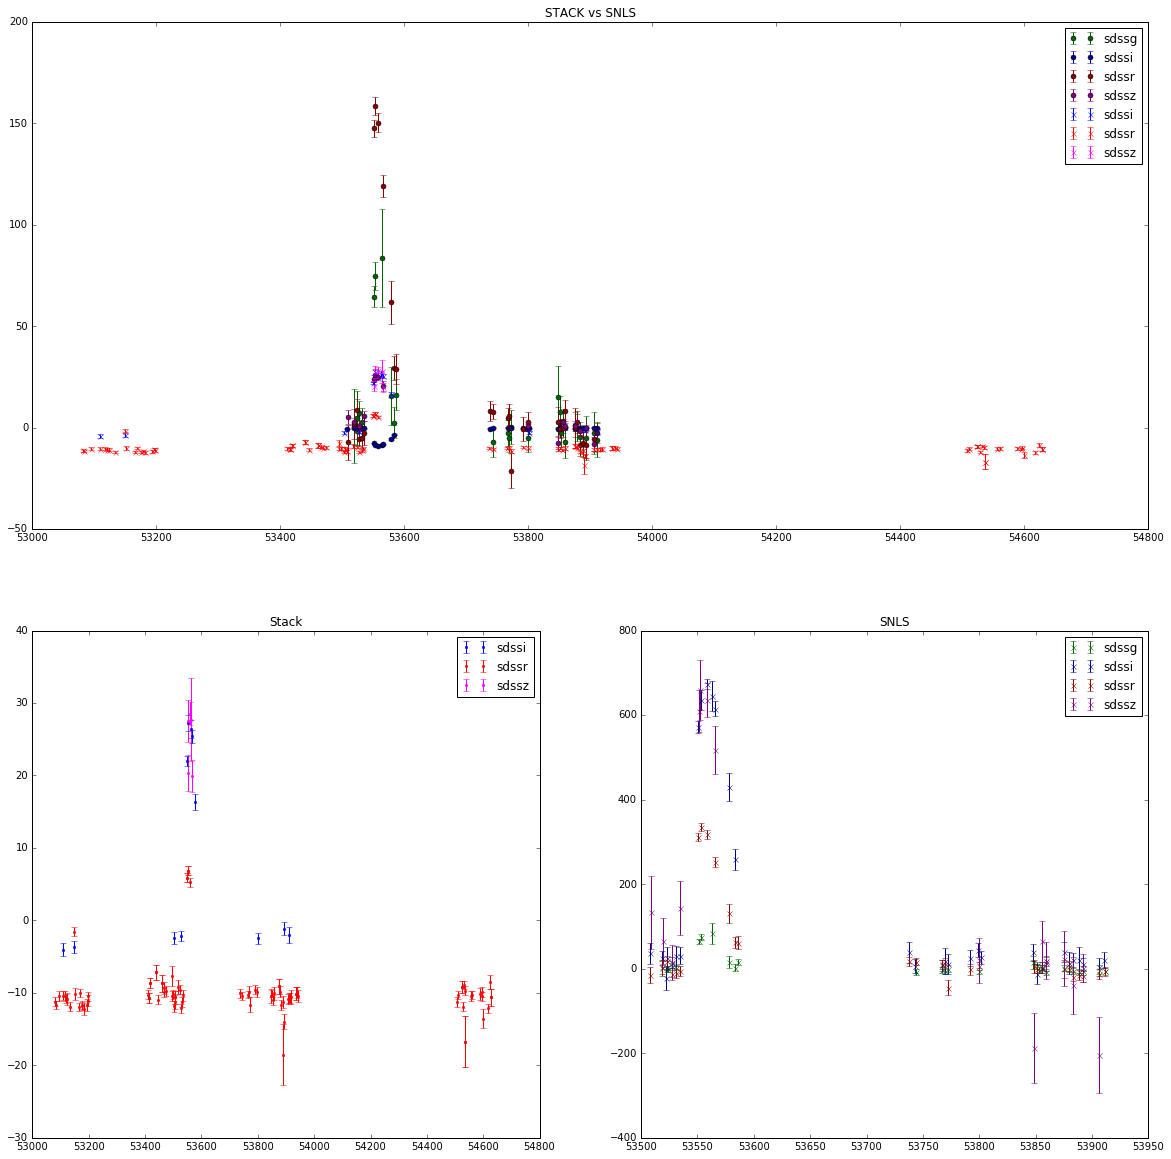

============New LC================
match
06D3do
{'sdssi': nan, 'sdssr': nan, 'sdssz': nan, 'sdssg': nan}
74


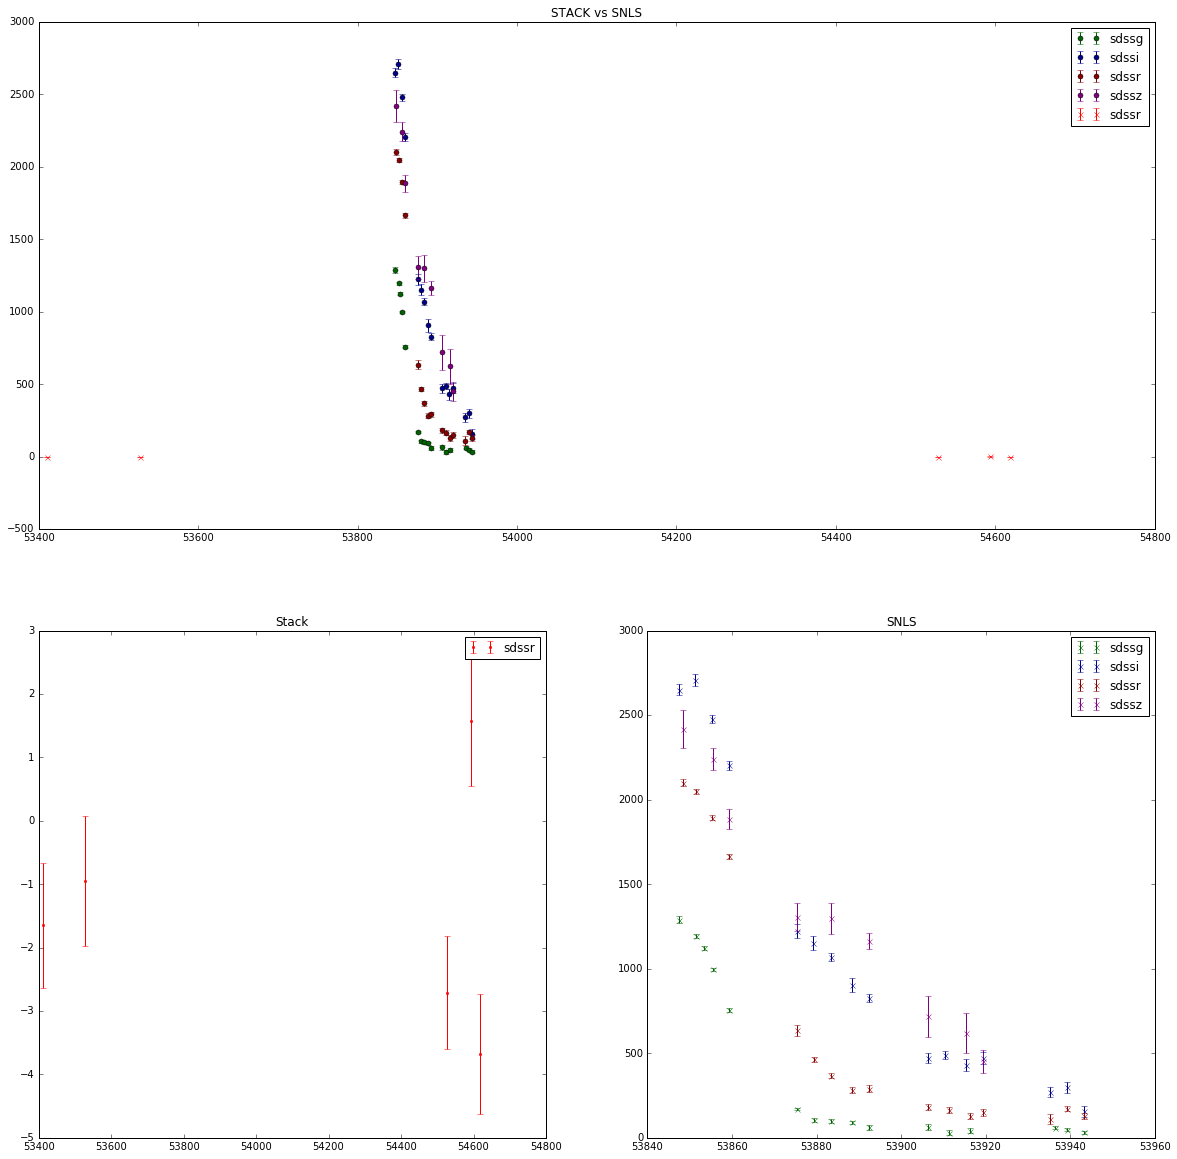

============New LC================
match
05D3kp
{'sdssi': 0.039107147517149277, 'sdssr': 0.04394151765525639, 'sdssz': 0.027469631716986898, 'sdssg': 0.054856898562476337}
75


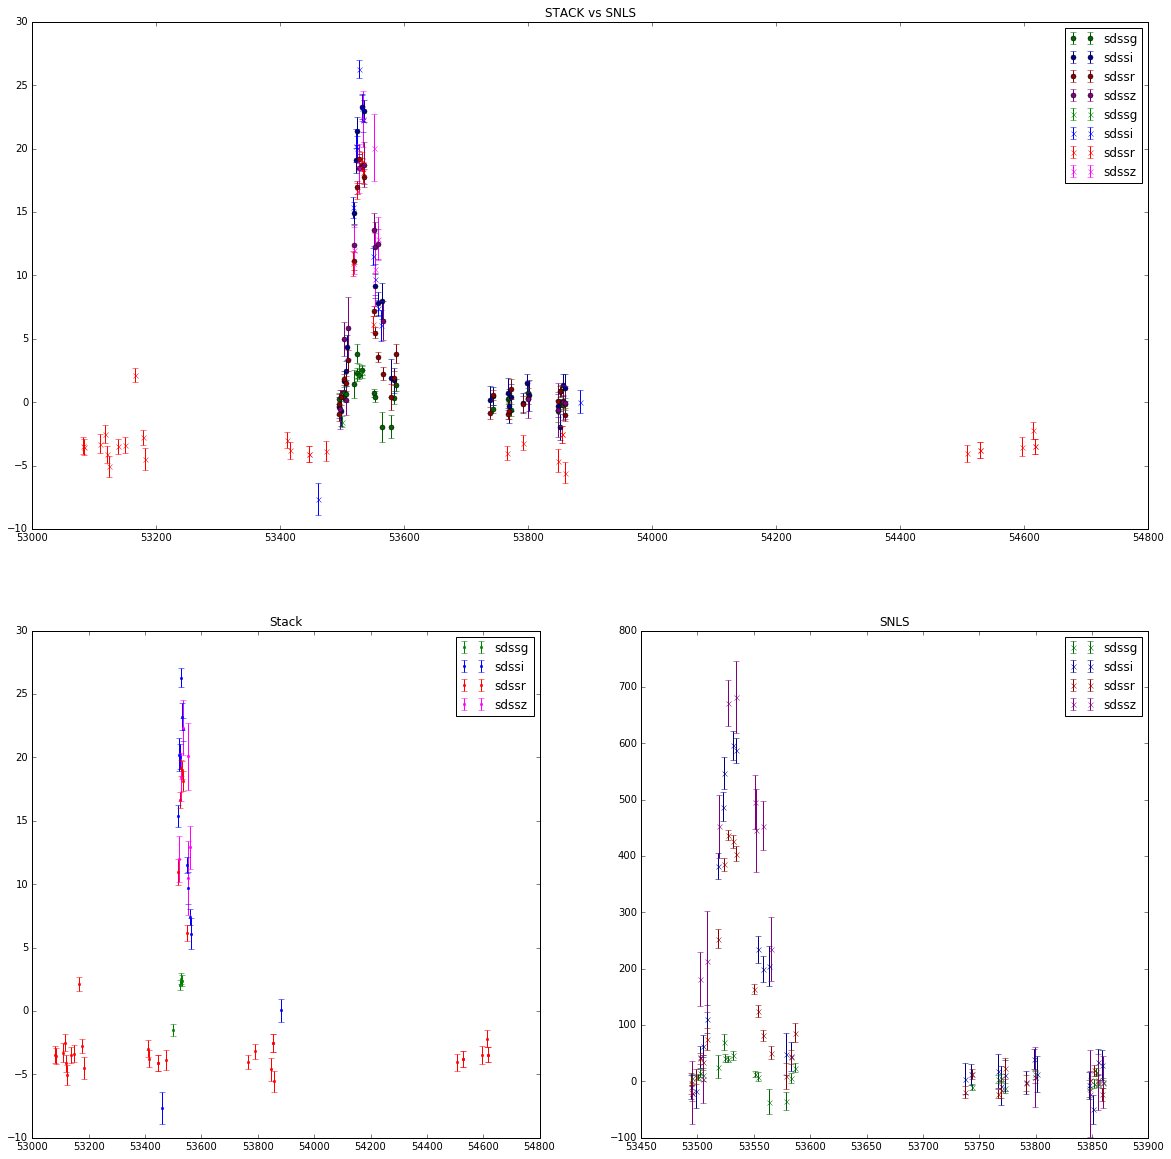

============New LC================
75


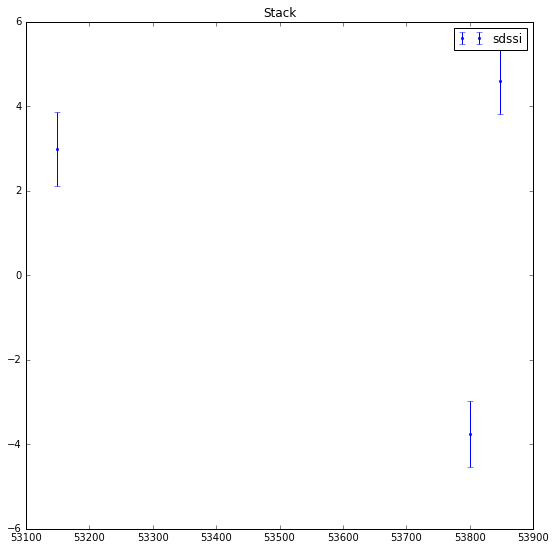

============New LC================
match
06D3cc
{'sdssi': 0.035918506549760018, 'sdssr': 0.048999144861721217, 'sdssz': 0.031426864388539068, 'sdssg': 0.058562452271053334}
76


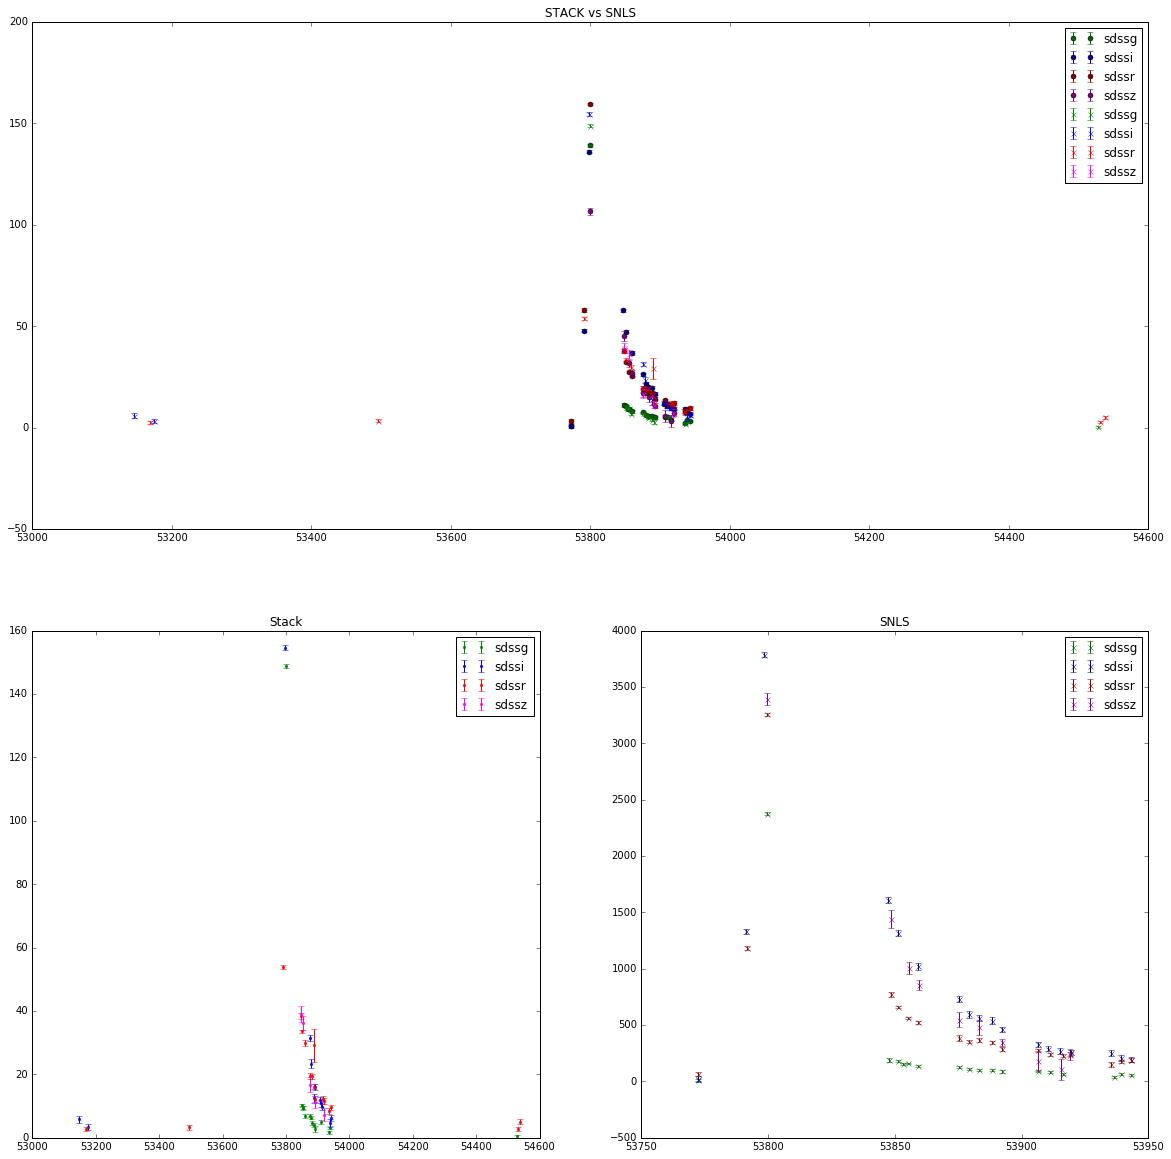

============New LC================
match
04D3gx
{'sdssi': 0.039502527192121835, 'sdssr': 0.047398746766280773, 'sdssz': 0.029721664159951165, 'sdssg': 0.060708105823498885}
77


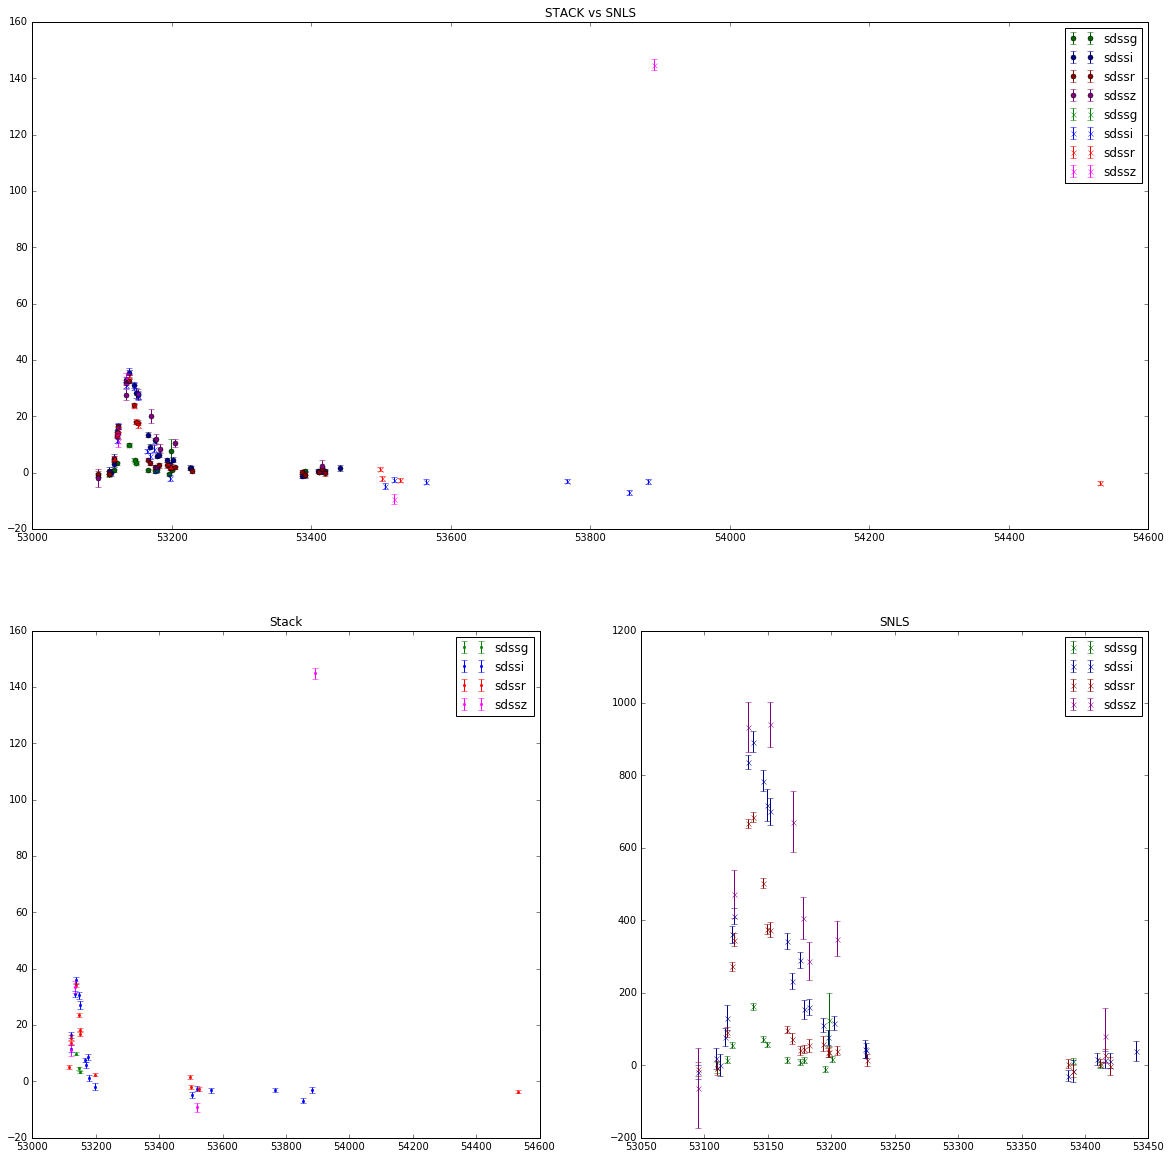

============New LC================
match
04D3fq
{'sdssi': 0.04209381599696696, 'sdssr': 0.052273737303918641, 'sdssz': 0.03583119086784646, 'sdssg': 0.063633609501389118}
78


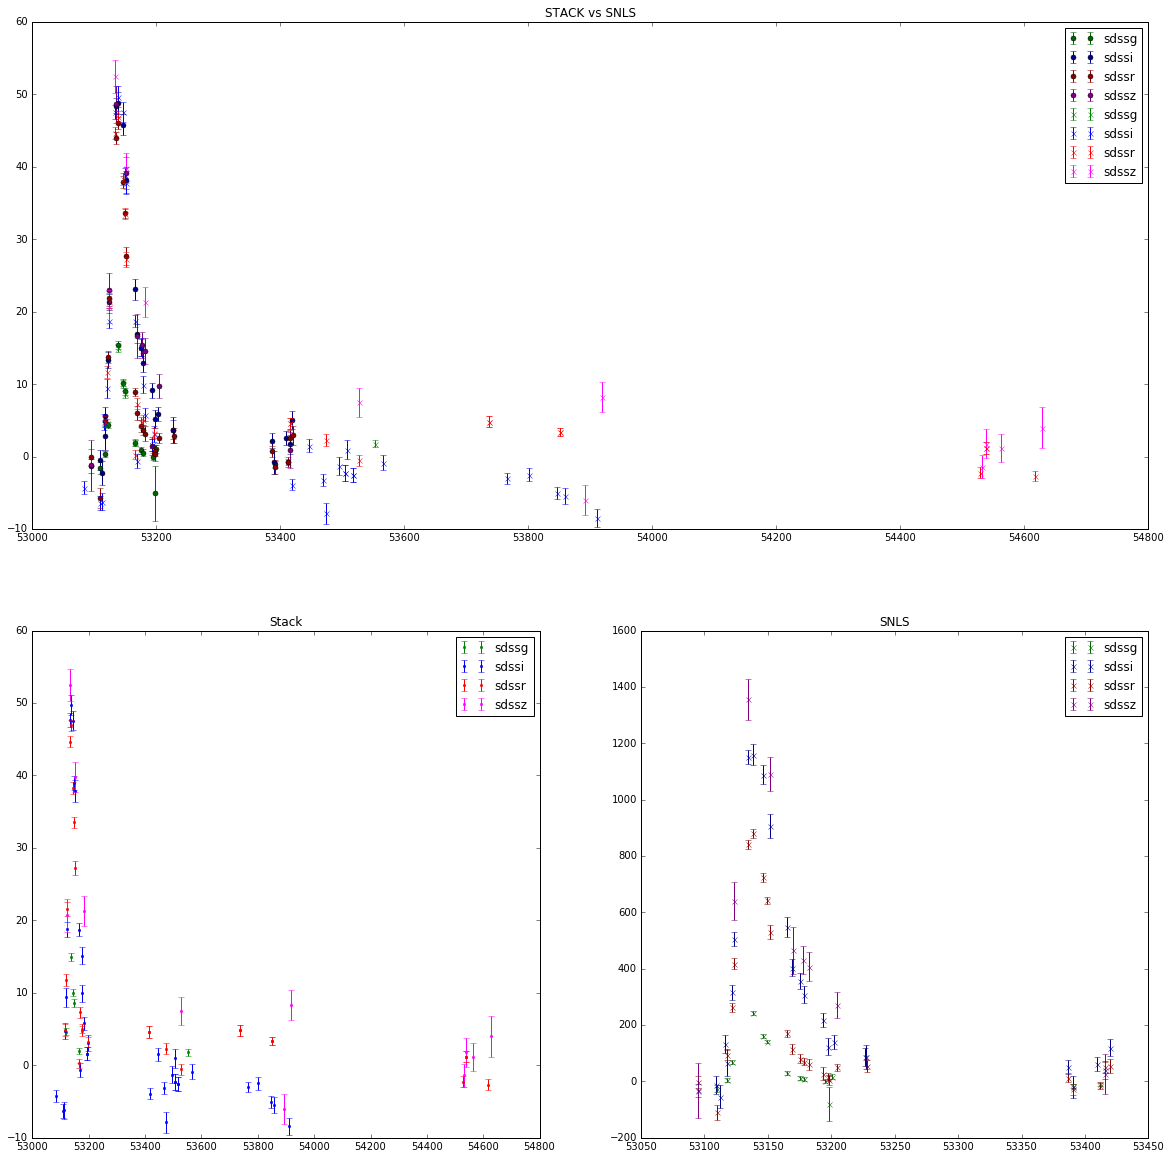

============New LC================
match
05D3dh
{'sdssi': 0.037948687495005913, 'sdssr': 0.048788541193925332, 'sdssz': -0.18269473940447339, 'sdssg': 4.7535160193495241}
79


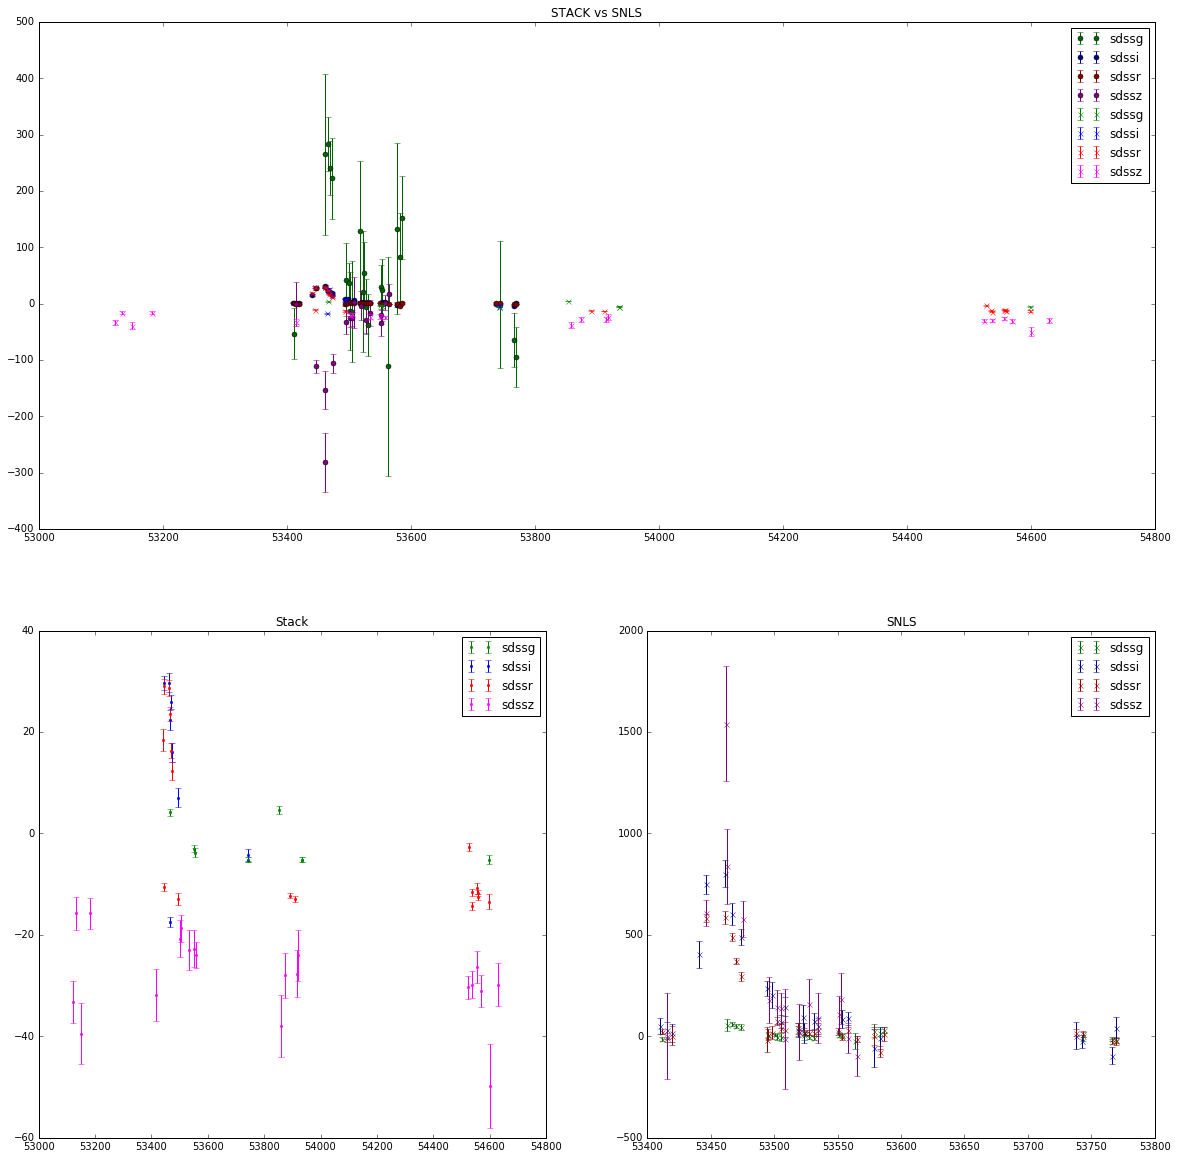

============New LC================
match
05D3mq
{'sdssi': 0.042996990755926279, 'sdssr': 0.0029389379142172427, 'sdssz': 0.03973980261933522, 'sdssg': 0.055490446266319604}
80


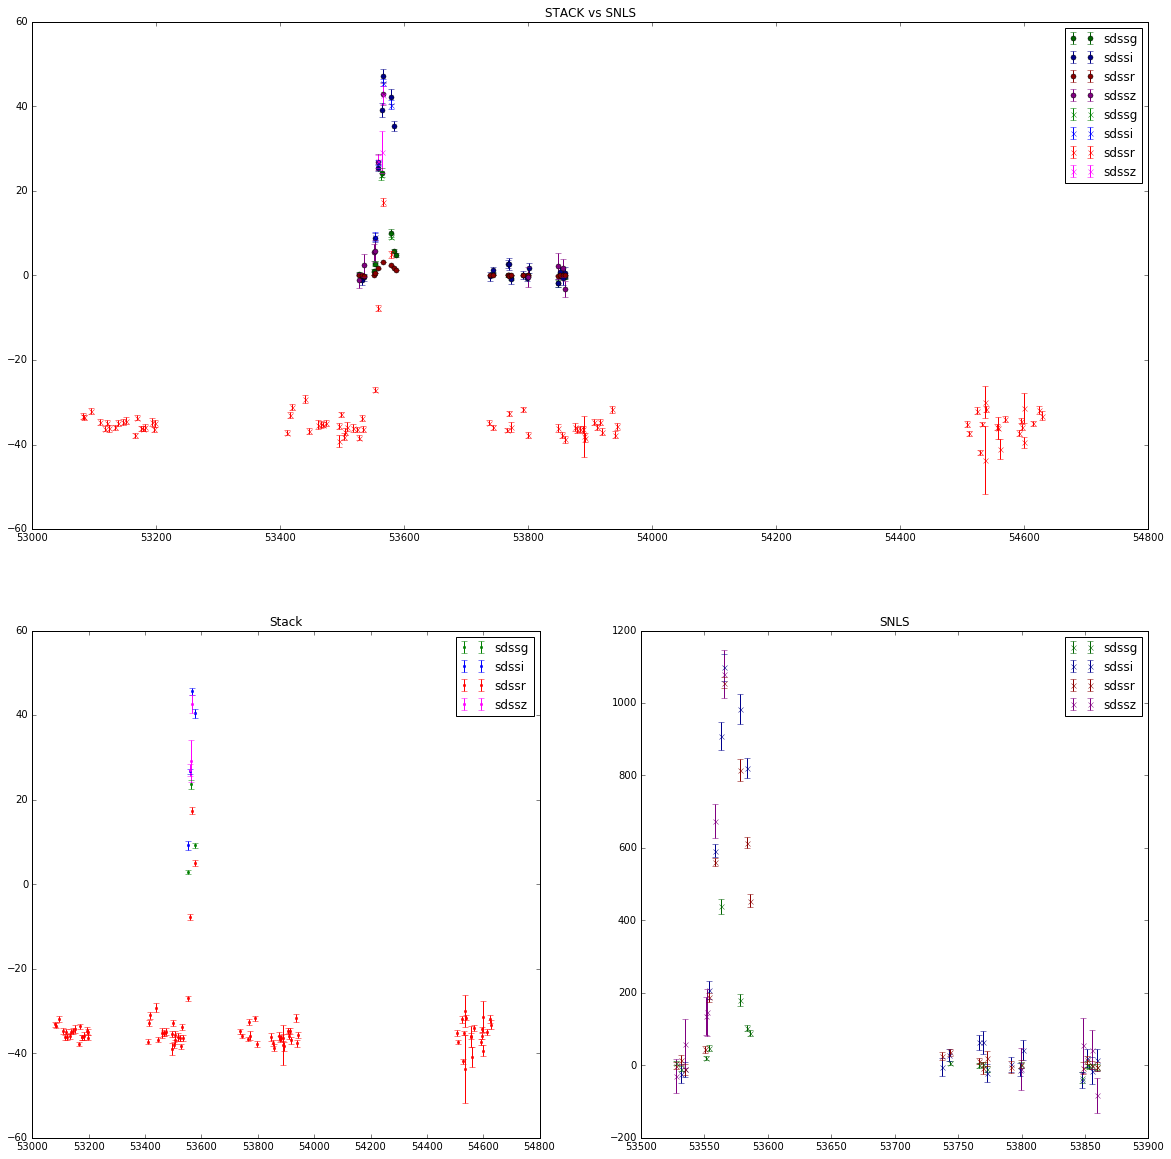

============New LC================
match
04D3nh
{'sdssi': 0.04205106285635931, 'sdssr': 0.050501272417425046, 'sdssz': nan, 'sdssg': nan}
81


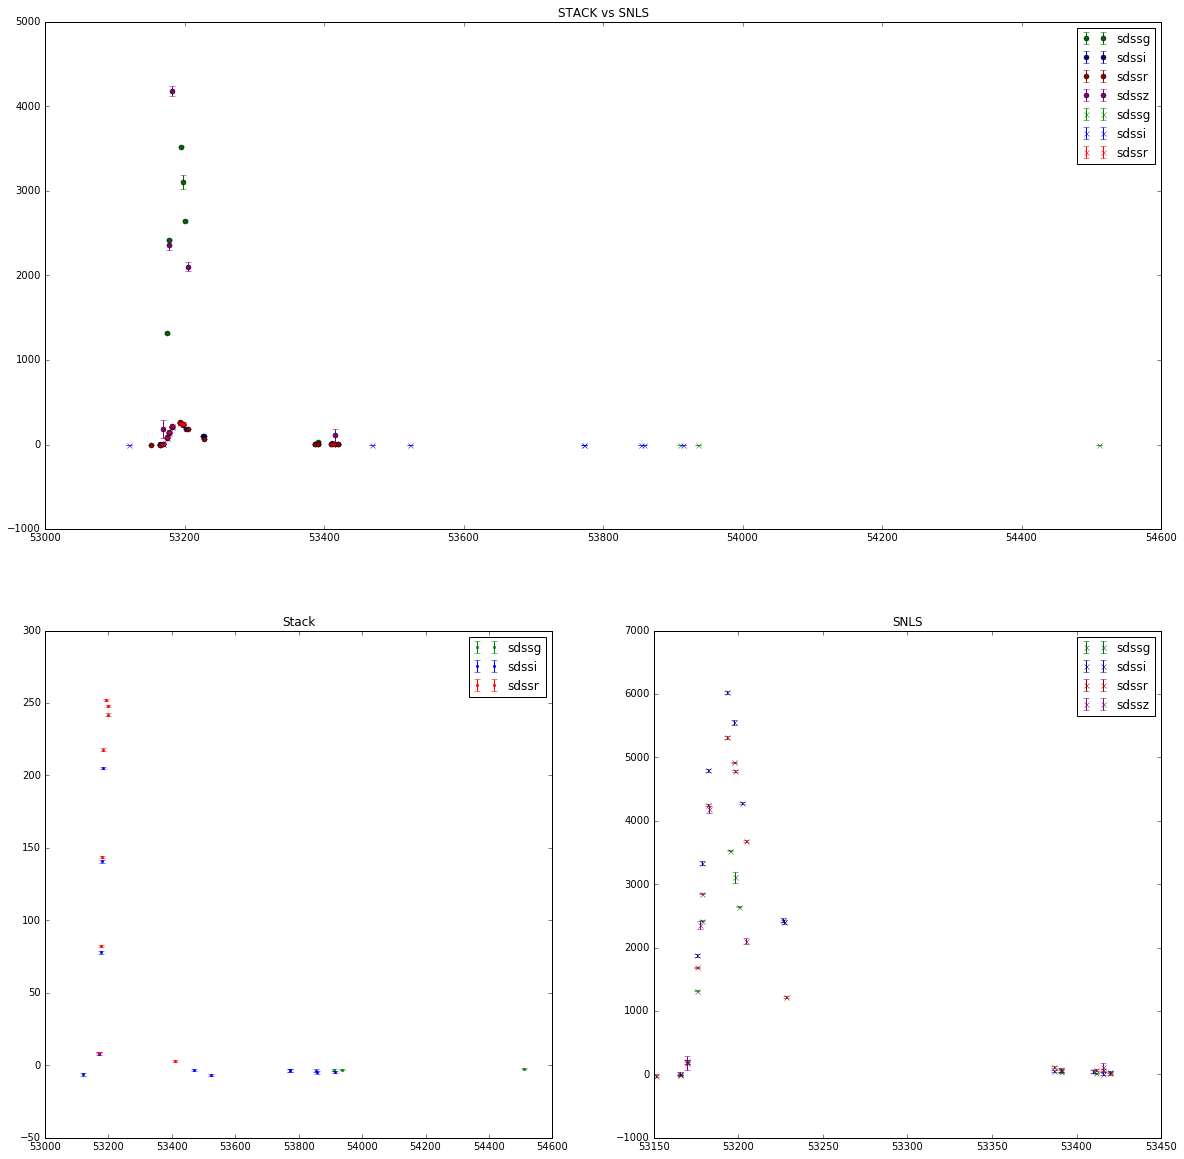

============New LC================
match
05D3dd
{'sdssi': 0.034272520631707291, 'sdssr': 0.061153327277123901, 'sdssz': -0.12614651873826099, 'sdssg': nan}
82


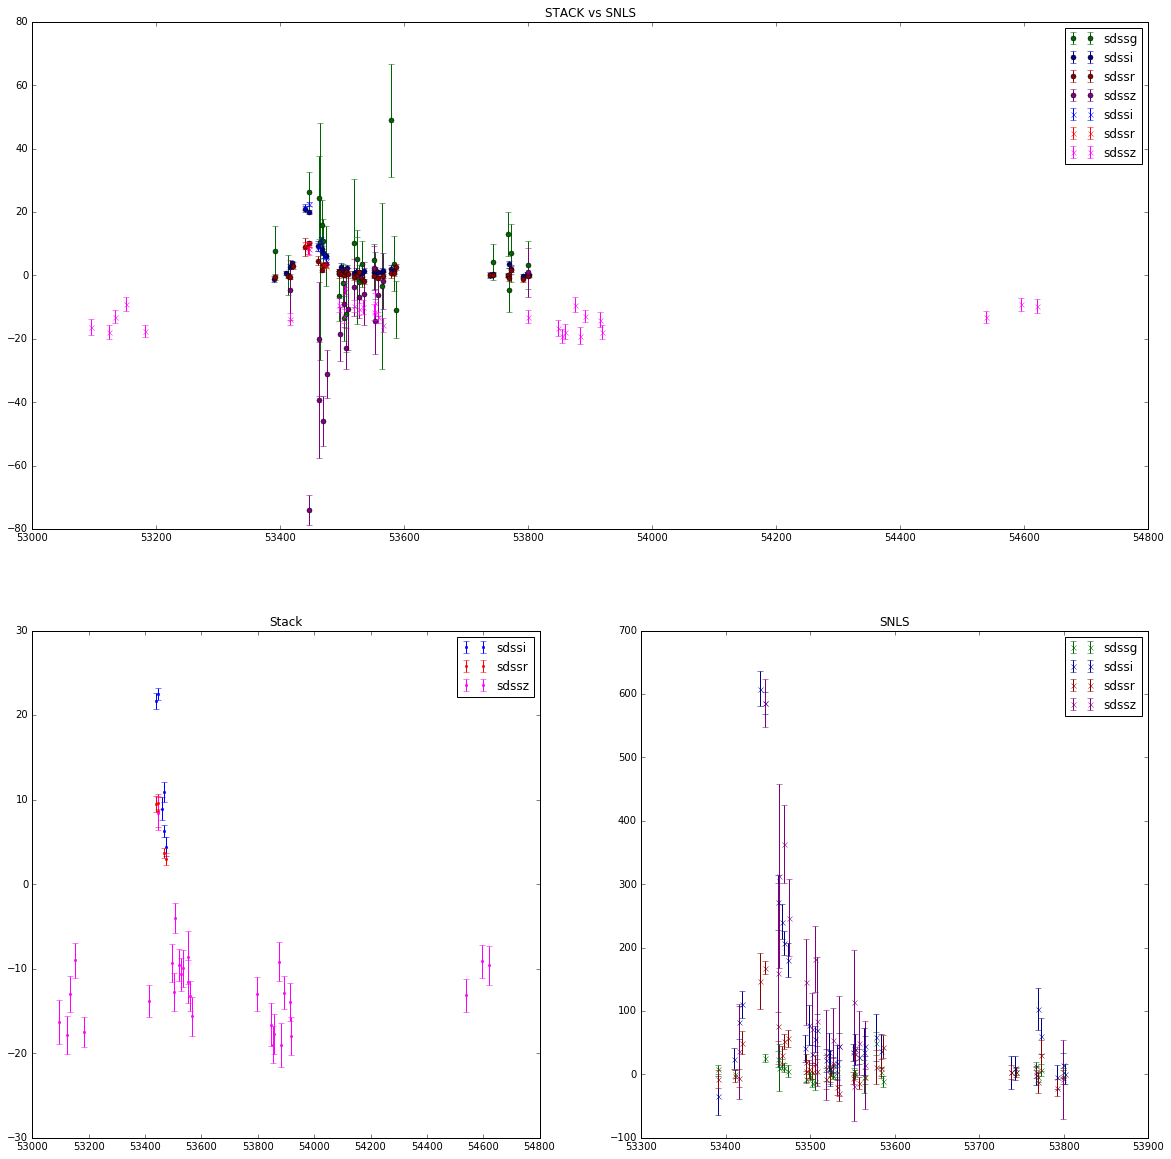

============New LC================
match
05D3ne
{'sdssi': 0.037882499934324618, 'sdssr': 0.051715214590723507, 'sdssz': nan, 'sdssg': 0.056750069490467868}
83


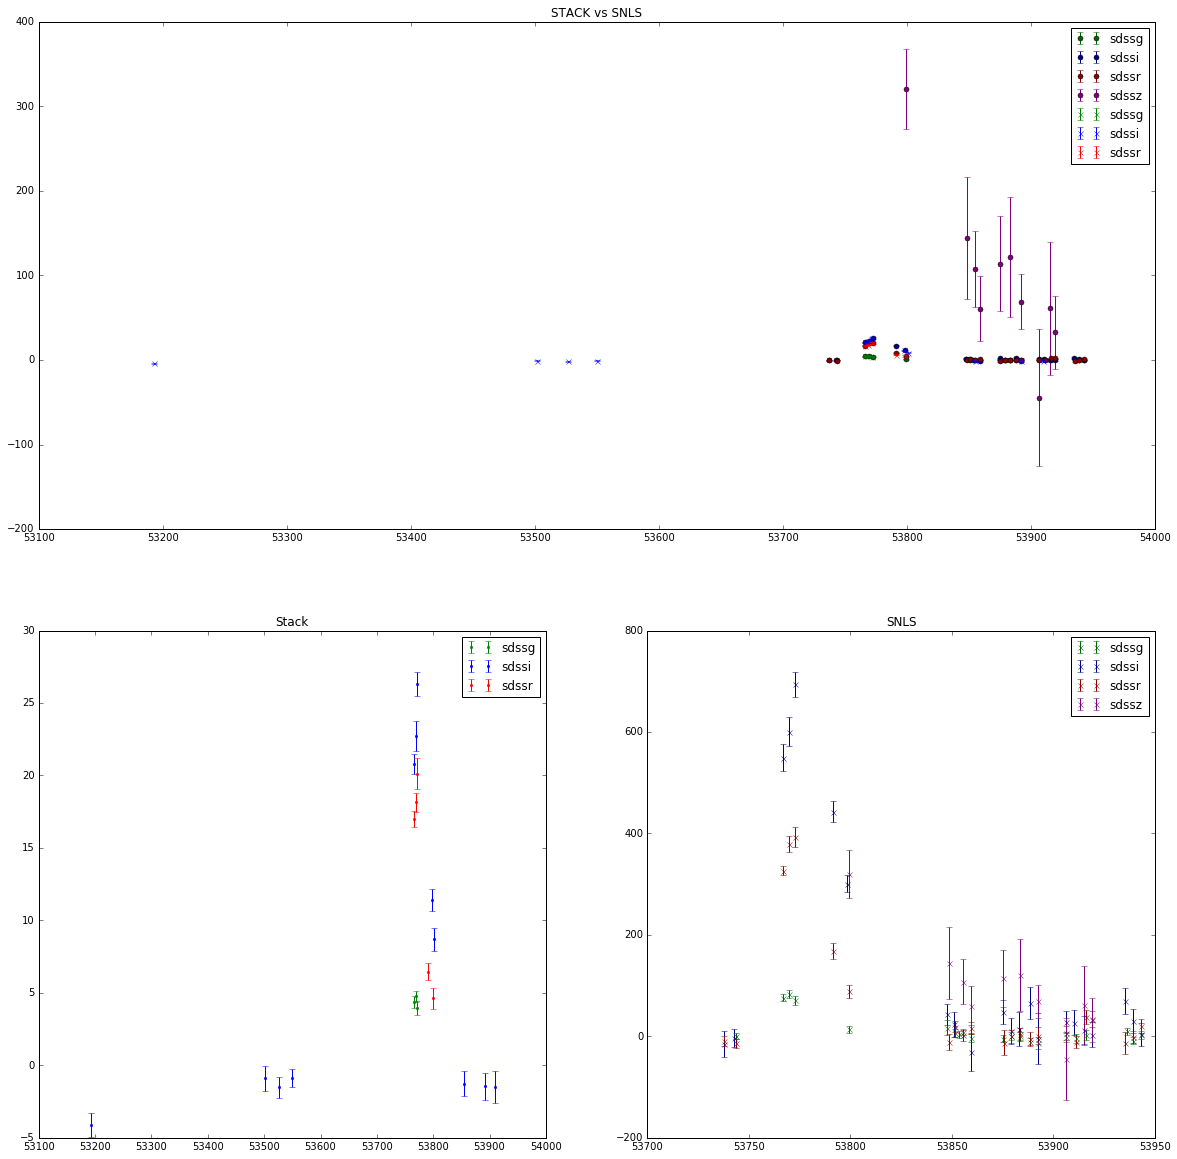

============New LC================
83


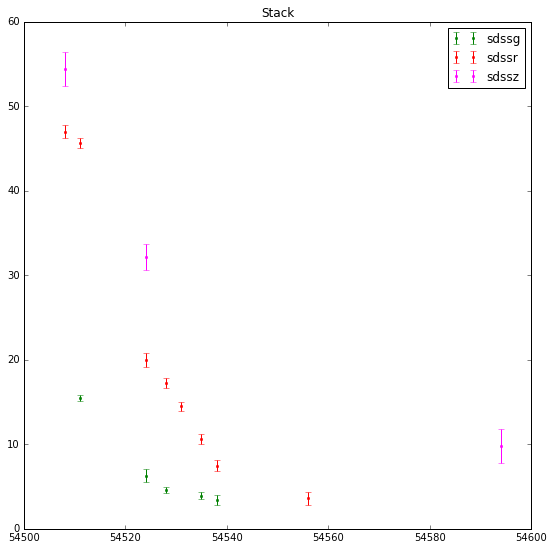

In [98]:
counter = 0
matched = []
for lc in lcs:

#if True:
    print "============New LC================"
    plt.figure(figsize=(20,20))
    plt.subplot2grid((2, 2), (1, 0))
    plt.title("Stack")
    show_multi_filter_light_curve(lc, base_colors)
    
    #plt.show()
    for i, s_lc in enumerate(snls_array):

        s1 = {'ra':np.mean(lc["ra"]),'dec':np.mean(lc["dec"])}
        s2 = {'ra':np.mean(s_lc["ra"]),'dec':np.mean(s_lc["dec"])}
        
        if DSTools.source_distance(s1,s2)<1:
            print "match"
            
            print elems[i][0]
            matched.append(elems[i][0])
            
            n_factors = {}
            n_factors["sdssi"]=normalize_light_curve( lc,s_lc, "sdssi")
            n_factors["sdssg"]=normalize_light_curve( lc,s_lc, "sdssg")
            n_factors["sdssr"]=normalize_light_curve( lc,s_lc, "sdssr")
            n_factors["sdssz"]=normalize_light_curve( lc,s_lc, "sdssz")
            
            print n_factors
            plt.subplot2grid((2, 2), (0, 0), colspan=2)
            plt.title("STACK vs SNLS")
            show_multi_filter_light_curve(s_lc, snls_colors, n_factors, conv="o")
            show_multi_filter_light_curve(lc, base_colors, conv="x")
            
            plt.subplot2grid((2, 2), (1, 1))
            plt.title("SNLS")
            show_multi_filter_light_curve(s_lc, snls_colors,  conv="x")
    print len(matched)
    plt.show()
    counter+=1


            